# Final Project

# [1] Data Understanding

## 1. Dataset Description
Spotify 1 (df1) captures long-term trends with 26,266 entries and 19 columns, featuring historical songs released at least two months before March 2020.  Spotify 2 (df2) focuses on recent popular songs, with 952 entries and 17 columns, providing data updated through 2023 to assess the relevance of historical trends in the current market.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv("/content/drive/MyDrive/DSO 528_Blended Data Business Analytics for Efficient Decisions/DSO 528_Final Project/DSO528_project_spotify_1.csv")
df2=pd.read_csv("/content/drive/MyDrive/DSO 528_Blended Data Business Analytics for Efficient Decisions/DSO 528_Final Project/DSO528_project_spotify_2.csv")

In [ ]:
df1.head()

track_id    track_name    track_artist  popular release_year  \
0  697MjF1454XKvZmTuqkWmD    I Miss You          Jeriqo        0         2019   
1  3x2bXiU0o4WbsPkawXlfDA   Who Are You         The Who        0         1978   
2  0jEaPBjFAWjQTMVouRwaHi         Happy  The Beef Seeds        0         2015   
3  5EKUb1FKsyYVaSXb41YBIj           ONE      Rev Theory        0         2020   
4  300DUx4tdtCdGEUXR032jA  Palace/Curse    The Internet        0         2015   

  release_month playlist_genre  danceability  energy  key  loudness  mode  \
0             2            edm         0.520   0.789    0    -7.717     1   
1             8           rock         0.651   0.661    9   -11.405     1   
2             1            r&b         0.640   0.758   10    -5.204     1   
3             1           rock         0.398   0.966    4    -2.352     0   
4             6            r&b         0.447   0.625   10    -8.212     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0432      0.004910          0.000013    0.0816    0.415  174.026   
1       0.0511      0.265000          0.003130    0.1060    0.489  156.371   
2       0.1600      0.665000          0.000000    0.1270    0.932   86.529   
3       0.0453      0.000006          0.000000    0.3030    0.520   90.016   
4       0.3230      0.035100          0.000727    0.2430    0.261   67.104   

   duration_ms  
0       216347  
1       378707  
2       218044  
3       208196  
4       440013

In [ ]:
df2.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day    streams  tempo key   mode  \
0           2023               7            14  141381703    125   B  Major   
1           2023               3            23  133716286     92  C#  Major   
2           2023               6            30  140003974    138   F  Major   
3           2019               8            23  800840817    170   A  Major   
4           2023               5            18  303236322    144   A  Minor   

   danceability  valence  energy  acousticness  instrumentalness  liveness  \
0          0.80     0.89    0.83          0.31              0.00      0.08   
1          0.71     0.61    0.74          0.07              0.00      0.10   
2          0.51     0.32    0.53          0.17              0.00      0.31   
3          0.55     0.58    0.72          0.11              0.00      0.11   
4          0.65     0.23    0.80          0.14              0.63      0.11   

   speechiness  
0         0.04  
1         0.04  
2         0.06  
3         0.15  
4         0.06

## 2. Dataset Quality Check

### 1.1) Df1: Info, Null values, Numerical and Categorical Descriptive Statistics

- The dataset contains a combination of numerical and categorical variables.

- For null values, 3 rows with missing data in either the track name or artist name were dropped, as these represent critical information required for analysis and cannot be reliably used. For #VALUE! in release year and month will be dealt with in the later statistical analysis, either dropping or manually imputed.

- For descriptive statistics, separate criteria were established for numerical and categorical fields:

  - Numerical Fields: Field Name, Field Type, # Records with Values, % Populated, # Zeros, Min, Max, Mean, Standard Deviation, Most Common.
  - Categorical Fields: Field Name, Field Type, # Records with Values, % Populated, # Zeros, # Unique Values, Most Common.

In [ ]:
# Quality check for df1: info
def data_info(df, name):
    print(f"--- {name}: Columns and Data Types ---")
    print(f"Shape: {df.shape}")
    print(df.info())
    print("\n")

data_info(df1, "DF1 (Historical Data)")

--- DF1 (Historical Data): Columns and Data Types ---
Shape: (26266, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26266 entries, 0 to 26265
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          26266 non-null  object 
 1   track_name        26263 non-null  object 
 2   track_artist      26263 non-null  object 
 3   popular           26266 non-null  int64  
 4   release_year      26266 non-null  object 
 5   release_month     26266 non-null  object 
 6   playlist_genre    26266 non-null  object 
 7   danceability      26266 non-null  float64
 8   energy            26266 non-null  float64
 9   key               26266 non-null  int64  
 10  loudness          26266 non-null  float64
 11  mode              26266 non-null  int64  
 12  speechiness       26266 non-null  float64
 13  acousticness      26266 non-null  float64
 14  instrumentalness  26266 non-null  float64
 15  liveness      

In [ ]:
# Quality check for df1: null values and '#VALUE!' entries

def data_null_values(df, name):
    print(f"--- {name}: Null Values and '#VALUE!' Entries ---")

    # Check for null values
    null_values = df.isnull().sum()

    # Check for '#VALUE!' entries
    value_error_values = (df == '#VALUE!').sum()

    # Combine results and display
    print("Null Values:")
    print(null_values)
    print("\n")

    print("Rows with '#VALUE!' entries:")
    print(value_error_values)
    print("\n")

# Call the function to check both null and '#VALUE!' entries
data_null_values(df1, "DF1 (Historical Data)")

--- DF1 (Historical Data): Null Values and '#VALUE!' Entries ---
Null Values:
track_id            0
track_name          3
track_artist        3
popular             0
release_year        0
release_month       0
playlist_genre      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64


Rows with '#VALUE!' entries:
track_id             0
track_name           0
track_artist         0
popular              0
release_year        24
release_month       24
playlist_genre       0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64




In [ ]:
# Quality check for df1: descriptive statistics for numerical variables

# Adjust numerical variables to match those available in df1
numerical_variables_df1 = [
    'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Generate descriptive statistics for numerical variables
def numerical_summary(df, numerical_columns):
    summary = pd.DataFrame({
        'Field Name': numerical_columns,
        'Field Type': ['Numeric'] * len(numerical_columns),
        '# Records Have Values': df[numerical_columns].notnull().sum().values,
        '% Populated': (df[numerical_columns].notnull().mean() * 100).round(1).astype(str) + '%',
        '# Zeros': [sum(df[col] == 0) for col in numerical_columns],
        'Min': df[numerical_columns].min().values,
        'Max': df[numerical_columns].max().values,
        'Mean': df[numerical_columns].mean().values,
        'Standard Deviation': df[numerical_columns].std().values,
        'Most Common': [df[col].mode()[0] if not df[col].mode().empty else 'N/A' for col in numerical_columns]
    })
    return summary

# Create the summary for numerical fields in df1
numerical_summary_df1 = numerical_summary(df1, numerical_variables_df1)

# Display the summary
print(numerical_summary_df1)

                        Field Name Field Type  # Records Have Values  \
danceability          danceability    Numeric                  26266   
energy                      energy    Numeric                  26266   
loudness                  loudness    Numeric                  26266   
mode                          mode    Numeric                  26266   
speechiness            speechiness    Numeric                  26266   
acousticness          acousticness    Numeric                  26266   
instrumentalness  instrumentalness    Numeric                  26266   
liveness                  liveness    Numeric                  26266   
valence                    valence    Numeric                  26266   
tempo                        tempo    Numeric                  26266   
duration_ms            duration_ms    Numeric                  26266   

                 % Populated  # Zeros         Min         Max           Mean  \
danceability          100.0%        1     0.00000      

In [ ]:
# Quality check for df1: descriptive statistics for categorical variables

# Adjust categorical variables to include only those present in df1
categorical_variables_df1 = [
    'track_id', 'track_name', 'track_artist', 'release_year',
    'release_month', 'playlist_genre', 'popular']

# Generate descriptive statistics for categorical variables with adjusted # Zeros calculation
def categorical_summary_with_zeros(df, categorical_columns):
    summary = pd.DataFrame({
        'Field Name': categorical_columns,
        'Field Type': ['Categorical'] * len(categorical_columns),
        '# Records Have Values': df[categorical_columns].notnull().sum().values,
        '% Populated': (df[categorical_columns].notnull().mean() * 100).round(1).astype(str) + '%',
        '# Zeros': [sum((df[col] == 0) | (df[col].isnull())) for col in categorical_columns],
        '# Unique Values': df[categorical_columns].nunique().values,
        'Most Common': [df[col].mode()[0] if not df[col].mode().empty else 'N/A' for col in categorical_columns]
    })
    return summary

# Create the summary for categorical fields in df1
categorical_summary_df1 = categorical_summary_with_zeros(df1, categorical_variables_df1)

# Display the summary
print(categorical_summary_df1)

                    Field Name   Field Type  # Records Have Values  \
track_id              track_id  Categorical                  26266   
track_name          track_name  Categorical                  26263   
track_artist      track_artist  Categorical                  26263   
release_year      release_year  Categorical                  26266   
release_month    release_month  Categorical                  26266   
playlist_genre  playlist_genre  Categorical                  26266   
popular                popular  Categorical                  26266   

               % Populated  # Zeros  # Unique Values             Most Common  
track_id            100.0%        0            23184  7BKLCZ1jbUBVqRi2FVlTVw  
track_name          100.0%        3            19547                  Poison  
track_artist        100.0%        3             9405           Martin Garrix  
release_year        100.0%        0               63                    2019  
release_month       100.0%        0         

### 1.2) Df1: outliers in numerical variables

In df1, which represents historical data, outliers can provide insights into unique trends and groundbreaking tracks that deviated from the norm but still contributed to shaping the music landscape. For instance, songs with extreme values in tempo, danceability, or energy might highlight how exceptional compositions performed historically. Additionally, outliers in features like acousticness or loudness could reveal key factors that influenced a song's popularity.

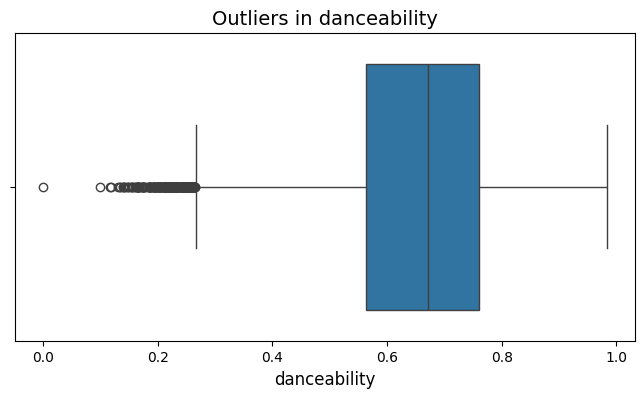

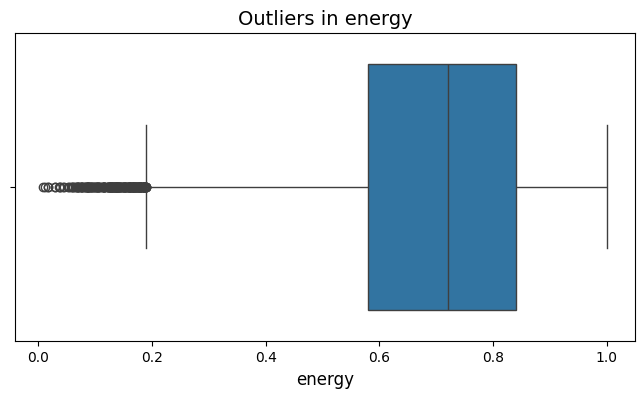

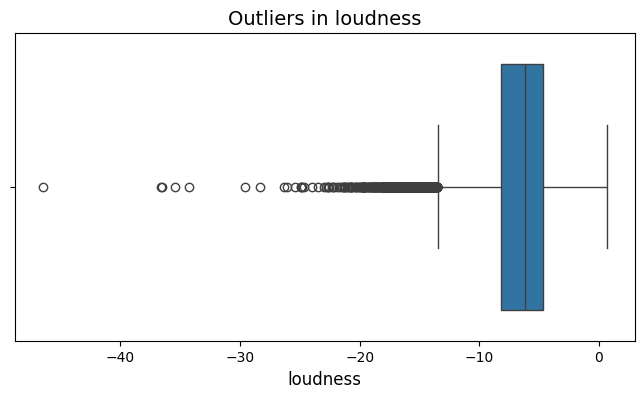

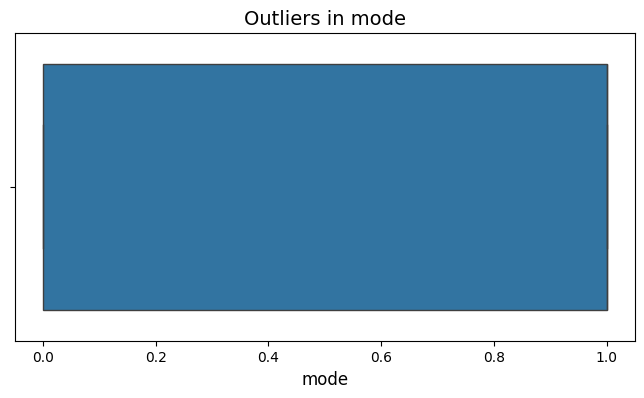

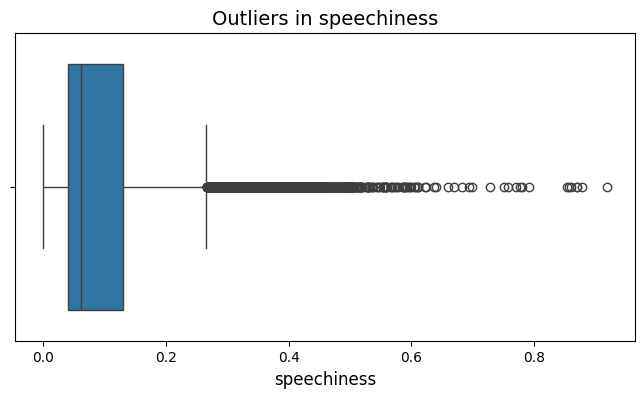

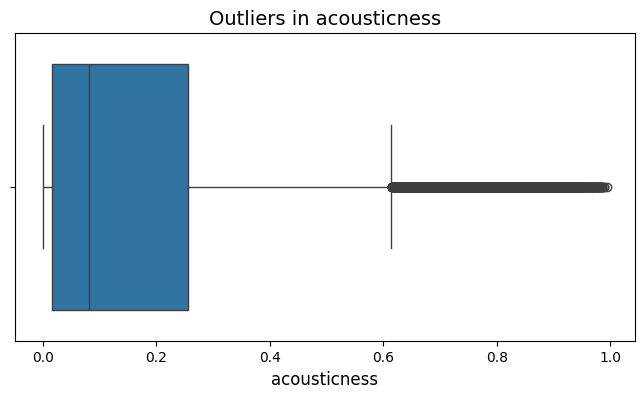

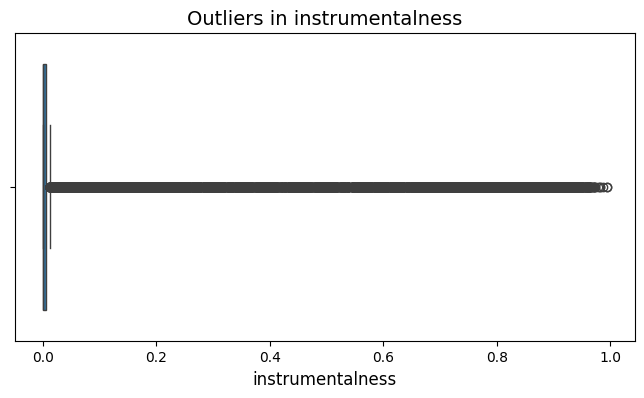

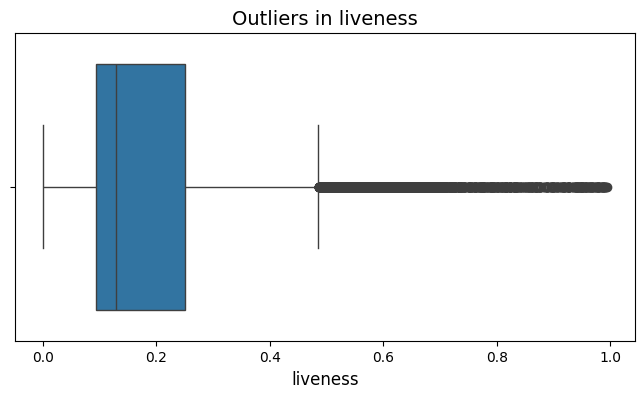

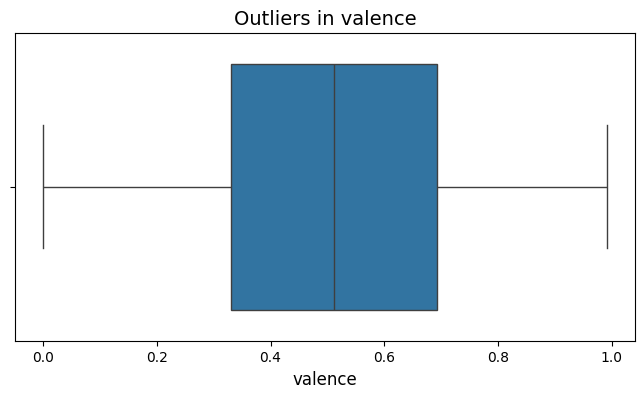

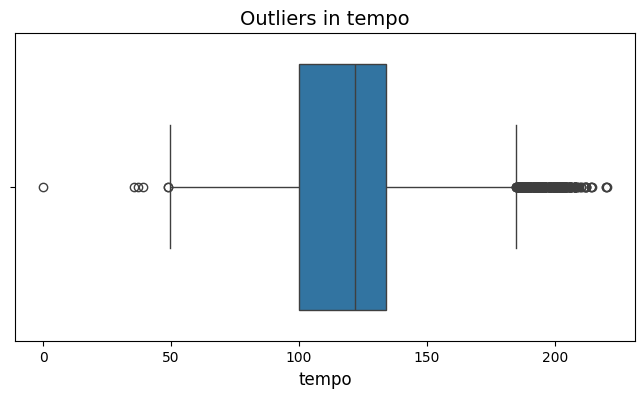

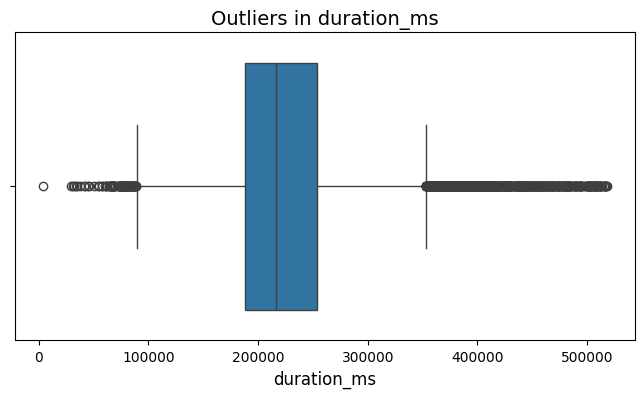

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables in df1
numerical_variables_df1 = [
    'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]

# Function to visualize outliers using boxplots
def visualize_outliers(df, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Outliers in {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.show()

# Visualize outliers for numerical variables in df1
visualize_outliers(df1, numerical_variables_df1)

### 2.1) Df2: Info, Null values, Numerical and Categorical Descriptive Statistics

- The dataset contains a mix of numerical and categorical variables.

- For the 93 missing values in the key column, we decided to conduct qualitative research and manually fill them in to ensure data completeness and accuracy.

- For descriptive statistics, separate criteria were established for numerical and categorical fields:

  - Numerical Fields: Field Name, Field Type, # Records with Values, % Populated, # Zeros, Min, Max, Mean, Standard Deviation, Most Common.
  - Categorical Fields: Field Name, Field Type, # Records with Values, % Populated, # Zeros, # Unique Values, Most Common.

In [ ]:
# Quality check for df1: null values and '#VALUE!' entries

def data_null_values(df, name):
    print(f"--- {name}: Null Values and '#VALUE!' Entries ---")

    # Check for null values
    null_values = df.isnull().sum()

    # Check for '#VALUE!' entries
    value_error_values = (df == '#VALUE!').sum()

    # Combine results and display
    print("Null Values:")
    print(null_values)
    print("\n")

    print("Rows with '#VALUE!' entries:")
    print(value_error_values)
    print("\n")

# Call the function to check both null and '#VALUE!' entries
data_null_values(df2, "DF2 (Historical Data)")

--- DF2 (Historical Data): Null Values and '#VALUE!' Entries ---
Null Values:
track_name           0
artist(s)_name       0
artist_count         0
released_year        0
released_month       0
released_day         0
streams              0
tempo                0
key                 95
mode                 0
danceability         0
valence              0
energy               0
acousticness         0
instrumentalness     0
liveness             0
speechiness          0
dtype: int64


Rows with '#VALUE!' entries:
track_name          0
artist(s)_name      0
artist_count        0
released_year       0
released_month      0
released_day        0
streams             0
tempo               0
key                 0
mode                0
danceability        0
valence             0
energy              0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
dtype: int64




In [ ]:
# Quality check for df2: descriptive statistics for numerical variables

# Adjust numerical variables to match those available in df2
numerical_variables_df2 = [
    'streams', 'artist_count', 'danceability', 'energy', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo']

# Convert numerical columns to numeric, coercing errors into NaN
for col in numerical_variables_df2:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Generate descriptive statistics for numerical variables
def numerical_summary(df, numerical_columns):
    summary = pd.DataFrame({
        'Field Name': numerical_columns,
        'Field Type': ['Numeric'] * len(numerical_columns),
        '# Records Have Values': df[numerical_columns].notnull().sum().values,
        '% Populated': (df[numerical_columns].notnull().mean() * 100).round(1).astype(str) + '%',
        '# Zeros': [sum(df[col] == 0) for col in numerical_columns],
        'Min': df[numerical_columns].min().values,
        'Max': df[numerical_columns].max().values,
        'Mean': df[numerical_columns].mean().values,
        'Standard Deviation': df[numerical_columns].std().values,
        'Most Common': [df[col].mode()[0] if not df[col].mode().empty else 'N/A' for col in numerical_columns]
    })
    return summary

# Create the summary for numerical fields in df1
numerical_summary_df2 = numerical_summary(df2, numerical_variables_df2)

# Display the summary
print(numerical_summary_df2)

                        Field Name Field Type  # Records Have Values  \
streams                    streams    Numeric                    952   
artist_count          artist_count    Numeric                    953   
danceability          danceability    Numeric                    953   
energy                      energy    Numeric                    953   
speechiness            speechiness    Numeric                    953   
acousticness          acousticness    Numeric                    953   
instrumentalness  instrumentalness    Numeric                    953   
liveness                  liveness    Numeric                    953   
valence                    valence    Numeric                    953   
tempo                        tempo    Numeric                    953   

                 % Populated  # Zeros      Min           Max          Mean  \
streams                99.9%        0  2762.00  3.703895e+09  5.141374e+08   
artist_count          100.0%        0     1.00  8.0

In [ ]:
# Quality check for df2: descriptive statistics for categorical variables

# Adjust categorical variables to include only those present in df2
categorical_variables_df2 = [
    'track_name', 'artist(s)_name', 'key', 'mode', 'released_year',
    'released_month', 'released_day']

# Generate descriptive statistics for categorical variables with adjusted # Zeros calculation
def categorical_summary_with_zeros(df, categorical_columns):
    summary = pd.DataFrame({
        'Field Name': categorical_columns,
        'Field Type': ['Categorical'] * len(categorical_columns),
        '# Records Have Values': df[categorical_columns].notnull().sum().values,
        '% Populated': (df[categorical_columns].notnull().mean() * 100).round(1).astype(str) + '%',
        '# Zeros': [sum((df[col] == 0) | (df[col].isnull())) for col in categorical_columns],
        '# Unique Values': df[categorical_columns].nunique().values,
        'Most Common': [df[col].mode()[0] if not df[col].mode().empty else 'N/A' for col in categorical_columns]
    })
    return summary

# Create the summary for categorical fields in df1
categorical_summary_df2 = categorical_summary_with_zeros(df2, categorical_variables_df2)

# Display the summary
print(categorical_summary_df2)

                    Field Name   Field Type  # Records Have Values  \
track_name          track_name  Categorical                    953   
artist(s)_name  artist(s)_name  Categorical                    953   
key                        key  Categorical                    858   
mode                      mode  Categorical                    953   
released_year    released_year  Categorical                    953   
released_month  released_month  Categorical                    953   
released_day      released_day  Categorical                    953   

               % Populated  # Zeros  # Unique Values      Most Common  
track_name          100.0%        0              943  About Damn Time  
artist(s)_name      100.0%        0              645     Taylor Swift  
key                  90.0%       95               11               C#  
mode                100.0%        0                2            Major  
released_year       100.0%        0               50             2022  
release

### 2.2) Df2: outlieres for numerical variables

In df2, which focuses on recent data, outliers are particularly valuable for capturing emerging trends and rapid shifts in the music industry. For example, extreme values in streams or artist_count might represent viral hits or exponential growth in popularity. Outliers can also shed light on variability in popularity patterns, such as tracks that gained traction quickly versus those that succeeded over time.

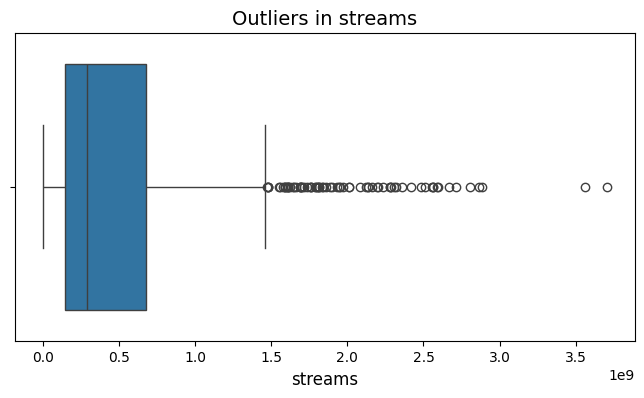

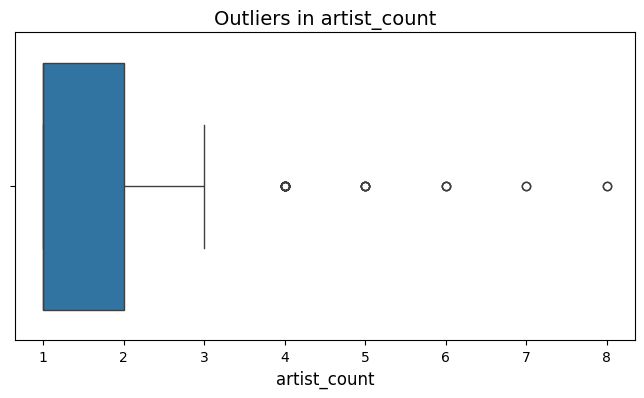

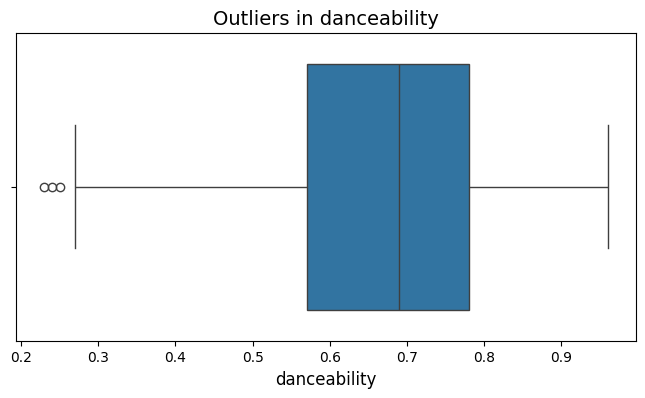

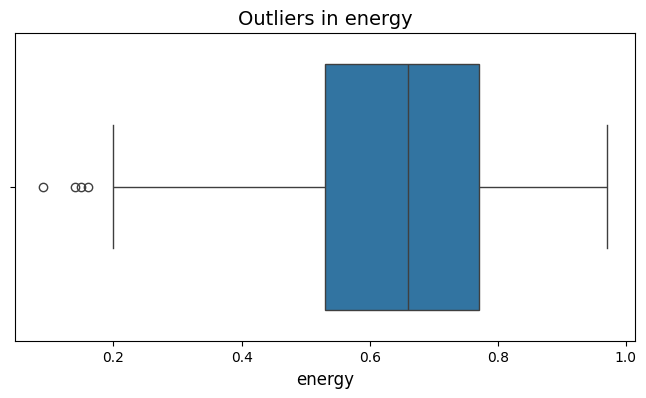

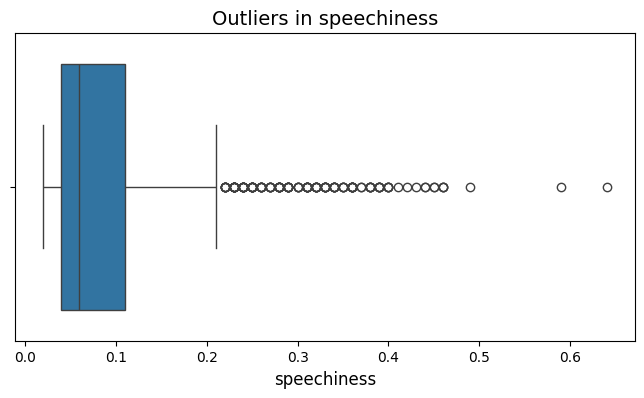

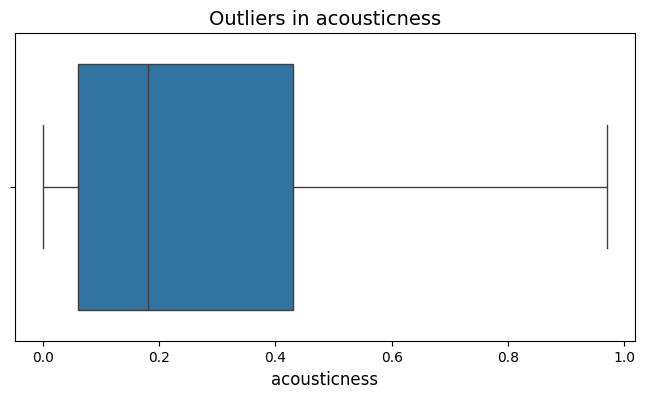

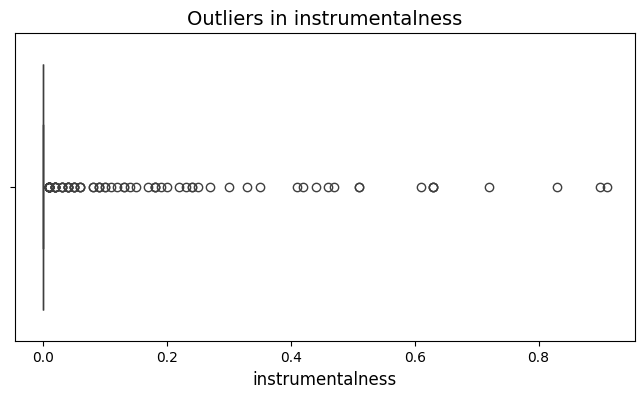

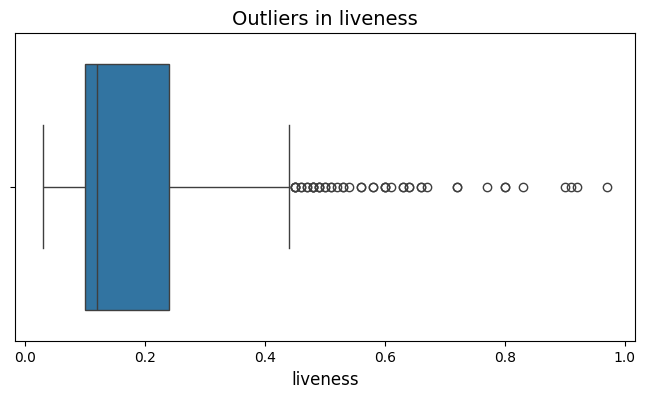

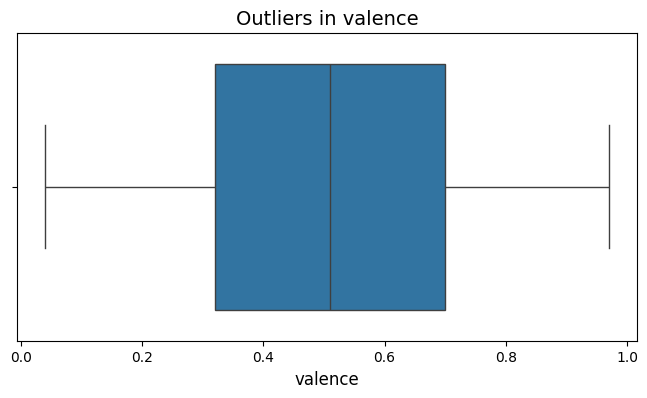

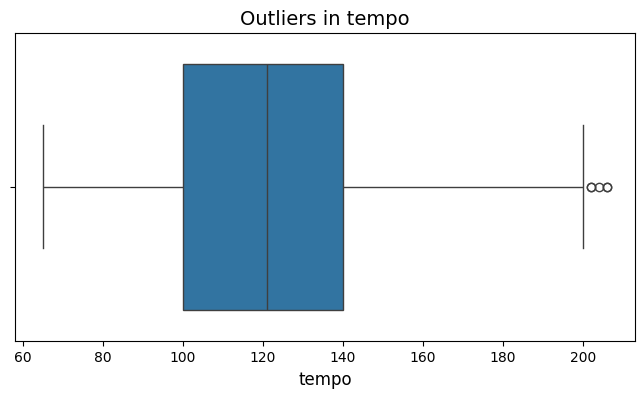

In [ ]:
# Ensure all numerical variables are properly converted to numeric
for col in numerical_variables_df2:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Function to visualize outliers using boxplots
def visualize_outliers_fixed(df, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Outliers in {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.show()

# Visualize outliers for numerical variables in df2
visualize_outliers_fixed(df2, numerical_variables_df2)

# [2] Data Preparation

## 1. Manual Correction of 'release_year' column (Df1)
During the data exploration process, some incorrect values were identified in the release_year column. Specifically, the minimum release year in df1 was found to be 1905. Upon further inspection, it was revealed that 9 tracks by the modern pop artist Maroon 5 were incorrectly labeled as being released in 1905. These errors were manually corrected to reflect their actual release years based on the Spotify platform data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv("/content/drive/MyDrive/DSO 528_Blended Data Business Analytics for Efficient Decisions/DSO 528_Final Project/DSO528_project_spotify_1.csv")
df2=pd.read_csv("//content/drive/MyDrive/DSO 528_Blended Data Business Analytics for Efficient Decisions/DSO 528_Final Project/DSO528_project_spotify_2.csv")

In [ ]:
# Count the number of tracks by 'Maroon 5' released in 1905
maroon5_1905_count = df1[(df1['track_artist'] == 'Maroon 5') & (df1['release_year'] == 1905)].shape[0]

# Filter rows where 'track_artist' is 'Maroon 5' and 'release_year' is 1905
maroon5_1905 = df1[(df1['track_artist'] == 'Maroon 5') & (df1['release_year'] == 1905)][['track_name', 'release_year']]

# Display the count
print(f"Number of tracks by Maroon 5 in 1905: {maroon5_1905_count}")

# Display the result
print(maroon5_1905)

Number of tracks by Maroon 5 in 1905: 9
                                              track_name release_year
58                                  This Love - Acoustic         1905
1563                           Sunday Morning - Acoustic         1905
2071   Moves Like Jagger - Studio Recording From The ...         1905
6588   Moves Like Jagger - Studio Recording From The ...         1905
7698                       She Will Be Loved - Radio Mix         1905
18212  Moves Like Jagger - Studio Recording From The ...         1905
22337                          Misery - Acoustic Version         1905
25151                                          This Love         1905
26076                       She Will Be Loved - Acoustic         1905


In [ ]:
# Correct the release_year values for Maroon 5 tracks listed with release_year as 1905
corrected_years = [2004, 2004, 2010, 2010, 2002, 2010, 2010, 2002, 2004]

# Find the indices of the tracks to update
indices_to_update = df1[(df1['track_artist'] == 'Maroon 5') & (df1['release_year'] == 1905)].index

# Update the 'release_year' column with the corrected years
df1.loc[indices_to_update, 'release_year'] = corrected_years

# Verify the updates
updated_maroon5_tracks = df1.loc[indices_to_update, ['track_name', 'release_year']]

# Display the updated tracks
print(updated_maroon5_tracks)

                                              track_name release_year
58                                  This Love - Acoustic         2004
1563                           Sunday Morning - Acoustic         2004
2071   Moves Like Jagger - Studio Recording From The ...         2010
6588   Moves Like Jagger - Studio Recording From The ...         2010
7698                       She Will Be Loved - Radio Mix         2002
18212  Moves Like Jagger - Studio Recording From The ...         2010
22337                          Misery - Acoustic Version         2010
25151                                          This Love         2002
26076                       She Will Be Loved - Acoustic         2004


## 2. Manual Filling for 'release year and month' column (Df1)

In [ ]:
# Identify rows where 'release_month' and 'release_year' have the invalid '#VALUE!' strings
invalid_values = df1[(df1['release_month'] == '#VALUE!') & (df1['release_year'] == '#VALUE!')]

# Count how many such rows there are
invalid_count = len(invalid_values)
print(f"Number of '#VALUE!' entries with invalid 'release_year': {invalid_count}")

# Display all columns for these rows
print(invalid_values)

Number of '#VALUE!' entries with invalid 'release_year': 24
                     track_id                                     track_name  \
2978   61Q9oJNd9hJQFhSDh6Qlap                        House Of The Rising Sun   
3430   6igsoAR6Co9u7Rq3U7mlOD                             Hollywood Swinging   
7423   3yrSvpt2l1xhsV9Em88Pul                                Brown Eyed Girl   
8502   4RGxUjaCmVtD30pIhtEi7w                              Sunshine Superman   
9688   3Sm5TYFgMXyXwgAcY2xweX                                    So Into You   
10627  3JXOMZdeJ7uMR7UfC3BN5T                         Top Of The Bill - Live   
11517  1JO1xLtVc8mWhIoE3YaCL0                                 Happy Together   
12377  683b4ikwa62JevCjwrmfg6                      Moondance - 2013 Remaster   
13024  6ZMda6mscE8eRkuwlw8yFB                                      Bedsitter   
13557  2Q7LpkYrS0PBpoq3iCqypa                                   Ramblin' Man   
13590  1JkZg3eMQTmTn93E8Yd3UL                          I Wan

In [ ]:
# Manually input corrected values for release_year and release_month
corrected_years = [1964, 1974, 1967, 1966, 1977, 1978, 1967, 2013, 1981, 1973, 1977, 1956, 2008, 1965, 2013, 2014, 1967, 1967, 1978, 1971, 1977, 1973, 1964, 1977]
corrected_months = [7, 6, 6, 7, 1, 4, 1, 10, 11, 8, 9, 3, 1, 5, 10, 7, 6, 6, 2, 4, 9, 11, 6, 1]

# Find indices of rows where release_year and release_month are '#VALUE!'
invalid_indices = df1[(df1['release_month'] == '#VALUE!') & (df1['release_year'] == '#VALUE!')].index

# Update the release_year and release_month columns with the corrected values
df1.loc[invalid_indices, 'release_year'] = corrected_years
df1.loc[invalid_indices, 'release_month'] = corrected_months

# Verify the updates by displaying the updated rows
updated_invalid_rows = df1.loc[invalid_indices, ['release_year', 'release_month']]

# Display the updated rows
print(updated_invalid_rows)

      release_year release_month
2978          1964             7
3430          1974             6
7423          1967             6
8502          1966             7
9688          1977             1
10627         1978             4
11517         1967             1
12377         2013            10
13024         1981            11
13557         1973             8
13590         1977             9
13851         1956             3
15191         2008             1
16714         1965             5
17051         2013            10
18400         2014             7
19197         1967             6
19249         1967             6
21943         1978             2
22038         1971             4
23900         1977             9
25342         1973            11
25523         1964             6
25907         1977             1


## 3. Manual Filling for 'key' column (Df2)

In the dataset quality check, 95 missing values were identified in the key column of the Spotify 2 dataset. Using the Spotify API, 88 of these missing values were successfully filled. For the remaining 7 missing values, they were manually filled using the website 'songbpm.com.' The updated Spotify 2 dataset has now been reloaded into the notebook and will be used from this section onward.

In [ ]:
# Load the updated Spotify 2 dataset with missing values in 'key' column already filled
df2 = pd.read_csv("/content/drive/MyDrive/DSO 528_Blended Data Business Analytics for Efficient Decisions/DSO 528_Final Project/DSO528_project_spotify_2_keys (updated).csv")

# Verify that the file is loaded correctly
def data_null_values(df, name):
    print(f"--- {name}: Null Values ---")
    print(df.isnull().sum())
    print("\n")

data_null_values(df2, "DF2 (Historical Data)")

--- DF2 (Historical Data): Null Values ---
track_name          0
artist(s)_name      0
artist_count        0
released_year       0
released_month      0
released_day        0
streams             0
tempo               0
key                 0
mode                0
danceability        0
valence             0
energy              0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
dtype: int64




## 4. Categorical -> Numerical Conversion (Df2)
The key and mode columns in df1 and df2 represent the same data but differ in value types:

- In df1, they are numerical (key: 0-11, mode: 1 for major, 0 for minor).
- In df2, they are categorical (key: 'B', 'C#', etc., mode: 'major', 'minor').

To ensure consistency:

- In df2, key: Converted using a mapping based on the chromatic scale (C=0, C#=1, ..., B=11).
- In df2, mode: Mapped 'major' → 1, 'minor' → 0.

In [ ]:
# Check unique values in the 'key' column of df1
unique_keys_df1 = df1['key'].unique()

# Display the unique values
print("Unique values in 'key' column of df1:")
print(unique_keys_df1)

Unique values in 'key' column of df1:
[ 0  9 10  4  1  6  7  2  3  5  8 11]


In [ ]:
# Check unique values in the 'key' column of df1
unique_keys_df2 = df2['key'].unique()

# Display the unique values
print("Unique values in 'key' column of df2:")
print(unique_keys_df2)

Unique values in 'key' column of df2:
['B' 'C#' 'F' 'A' 'D' 'F#' 'C' 'G#' 'G' 'E' 'A#' 'D#']


In [ ]:
# Create a mapping of musical keys to numerical values
key_mapping = {
    'C': 0, 'C#': 1, 'Db': 1,
    'D': 2, 'D#': 3, 'Eb': 3,
    'E': 4,
    'F': 5, 'F#': 6, 'Gb': 6,
    'G': 7, 'G#': 8, 'Ab': 8,
    'A': 9, 'A#': 10, 'Bb': 10,
    'B': 11
}

# Normalize the 'key' column in df2 to ensure consistency
df2['key'] = df2['key'].str.strip().str.upper()  # Remove spaces and make uppercase

# Map the keys to their numerical equivalents
df2['key'] = df2['key'].map(key_mapping)

# Verify the transformation
print("Transformed 'key' Column in df2:")
print(df2['key'])

Transformed 'key' Column in df2:
0      11
1       1
2       5
3       9
4       9
       ..
948     9
949     6
950     1
951     1
952     4
Name: key, Length: 953, dtype: int64


In [ ]:
# Convert 'mode' column in df2 to numerical values: major = 1, minor = 0
mode_mapping = {'Major': 1, 'Minor': 0}

df2['mode'] = df2['mode'].map(mode_mapping)

print("\nTransformed 'mode' Column in df2:")
print(df2['mode'])


Transformed 'mode' Column in df2:
0      1
1      1
2      1
3      1
4      0
      ..
948    1
949    1
950    1
951    1
952    0
Name: mode, Length: 953, dtype: int64


# [3] EDA Guidelines

## 1. Dataset Choice

For EDA, df1 is the primary dataset as its popular variable captures recent trends, aligning with Universal Music’s goal of optimizing promotion strategies based on current success. While df2 provides cumulative insights through streams, it lacks recency, making it less relevant for immediate decisions.

df2 will instead be used for validation, comparing its streams and artist_count to the drivers identified in df1. Merging is avoided to prevent inconsistencies due to differing focuses: recent plays (df1) vs. cumulative success (df2).

## 2. Timeframe for Market Trends Analysis
For the market trends analysis, it is important to limit the timeframe of the dataset for certain variables. Currently, the df1 dataset spans from 1905 to 2020. Considering the rapidly evolving nature of the music industry, especially in recent years due to global influences (e.g., artists outside the US gaining prominence), focusing on a relevant and modern timeframe is essential.

Although trends today may shift within as little as a year, the dataset provides insights only up to 2020. To effectively analyze overarching trends while balancing recency and historical patterns, the time period was limited to tracks released between 2000 and 2020.

It is important to note that many variables in the dataset show a sudden drop in the 1960s. There were significant events such as the Civil Rights Movement, the Vietnam War and antiwar protests, countercultural movements like the rise of hippie culture and the "generation gap," and political assassinations, including those of John F. Kennedy, Robert Kennedy, and Martin Luther King Jr. All these unique socio-cultural dynamics profoundly impacted society and, consequently, the music entertainment sector.

# [3.1] EDA: Market Trends Analysis

## 1. What overarching trends are shaping the music industry?

- **Release year**: From 1900 to 2000, the number of music releases remained steady. However, focusing on the period between 2000 and 2020, there is a noticeable upward trend in releases starting in 2014, culminating in a dramatic peak in 2019. Several factors contribute to this phenomenon.

  - Growth of Streaming Platforms: The expansion of streaming platforms played a pivotal role. According to MIDiA Research, 2019 was marked by growth and consolidation in the streaming industry, with Spotify retaining a significant market share despite competitors like Apple, Amazon, Tencent, and Google gaining ground. Counterpoint Research further highlights that global online music streaming subscriptions increased by 32% in 2019, reaching 358 million subscribers. This rise in streaming incentivized artists and labels to release more music to meet growing consumer demand.
  - Growth of User-Generated Content Platforms: The surge in popularity of platforms like TikTok and YouTube significantly impacted music releases. Artists increasingly tailored tracks for viral challenges and short-form content, resulting in a higher volume of releases to cater to these trends.

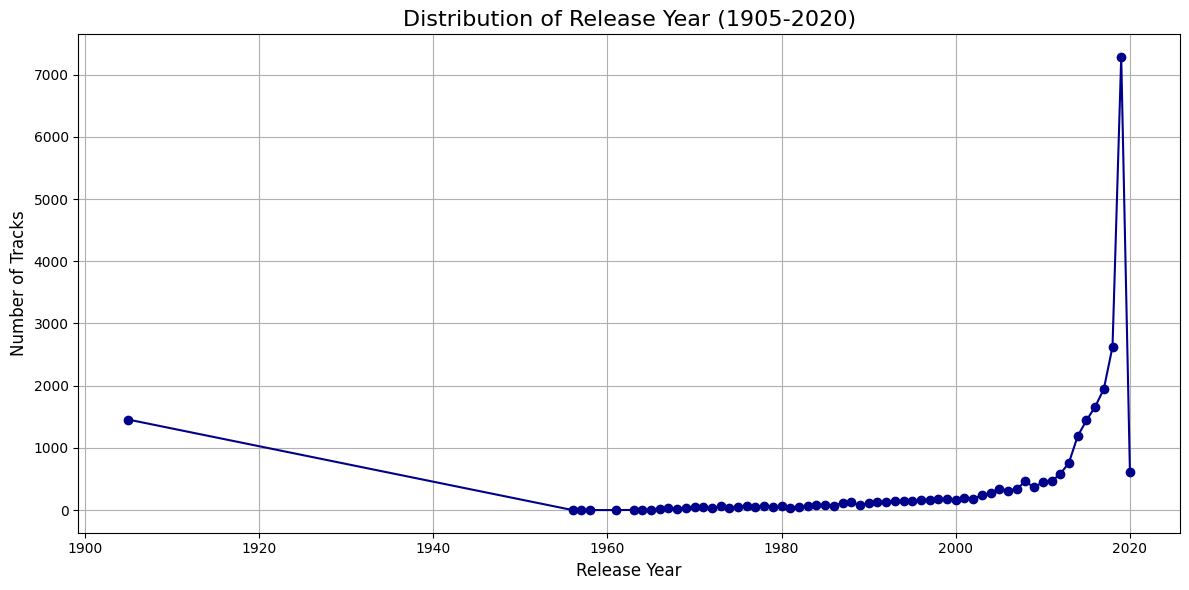

In [ ]:
# Release year trend (1905-2020)

# Ensure 'release_year' is numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Line graph for distribution of release year
plt.figure(figsize=(12, 6))
sorted_years = df1['release_year'].value_counts().sort_index()  # Sort by release year
plt.plot(sorted_years.index, sorted_years.values, marker='o', linestyle='-', color='darkblue')

plt.title('Distribution of Release Year (1905-2020)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

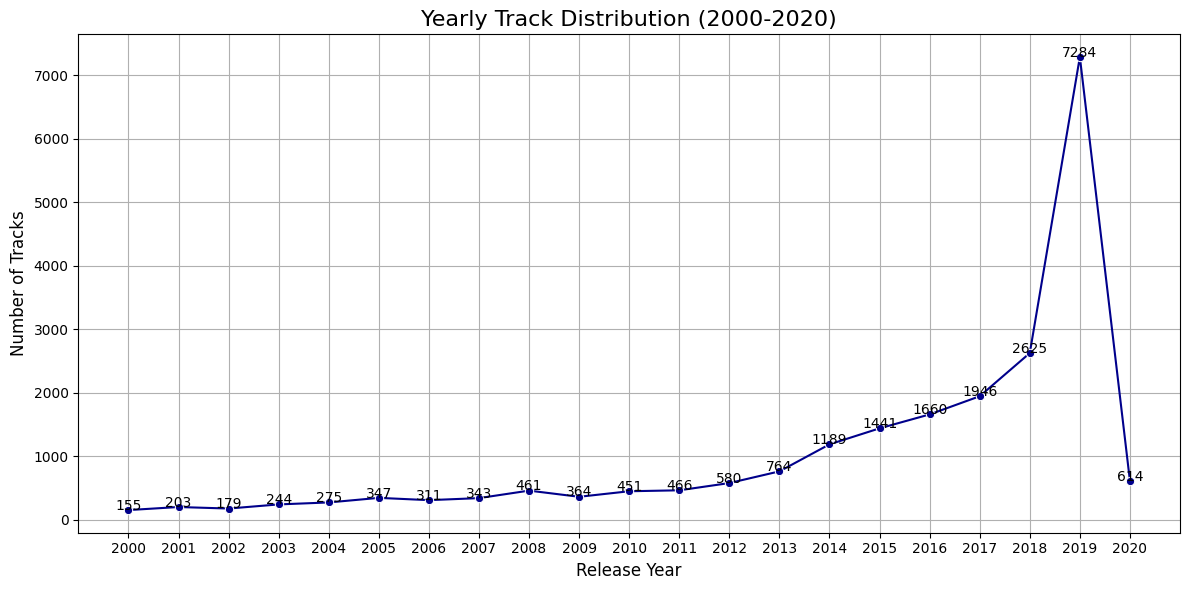

In [ ]:
# Release year trend (2000-2020)

# Filter the data for years between 2000 and 2020
df1_filtered = df1[(df1['release_year'] >= 2000) & (df1['release_year'] <= 2020)]

# Count the number of tracks for each year
yearly_track_counts = df1_filtered['release_year'].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_track_counts.index, y=yearly_track_counts.values, marker='o', color='darkblue')

# Annotate each point with its value
for year, count in zip(yearly_track_counts.index, yearly_track_counts.values):
    plt.text(year, count + 5, str(count), ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Yearly Track Distribution (2000-2020)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

# Set the x-axis ticks to be integers
plt.xticks(ticks=range(2000, 2021, 1), labels=range(2000, 2021, 1), fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

- **Release month**: Top 3 Months for releases are January, June, and November.

  - January
    - Industry Characteristics: Labels often launch promotional campaigns for singles or albums with long-term potential. Early releases can also qualify for year-long award eligibility, ensuring ample time to build momentum.
    - Budget Allocations: New fiscal year budgets encourage labels to fund new projects and marketing initiatives.
    - Strategic Marketing Purpose: December is crowded with holiday content, so January offers a less competitive window for visibility.
    
  - June
    - Seasonal Appeal: Summer months see increased activity in outdoor events, festivals, and vacations, creating a high demand for new music that fits the season's upbeat mood.
    - Engagement Opportunities: Audiences are more active during this period, making it an ideal time to maximize reach and engagement.

  - November
    - Holiday Influence: November sets the stage for holiday-themed releases, playlists, and campaigns, making it a prime time for artists and labels to capitalize on seasonal demand.
    - Gift-Giving Season: Physical and digital music purchases often spike as people shop for gifts.

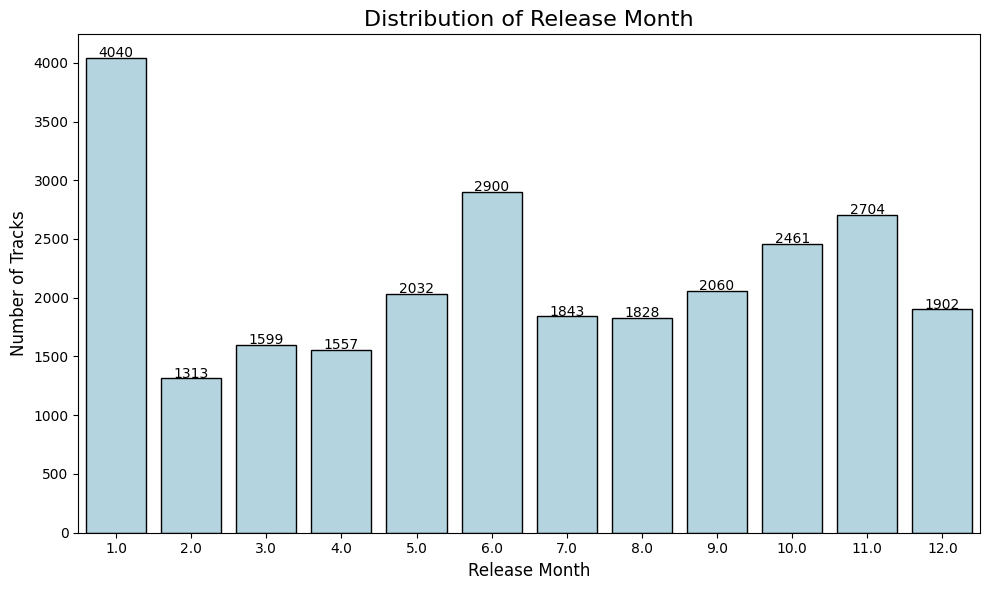

In [ ]:
# Release month

# Ensure 'release_month' is numeric
df1['release_month'] = pd.to_numeric(df1['release_month'], errors='coerce')

# Bar graph for distribution of releasem month
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='release_month', data=df1, color='lightblue', edgecolor='black')

# Add numbers to each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with data
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 5,  # Slightly above the bar
            f'{int(height)}',  # Display the count
            ha='center', fontsize=10, color='black'
        )

plt.title('Distribution of Release Month', fontsize=16)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

- **Playlist Genres**: The dataset shows that the six genres are relatively balanced in their distribution, suggesting a well-rounded dataset that is not dominated by any single genre. Historically, the top three genres—EDM, rap, and pop—have led with only minor differences in their track counts.
  
  However, from 2018 to 2020, there has been a shift in the top genres, with EDM, Latin, and rap taking the lead. This change aligns with the rise of Latin music on the global stage. A pivotal moment was the release of Luis Fonsi's Despacito remix featuring Justin Bieber in 2017, which achieved global success and brought significant attention to Latin music. Since then, more Latin tracks and artists have gained recognition, especially in the US market, highlighting the genre's increasing prominence and influence in shaping modern music trends.



<ipython-input-128-9e7af93724ed>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm", edgecolor='black')


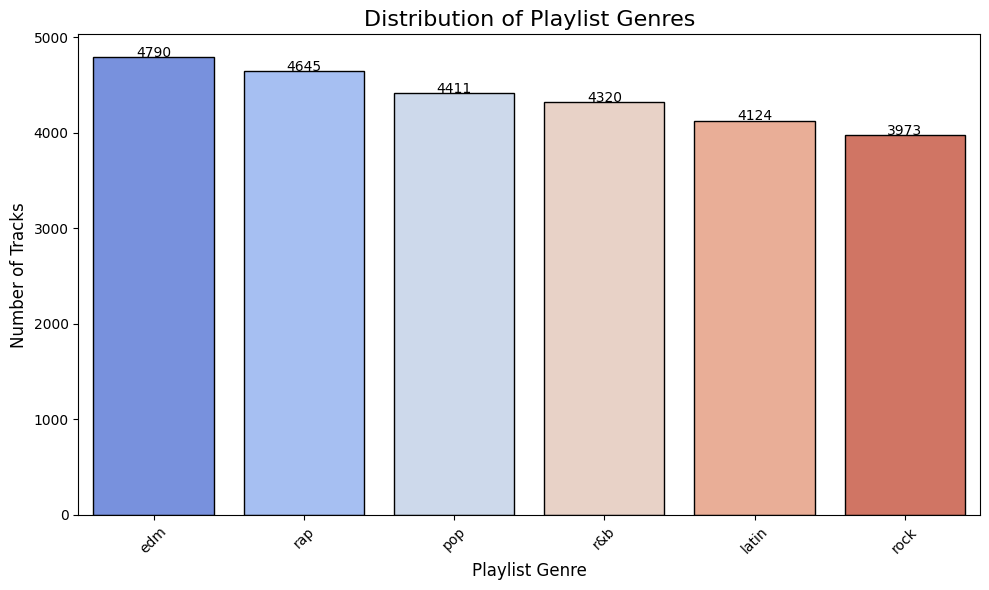

In [ ]:
# Playlist genres distribution

# Count the occurrences of each genre
genre_counts = df1['playlist_genre'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm", edgecolor='black')

# Add numbers to each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with data
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 5,  # Slightly above the bar
            f'{int(height)}',  # Display the count
            ha='center', fontsize=10, color='black'
        )

plt.title("Distribution of Playlist Genres", fontsize=16)
plt.xlabel("Playlist Genre", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

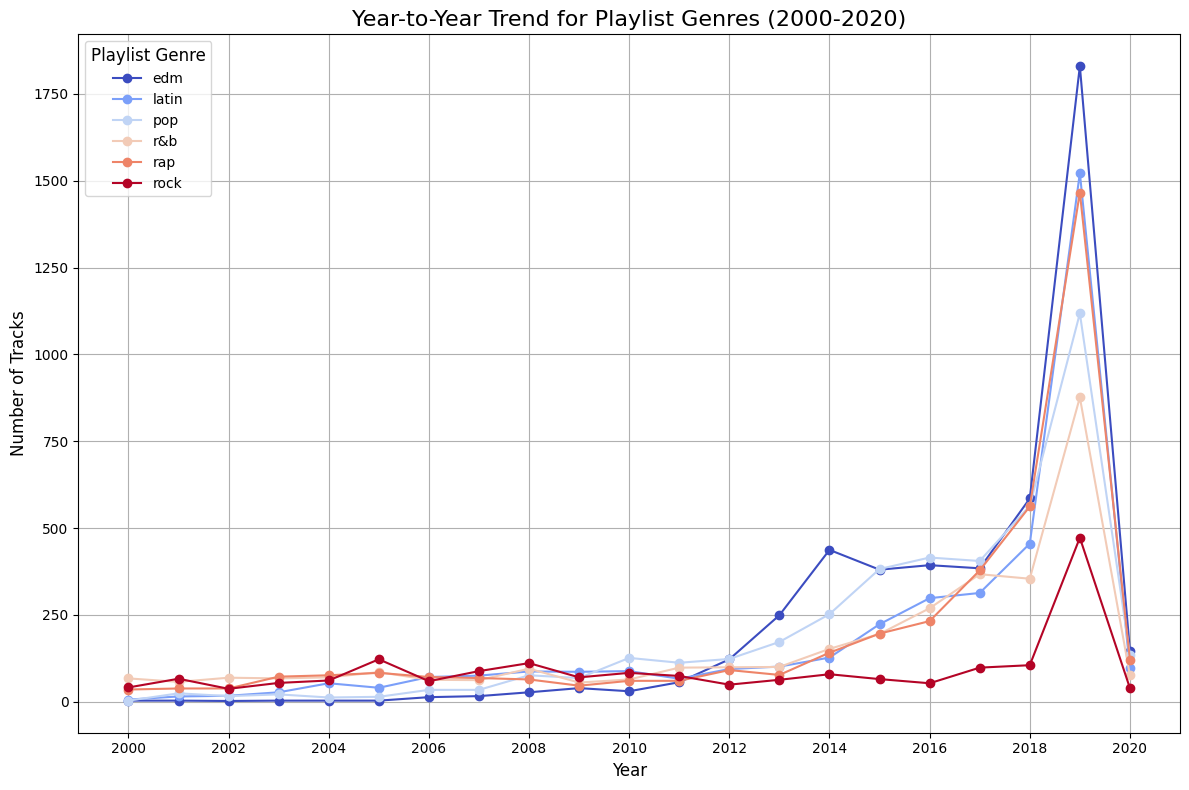

In [ ]:
# Playlist genres trend (2000-2020)

# Ensure release_year is coerced to numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Filter the data for years between 2000 and 2020
df1_filtered = df1[(df1['release_year'] >= 2000) & (df1['release_year'] <= 2020)]

# Group data by 'release_year' and 'playlist_genre' to count occurrences
genre_trend = df1_filtered.groupby(['release_year', 'playlist_genre']).size().unstack(fill_value=0)

# Plot year-to-year trends for each genre
plt.figure(figsize=(12, 8))

# Set a color palette
colors = plt.cm.coolwarm(np.linspace(0, 1, len(genre_trend.columns)))

# Loop through genres and plot with a different color
for i, genre in enumerate(genre_trend.columns):
    plt.plot(genre_trend.index, genre_trend[genre], label=genre, marker='o', color=colors[i])

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Playlist Genres (2000-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.legend(title="Playlist Genre", fontsize=10, title_fontsize=12)

# Ensure x-axis shows only integer years
plt.xticks(ticks=np.arange(2000, 2021, 2), labels=np.arange(2000, 2021, 2), fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

- **Danceability**: The majority of tracks on Spotify exhibit danceability values ranging between 0.6 and 0.8, indicating that most songs on the platform are fairly suitable for dancing.

  The trend reveals fluctuations in danceability over time. In the mid-20th century (1940s–1960s), there is noticeable volatility in danceability, possibly reflecting the emergence of diverse genres and experimentation with new musical styles. Starting in the 1980s, there is a gradual increase in danceability, which could correlate with the rise of disco, pop, and electronic dance music (EDM) during this era. In the 2000s, danceability remained consistently high, with values generally above 0.65, except for a dip between 2005 and 2015. Tracks post-2000 maintain relatively high danceability, indicating a continued focus on creating rhythmically engaging music suitable for dancing. This could be attributed to the increasing popularity of dance-centric genres such as EDM, pop, and hip-hop, as well as the influence of streaming platforms prioritizing upbeat tracks in curated playlists.



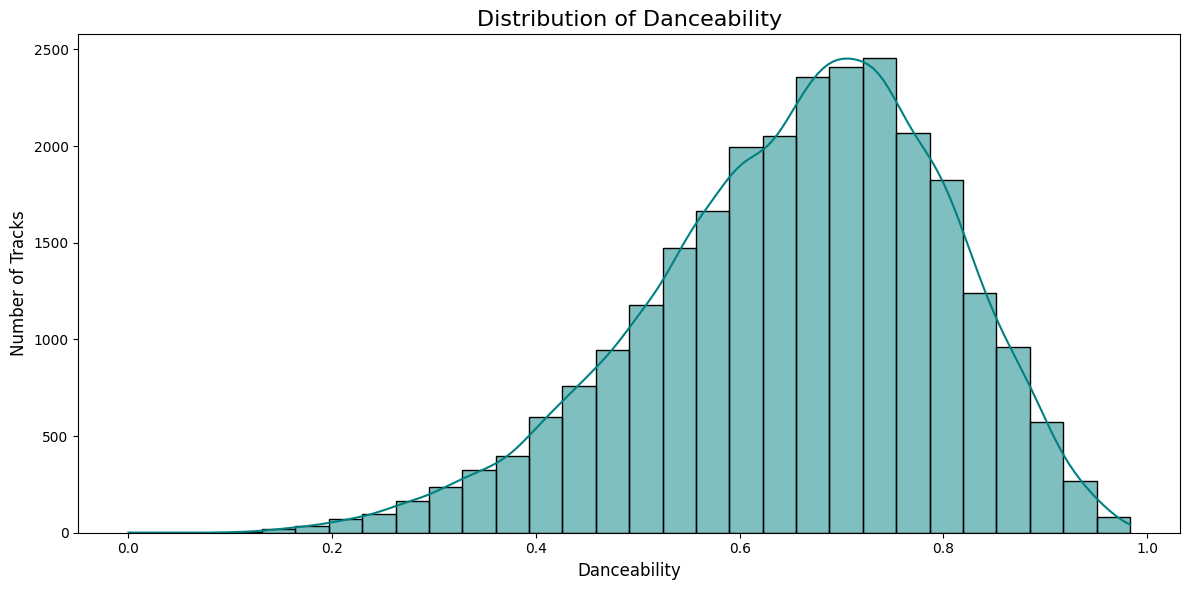

In [ ]:
# Danceability distribution

plt.figure(figsize=(12, 6))
sns.histplot(df1['danceability'], bins=30, kde=True, color='teal', edgecolor='black')
plt.title('Distribution of Danceability', fontsize=16)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

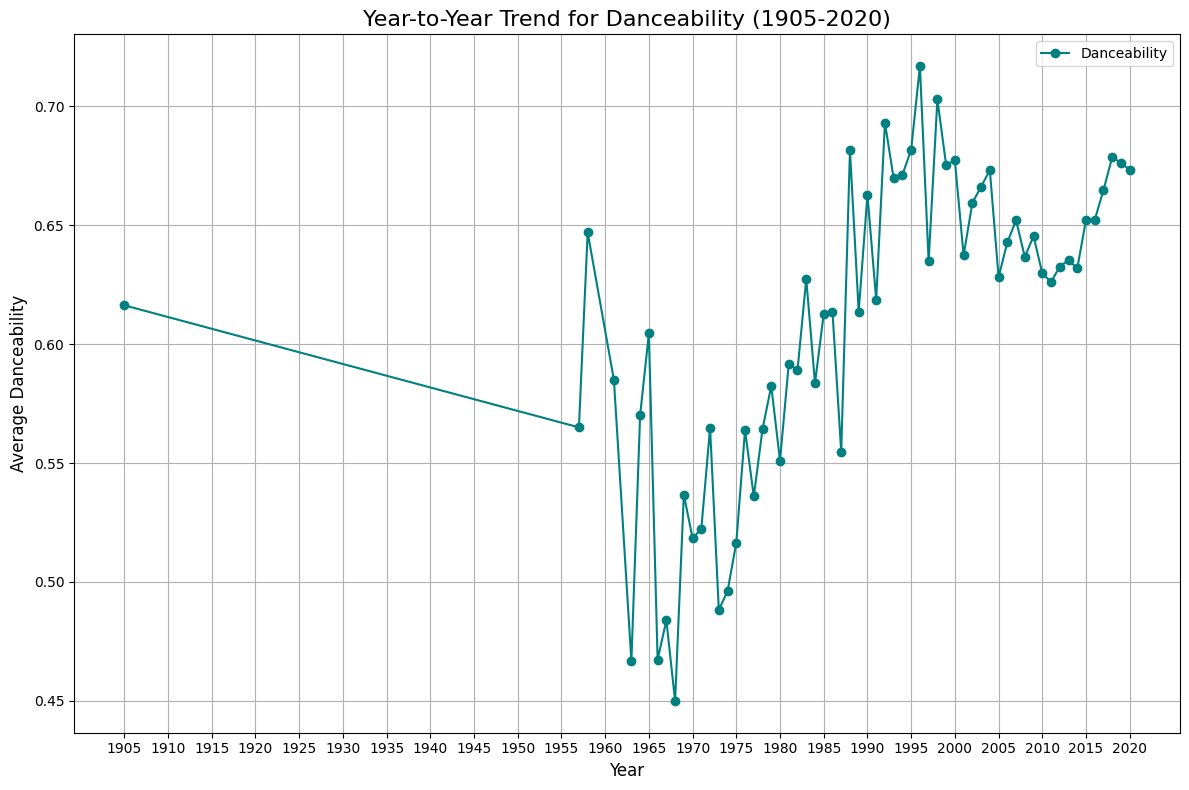

In [ ]:
# Danceability trend (1905-2020)

# Ensure release_year is coerced to numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Group data by 'release_year' and calculate the mean danceability for each year
danceability_trend_full = df1.groupby('release_year')['danceability'].mean()

# Plot year-to-year trend for danceability
plt.figure(figsize=(12, 8))
plt.plot(danceability_trend_full.index, danceability_trend_full.values, marker='o', color='teal', label='Danceability')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Danceability (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Danceability", fontsize=12)

# Adjust x-axis to show only integers
plt.xticks(ticks=range(int(danceability_trend_full.index.min()), int(danceability_trend_full.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


- **Energy**: The distribution is approximately unimodal, with the majority of tracks falling in the range of 0.6 to 0.8. With the peak around 0.7, this suggests that most songs in the dataset have moderate to high energy levels. From 1965 onward, the average energy stabilizes, with values generally falling between 0.6 and 0.8, indicating that modern music often emphasizes energetic elements.

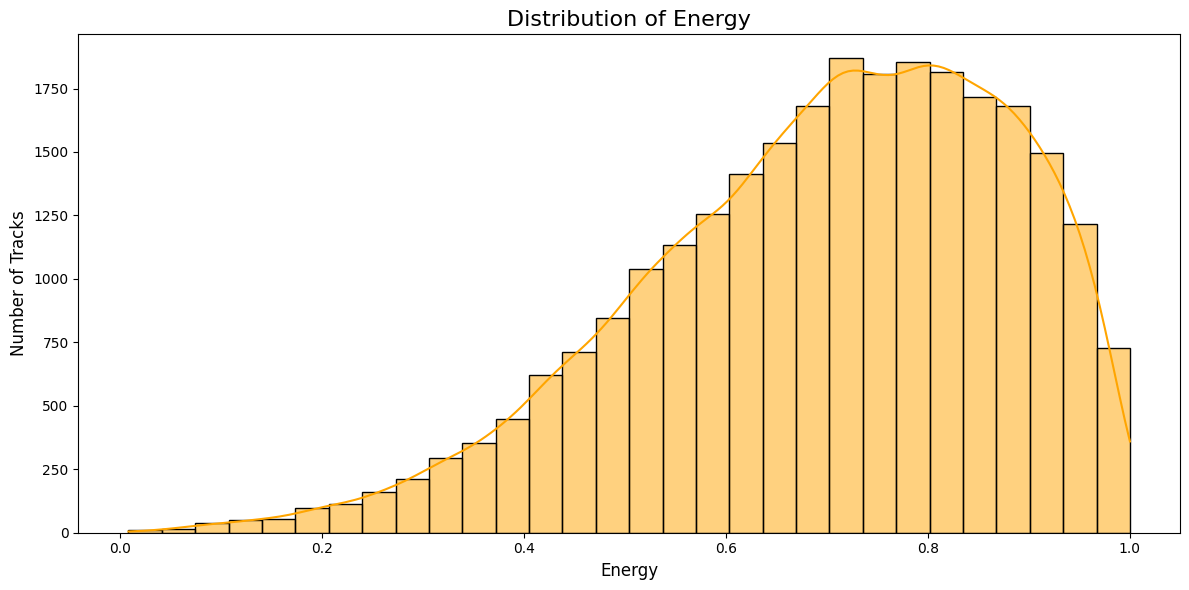

In [ ]:
# Energy distribution

plt.figure(figsize=(12, 6))
sns.histplot(df1['energy'], bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Energy', fontsize=16)
plt.xlabel('Energy', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

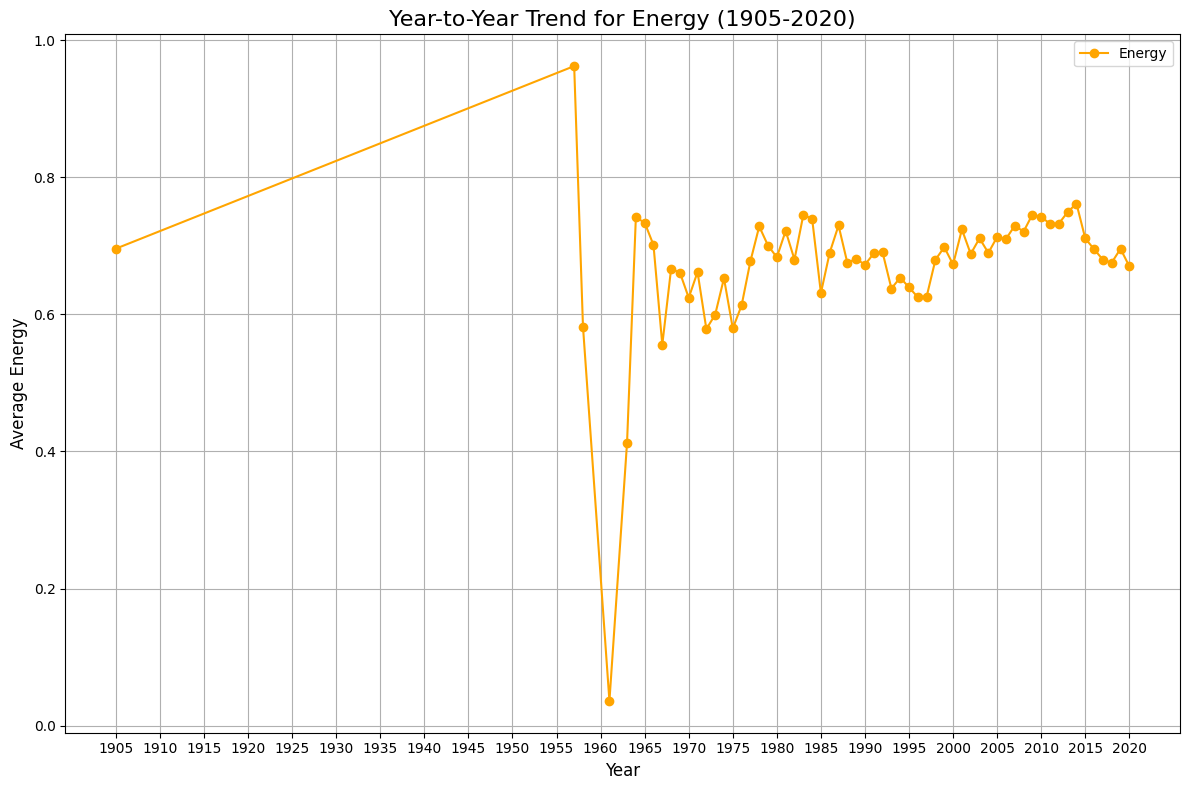

In [ ]:
# Energy trend (1905-2020)

# Group data by 'release_year' and calculate the mean energy for each year
energy_trend_full = df1.groupby('release_year')['energy'].mean()

# Plot year-to-year trend for energy
plt.figure(figsize=(12, 8))
plt.plot(energy_trend_full.index, energy_trend_full.values, marker='o', color='orange', label='Energy')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Energy (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Energy", fontsize=12)

# Adjust x-axis to show only integers with 5-year intervals
plt.xticks(ticks=range(int(energy_trend_full.index.min()), int(energy_trend_full.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Key**: The key distribution in the dataset, dominated by Db / C#, C, and G, complements the observed trends in playlist genres, danceability, and energy. Db Major adds depth and sophistication, aligning with expressive and introspective tracks, while C Major's clarity and versatility suit mainstream genres like pop and EDM. G Major's uplifting and resonant qualities reflect the high energy (0.6–0.8) and danceability (0.6–0.8) trends in the dataset, supporting the vibrant nature of genres like EDM, Latin, and rap.

<ipython-input-229-14256b7c5342>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=key_labels, y=key_counts.values, palette='dark:red', edgecolor='black')


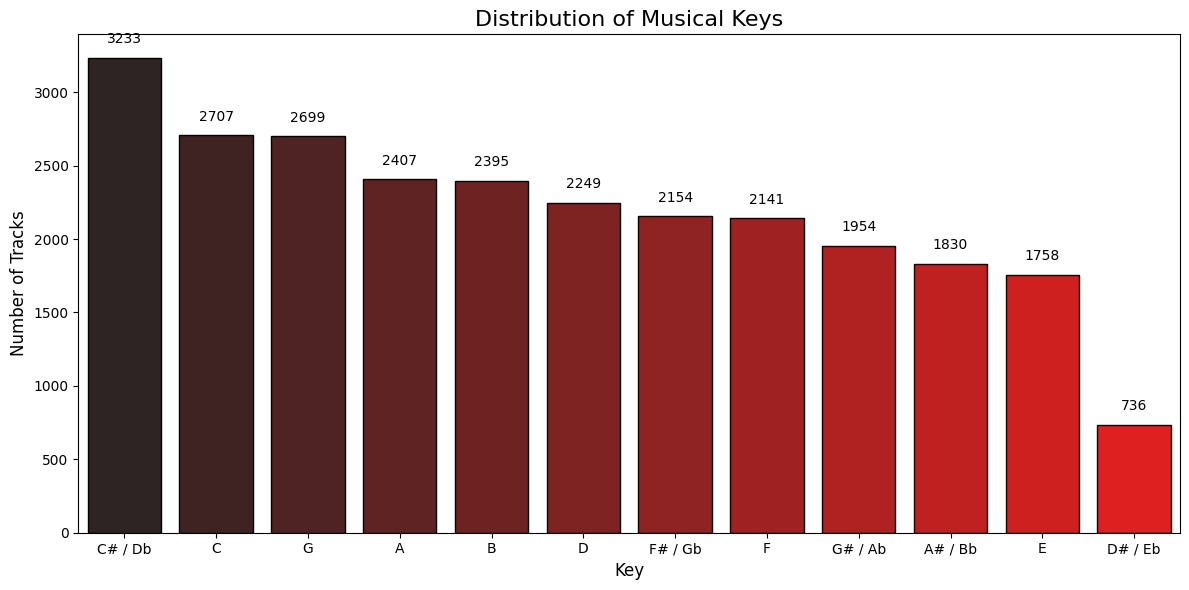

In [ ]:
# Key distribution

# Define the key reverse mapping
key_reverse_mapping = {
    0: 'C', 1: 'C# / Db', 2: 'D', 3: 'D# / Eb', 4: 'E',
    5: 'F', 6: 'F# / Gb', 7: 'G', 8: 'G# / Ab', 9: 'A',
    10: 'A# / Bb', 11: 'B'
}

# Count the occurrences of each key in the dataset and sort them in descending order
key_counts = df1['key'].value_counts().sort_values(ascending=False)

# Map the numerical keys to their respective names using the reverse mapping
key_labels = [key_reverse_mapping[i] for i in key_counts.index]

# Plot the distribution of 'key'
plt.figure(figsize=(12, 6))
sns.barplot(x=key_labels, y=key_counts.values, palette='dark:red', edgecolor='black')

# Add numbers on each bar
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 100,  # Adjust the height to position the text correctly
        f'{int(bar.get_height())}',  # Display the count
        ha='center', fontsize=10
    )

plt.title('Distribution of Musical Keys', fontsize=16)
plt.xlabel('Key', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

- **Loudness**: The distribution is unimodal, with most tracks falling between -10 dB and 0 dB. This range suggests that tracks are generally engineered to maintain moderate loudness levels, which are common in contemporary music production.

  The loudness trend aligns with playlist genre, danceability, and energy. Certain genres like EDM, rap, and pop are closely associated with louder tracks due to their dynamic and engaging nature. Loudness enhances danceability by creating a rhythmically powerful and immersive experience. loudness is a key contributor to energy, as higher levels directly correlate with intensity and vibrancy. The concentration around -6 dB reflects the dominance of these high-energy, danceable genres like EDM, pop, and rap.

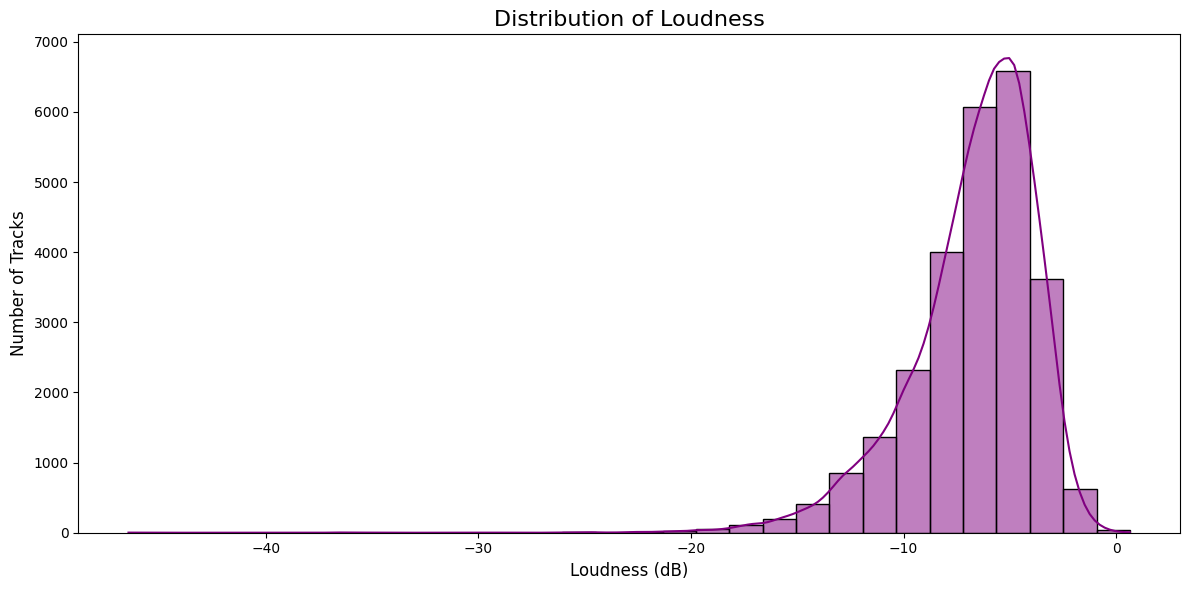

In [ ]:
# Loudness distribution

plt.figure(figsize=(12, 6))
sns.histplot(df1['loudness'], bins=30, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Loudness', fontsize=16)
plt.xlabel('Loudness (dB)', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

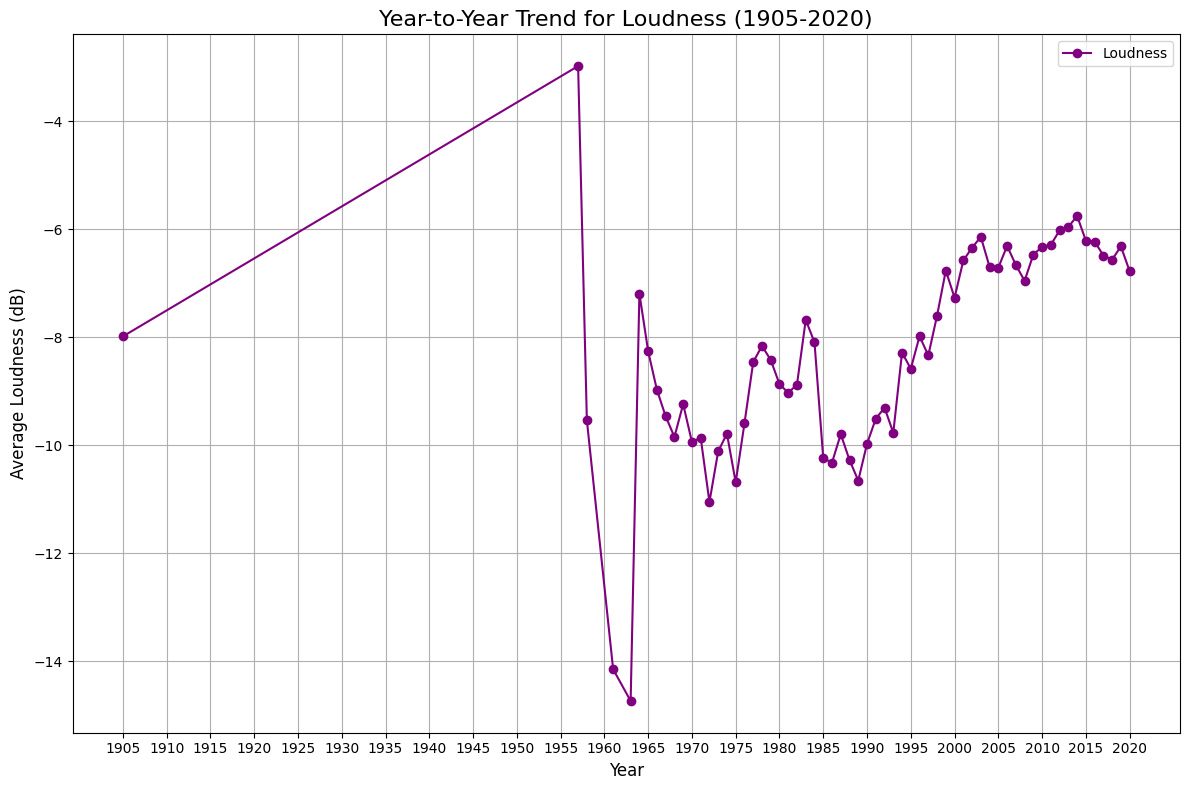

In [ ]:
# Loudness trend (1905-2020) (to compare with other musical style trend)

# Ensure release_year is coerced to numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Group data by 'release_year' and calculate the mean loudness for each year
loudness_trend_full = df1.groupby('release_year')['loudness'].mean()

# Plot year-to-year trend for loudness
plt.figure(figsize=(12, 8))
plt.plot(loudness_trend_full.index, loudness_trend_full.values, marker='o', color='purple', label='Loudness')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Loudness (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Loudness (dB)", fontsize=12)

# Adjust x-axis to show only integers with 5-year intervals
plt.xticks(ticks=range(int(loudness_trend_full.index.min()), int(loudness_trend_full.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


- **Mode**: Most songs are in the major mode (56%) rather than minor, likely due to the dominance of energetic and uplifting genres like EDM and pop in the dataset. Danceability, energy, and loudness are less direct influences on mode.

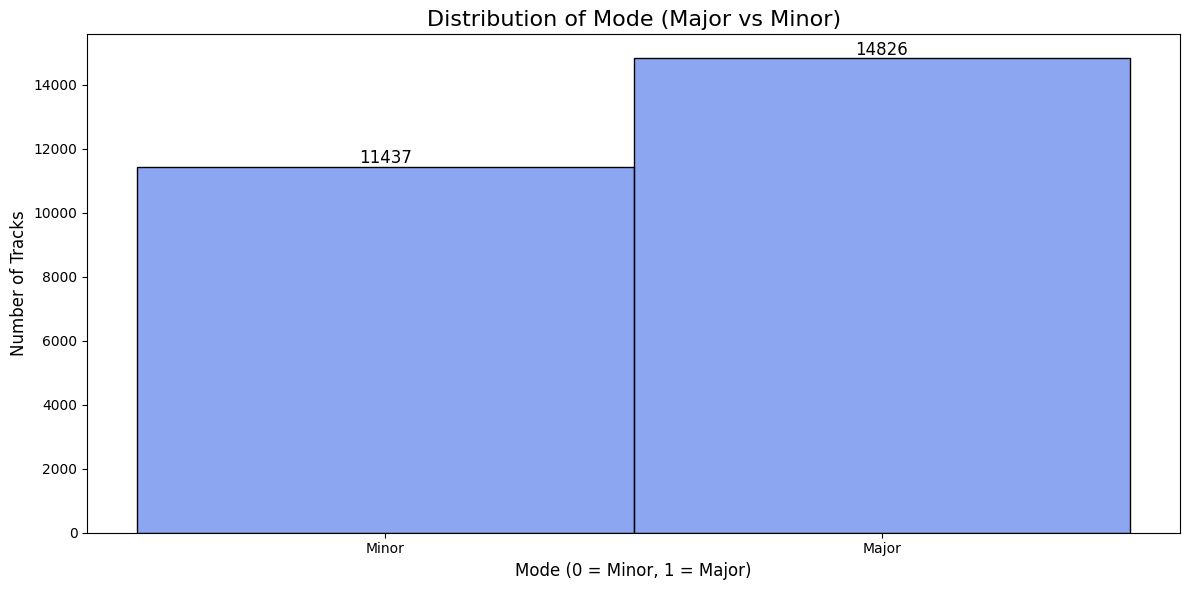

In [ ]:
# Mode distribution

# Plot distribution of mode (major vs minor) with numbers on bars
plt.figure(figsize=(12, 6))
ax = sns.histplot(df1['mode'], bins=2, kde=False, edgecolor='black', discrete=True)

# Add numbers on each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with data
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 100,  # Slightly above the bar
            f'{int(height)}',  # Display the count
            ha='center', fontsize=12, color='black'
        )

# Add titles and labels
plt.title('Distribution of Mode (Major vs Minor)', fontsize=16)
plt.xlabel('Mode (0 = Minor, 1 = Major)', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks([0, 1], ['Minor', 'Major'], fontsize=10)  # Label the modes
plt.tight_layout()
plt.show()

- **Speechiness**: The distribution is heavily skewed toward low speechiness values, reflecting the dominance of traditional music tracks in Spotify's catalog. Most tracks have speechiness values below 0.33, indicating they primarily consist of music with minimal speech-like elements. Very few tracks exceed 0.66, representing purely spoken-word recordings such as audiobooks, podcasts, or poetry readings.

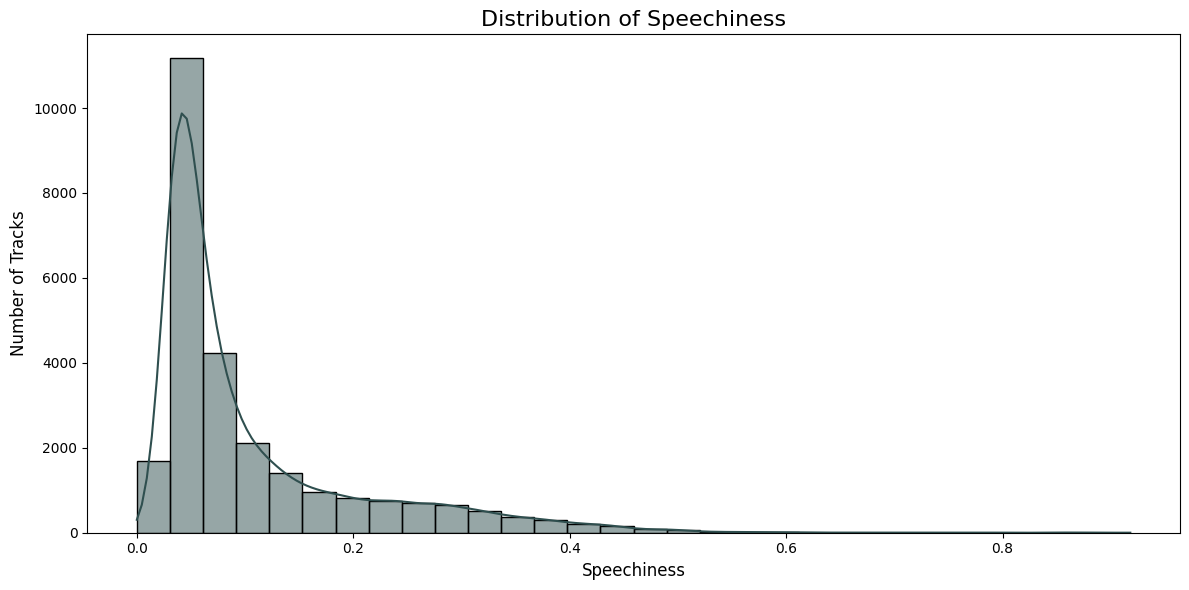

In [ ]:
# Speechiness distribution

# Plot distribution of speechiness
plt.figure(figsize=(12, 6))
sns.histplot(df1['speechiness'], bins=30, kde=True, color='#2F4F4F', edgecolor='black')
plt.title('Distribution of Speechiness', fontsize=16)
plt.xlabel('Speechiness', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

- **Acousticness**: The distribution is heavily skewed toward low acousticness values. This shows the majority of tracks have acousticness values close to 0.0, indicating they are predominantly non-acoustic tracks.

  The trend over time shows that acousticness has remained consistently low, particularly after 1985, where it stabilizes below 0.2. This aligns with trends in playlist genres, danceability, and energy, which often emphasize high-energy, rhythmical, and electronically produced tracks over acoustic elements.

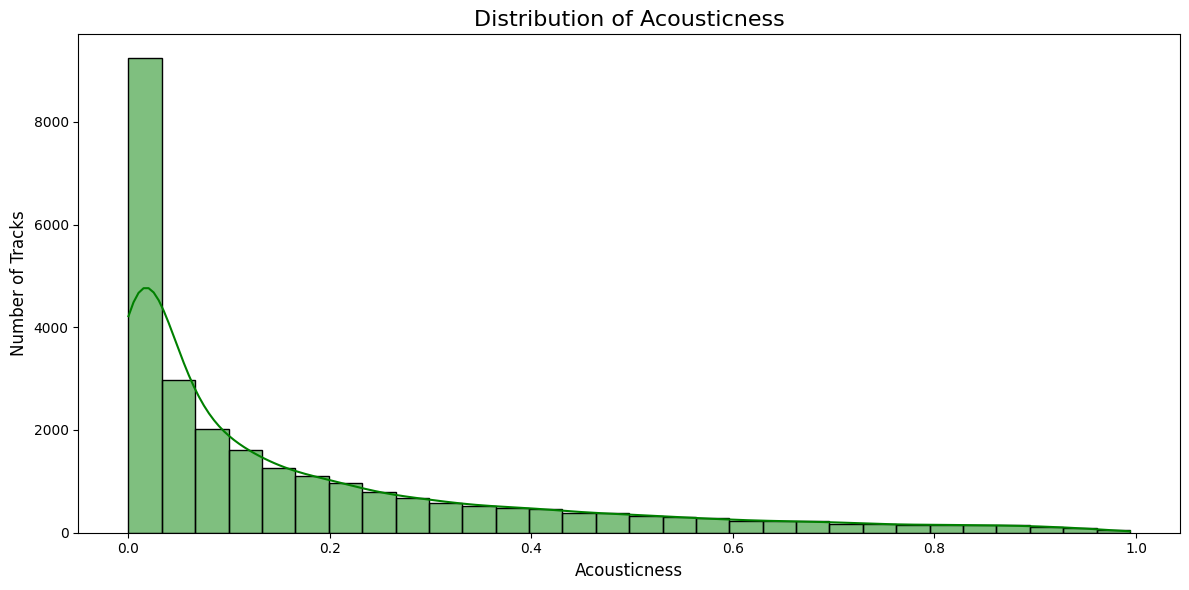

In [ ]:
# Acousticness distribution

# Plot distribution of acousticness
plt.figure(figsize=(12, 6))
sns.histplot(df1['acousticness'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Acousticness', fontsize=16)
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

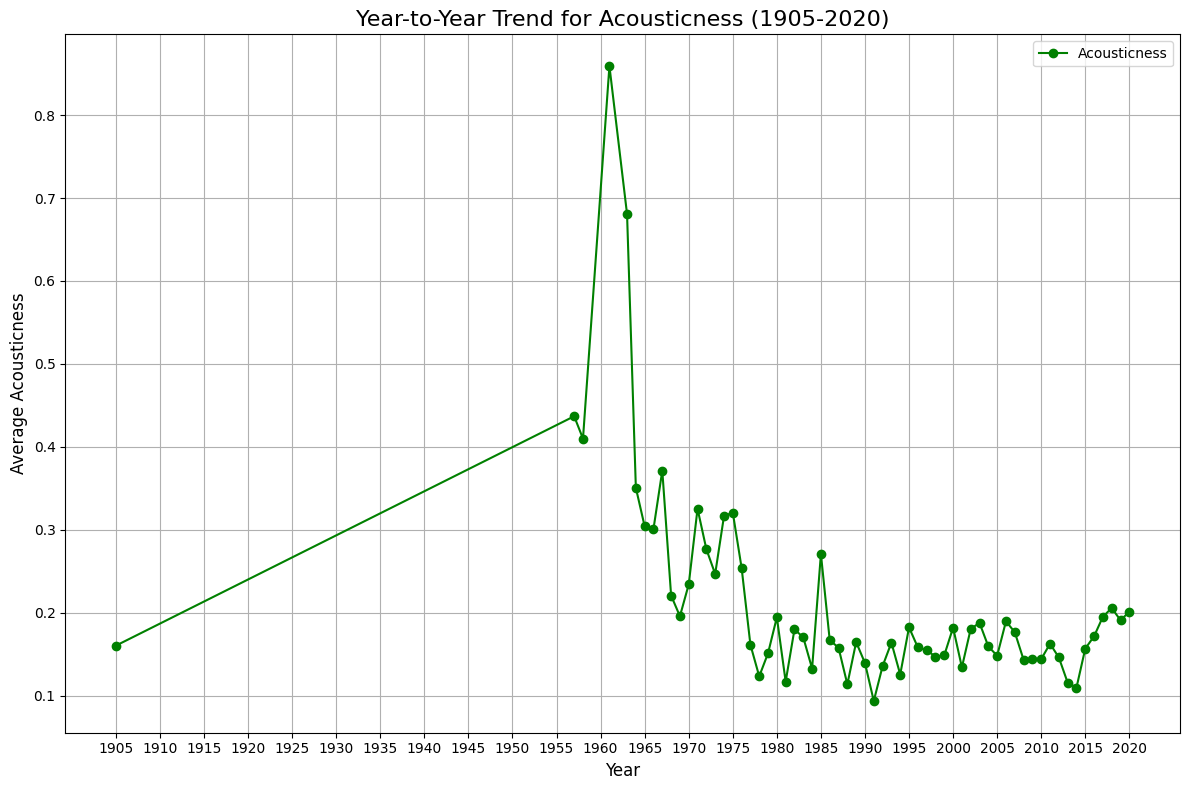

In [ ]:
# Acousticness trend (1905-2020) (to compare with other musical style trend)

# Ensure release_year is coerced to numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Group data by 'release_year' and calculate the mean acousticness for each year
acousticness_trend = df1.groupby('release_year')['acousticness'].mean()

# Plot year-to-year trend for acousticness
plt.figure(figsize=(12, 8))
plt.plot(acousticness_trend.index, acousticness_trend.values, marker='o', color='green', label='Acousticness')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Acousticness (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Acousticness", fontsize=12)

# Adjust x-axis to show only integers with 5-year intervals
plt.xticks(ticks=range(int(acousticness_trend.index.min()), int(acousticness_trend.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Instrumentalness**: The high concentration near 0.0 suggests that most tracks in the dataset include prominent vocal content, such as singing, rap, or spoken word.

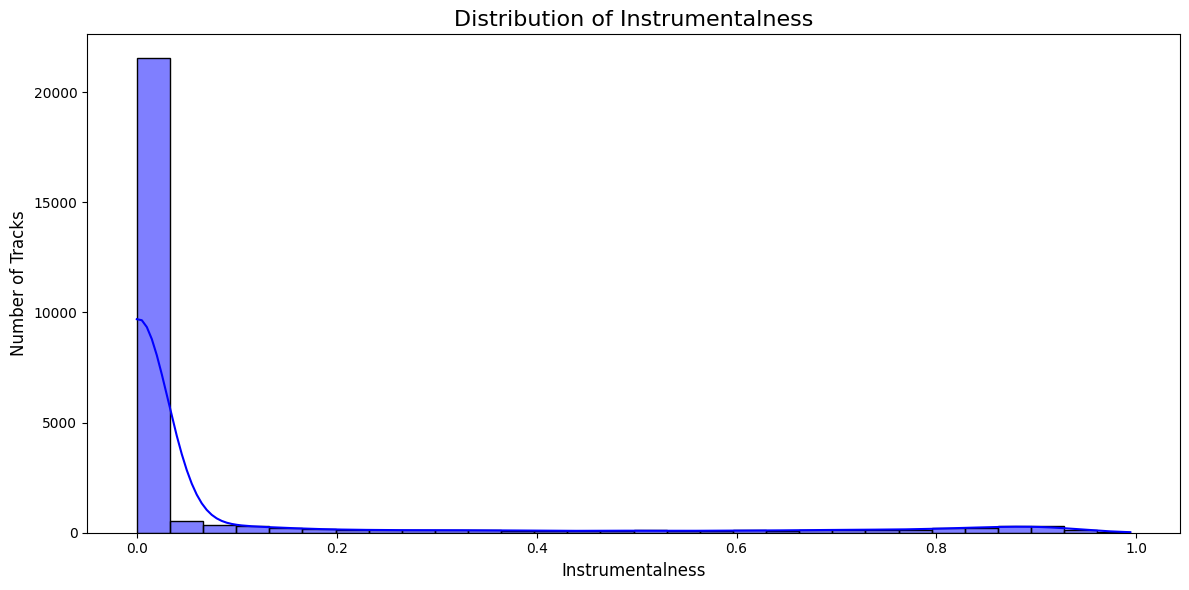

In [ ]:
# Instrumentalness distribution

# Plot distribution of instrumentalness
plt.figure(figsize=(12, 6))
sns.histplot(df1['instrumentalness'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Instrumentalness', fontsize=16)
plt.xlabel('Instrumentalness', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

- **Liveness**: The distribution of liveliness is heavily concentrated at lower values, particularly around 0.1–0.2, indicating that the majority of tracks are studio recordings with little to no audience or live elements.

  The assumption that live music recordings have increased in recent years due to advancements in technology does not align with the observed trend. Instead, it has significantly decreased since 2016, reflecting a preference for polished studio productions over live recordings.

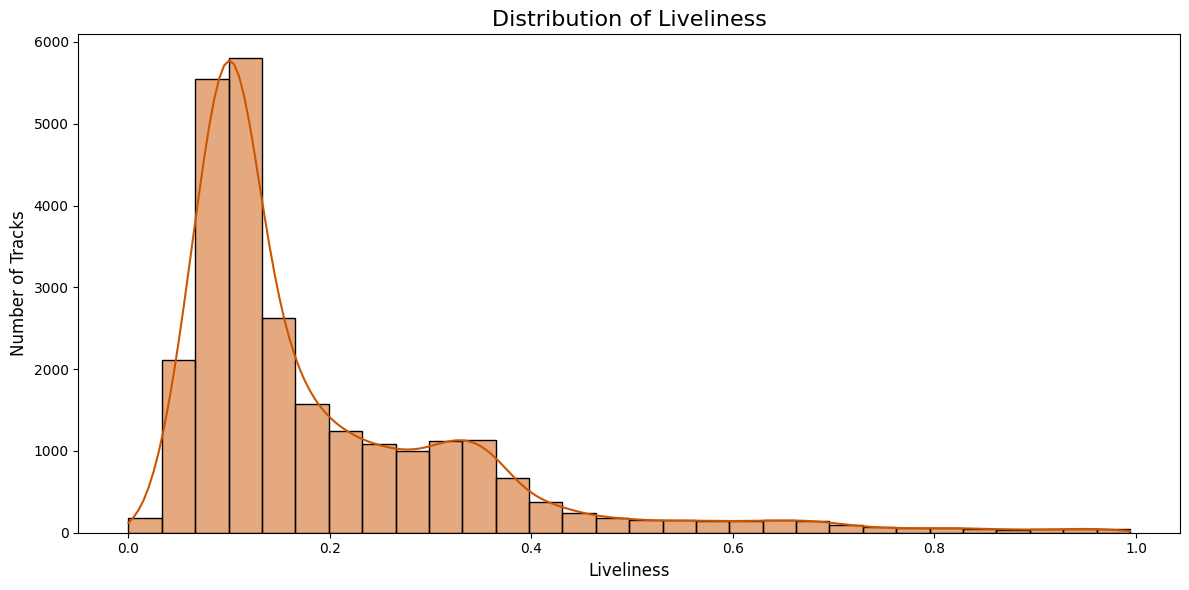

In [ ]:
# Liveness distribution

# Plot distribution of liveliness
plt.figure(figsize=(12, 6))
sns.histplot(df1['liveness'], bins=30, kde=True, color='#CC5500', edgecolor='black')
plt.title('Distribution of Liveliness', fontsize=16)
plt.xlabel('Liveliness', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

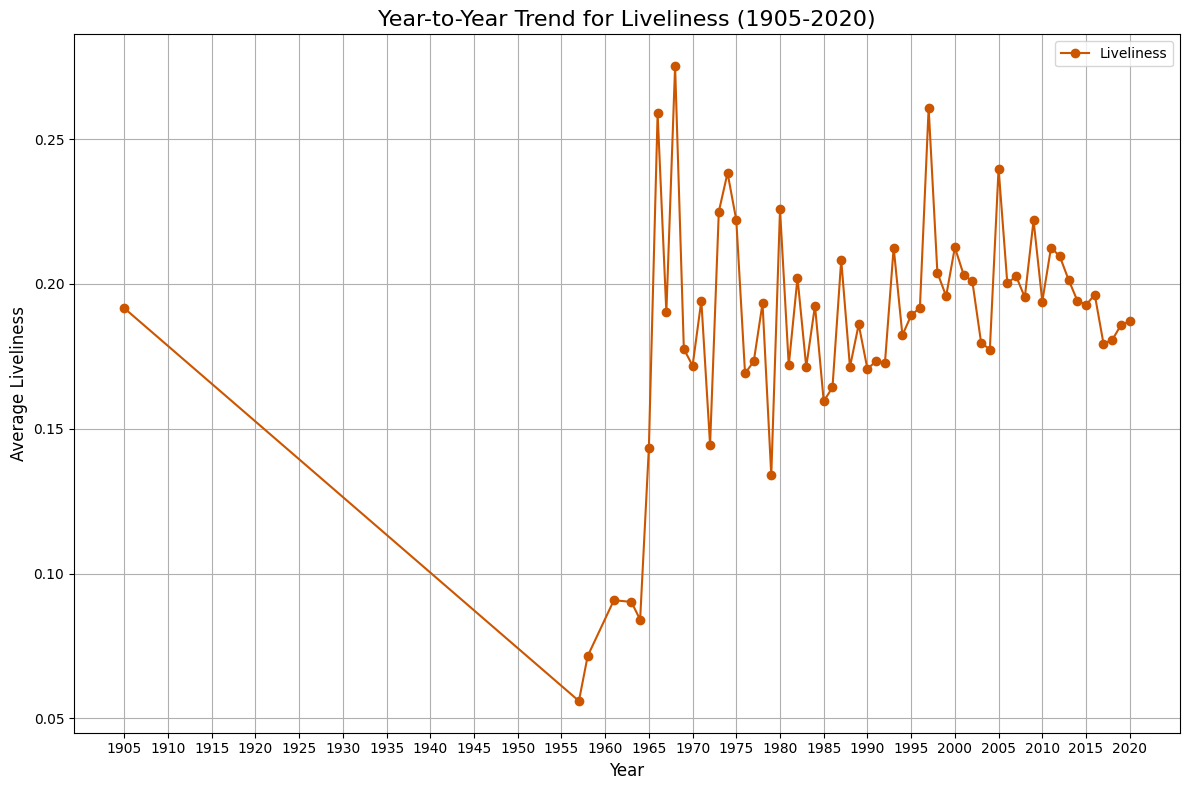

In [ ]:
# Liveliness trend (1905-2020)

# Ensure release_year is coerced to numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Group data by 'release_year' and calculate the mean liveliness for each year
liveliness_trend = df1.groupby('release_year')['liveness'].mean()

# Plot year-to-year trend for liveliness
plt.figure(figsize=(12, 8))
plt.plot(liveliness_trend.index, liveliness_trend.values, marker='o', color='#CC5500', label='Liveliness')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Liveliness (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Liveliness", fontsize=12)

# Adjust x-axis to show only integers with 5-year intervals
plt.xticks(ticks=range(int(liveliness_trend.index.min()), int(liveliness_trend.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

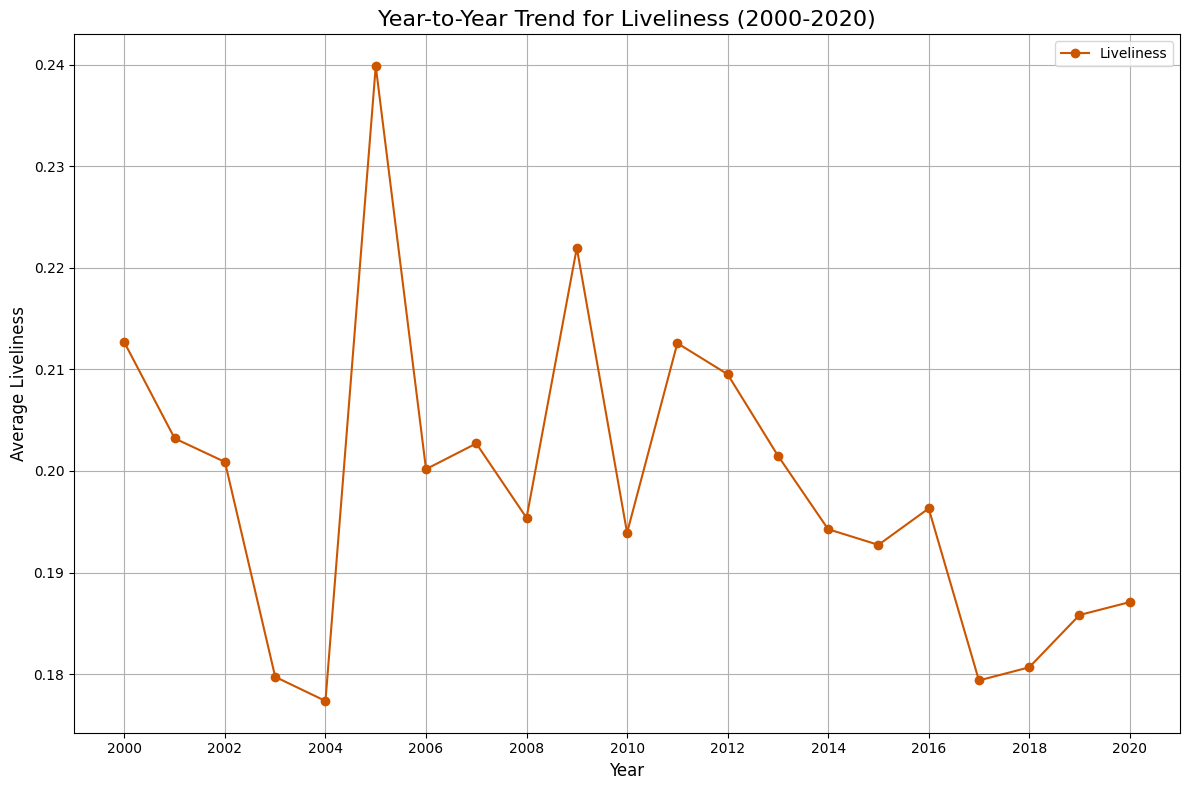

In [ ]:
# Liveliness trend (2000-2020)

# Filter the dataset for years between 2000 and 2020
df1_filtered = df1[(df1['release_year'] >= 2000) & (df1['release_year'] <= 2020)]

# Group data by 'release_year' and calculate the mean liveliness for each year
liveliness_trend_filtered = df1_filtered.groupby('release_year')['liveness'].mean()

# Plot year-to-year trend for liveliness (2000-2020)
plt.figure(figsize=(12, 8))
plt.plot(liveliness_trend_filtered.index, liveliness_trend_filtered.values, marker='o', color='#CC5500', label='Liveliness')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Liveliness (2000-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Liveliness", fontsize=12)

# Adjust x-axis to show only integers with 2-year intervals
plt.xticks(ticks=range(2000, 2021, 2), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Valence**: Valence: Overall, the distribution of valence shows a wide variety of both positive and negative tracks, with values evenly distributed across the range from 0 to 1.

  The trend over time reveals a notable decline after 2010, with valence values steadily decreasing to around 0.3 by 2015-2020. This suggests a shift in the emotional tone of music during this period, potentially influenced by changes in popular genres, and cultural preferences.

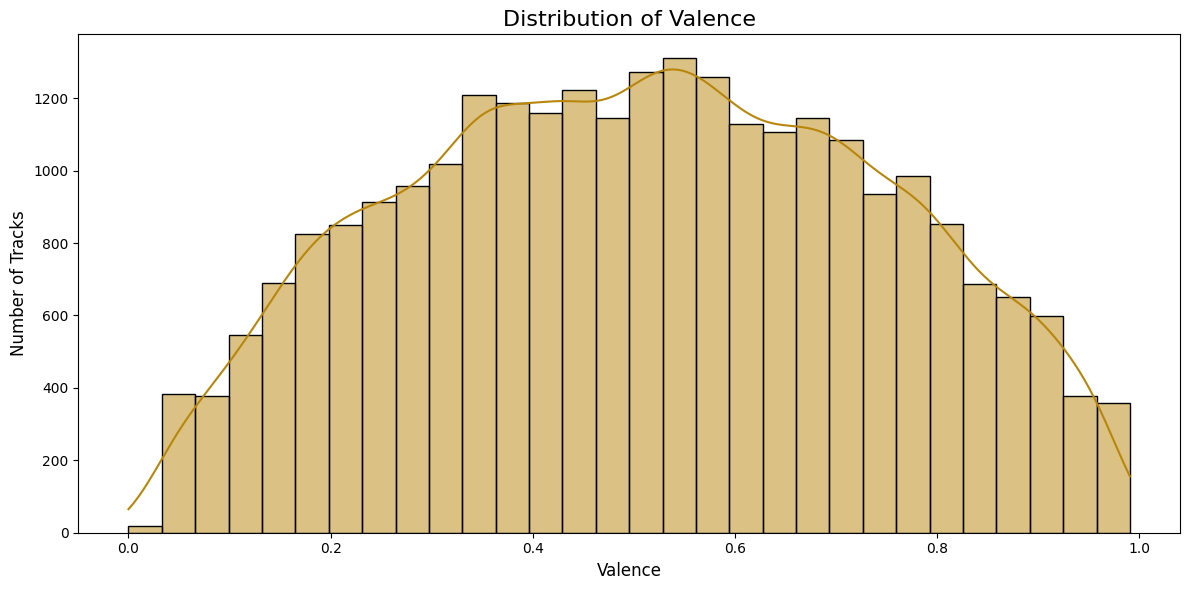

In [ ]:
# Valence distribution

# Plot the distribution for valence
plt.figure(figsize=(12, 6))
sns.histplot(df1['valence'], bins=30, kde=True, color='#B8860B', edgecolor='black')
plt.title('Distribution of Valence', fontsize=16)
plt.xlabel('Valence', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

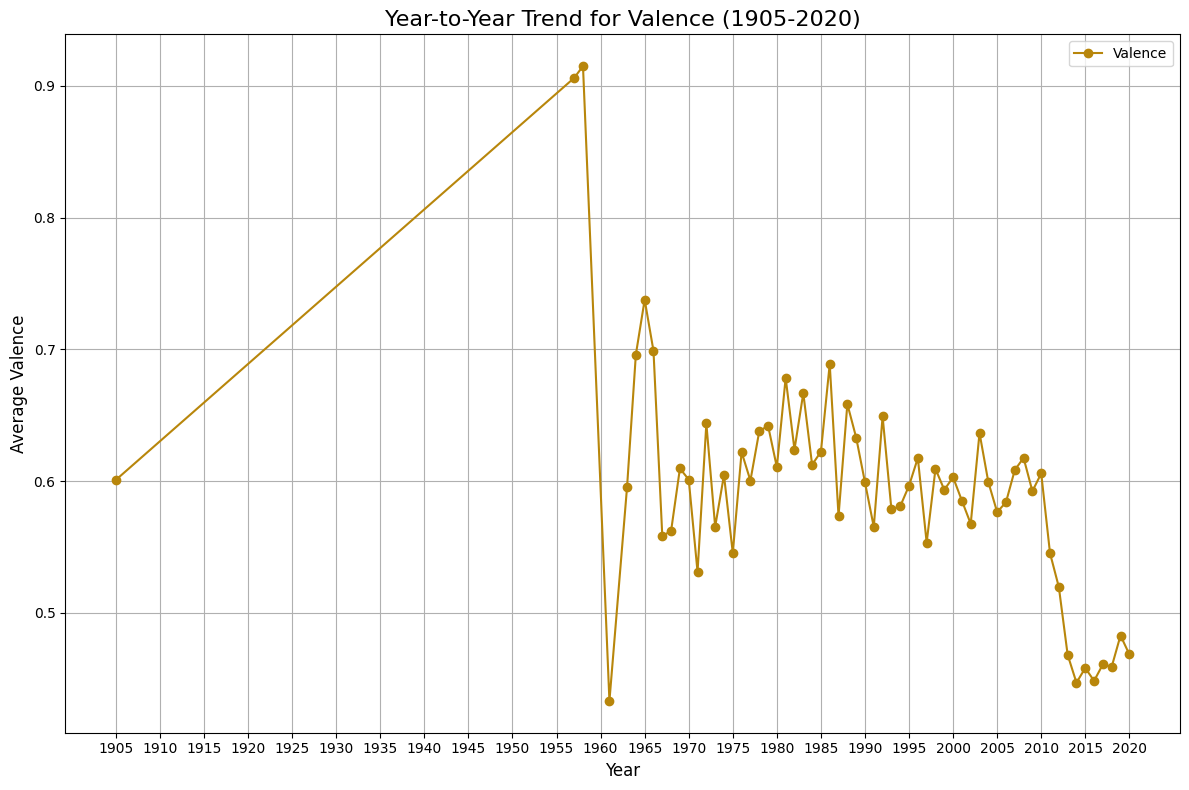

In [ ]:
# Valence trend (1905-2020)

# Group data by 'release_year' and calculate the mean valence for each year
valence_trend = df1.groupby('release_year')['valence'].mean()

# Plot year-to-year trend for valence
plt.figure(figsize=(12, 8))
plt.plot(valence_trend.index, valence_trend.values, marker='o', color='#B8860B', label='Valence')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Valence (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Valence", fontsize=12)
plt.xticks(ticks=range(int(valence_trend.index.min()), int(valence_trend.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


- **Tempo**: The tempo distribution is unimodal, with most tracks clustering around 120–130 BPM, aligning with popular music optimized for danceability and broad appeal. Slower tempos (<80 BPM) are linked to ballads, while faster tempos (>150 BPM) are common in high-energy genres like EDM and fast-paced rock. The mid-range concentration reflects a balance of energy and accessibility.

  Although the trend cannot be perfectly measured in relation to other variables individually, it is reasonable to infer that the tempo variable is directly influenced by playlist genre, danceability, and energy, as these factors are inherently tied to a track's purpose and style. This highlights the importance of checking for multicollinearity issues when identifying key variables for the target variable, popularity.

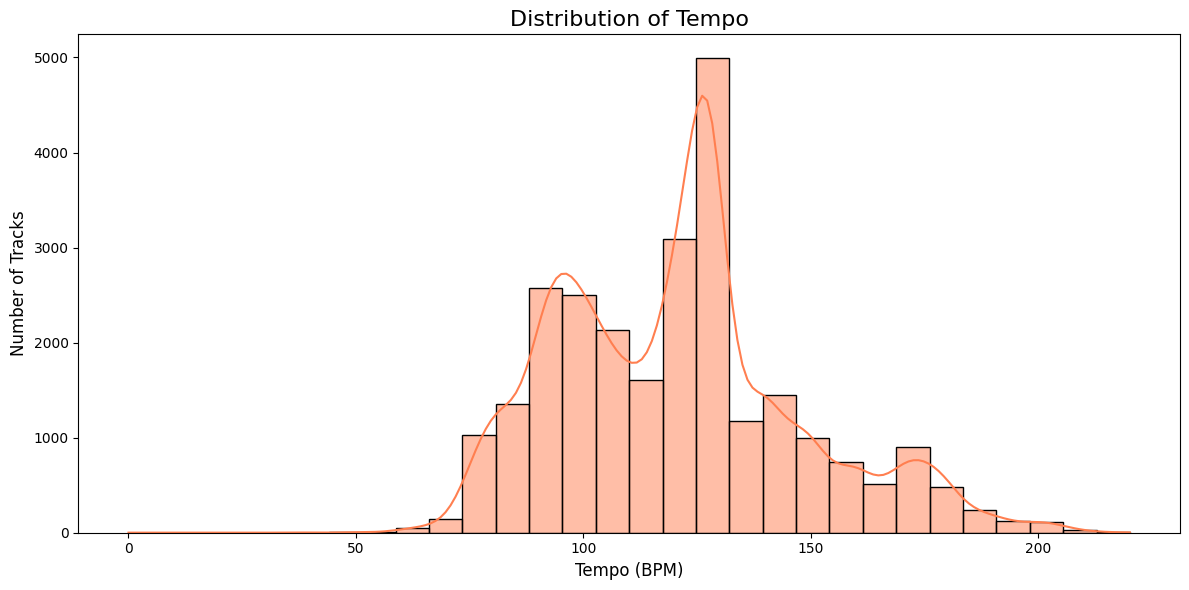

In [ ]:
# Tempo distribution

# Plot distribution of Tempo
plt.figure(figsize=(12, 6))
sns.histplot(df1['tempo'], bins=30, kde=True, color='coral', edgecolor='black')
plt.title('Distribution of Tempo', fontsize=16)
plt.xlabel('Tempo (BPM)', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

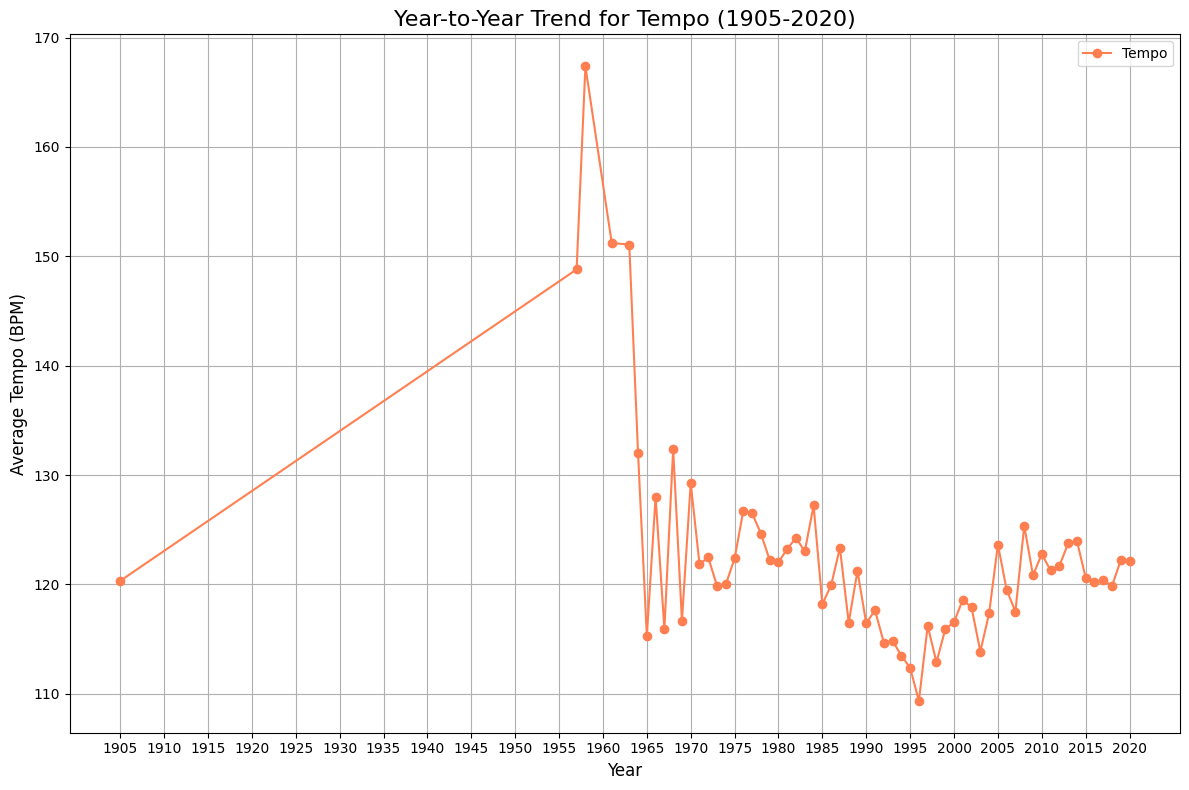

In [ ]:
# Tempo trend (1905-2020)

# Group data by 'release_year' and calculate the mean tempo for each year
tempo_trend = df1.groupby('release_year')['tempo'].mean()

# Plot year-to-year trend for tempo
plt.figure(figsize=(12, 8))
plt.plot(tempo_trend.index, tempo_trend.values, marker='o', color='coral', label='Tempo')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Tempo (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Tempo (BPM)", fontsize=12)

# Adjust x-axis to show all years
plt.xticks(ticks=range(int(tempo_trend.index.min()), int(tempo_trend.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Duration time**: The distribution of track durations, measured in milliseconds, is approximately normal, centered around 200,000 milliseconds (3 minutes and 20 seconds).

  The trend shows a steady decrease in track durations since 2014, reflecting the broader shift in modern media consumption, where shorter content is prioritized to capture attention quickly in a highly competitive digital environment, as opposed to traditional radio and streaming norms.

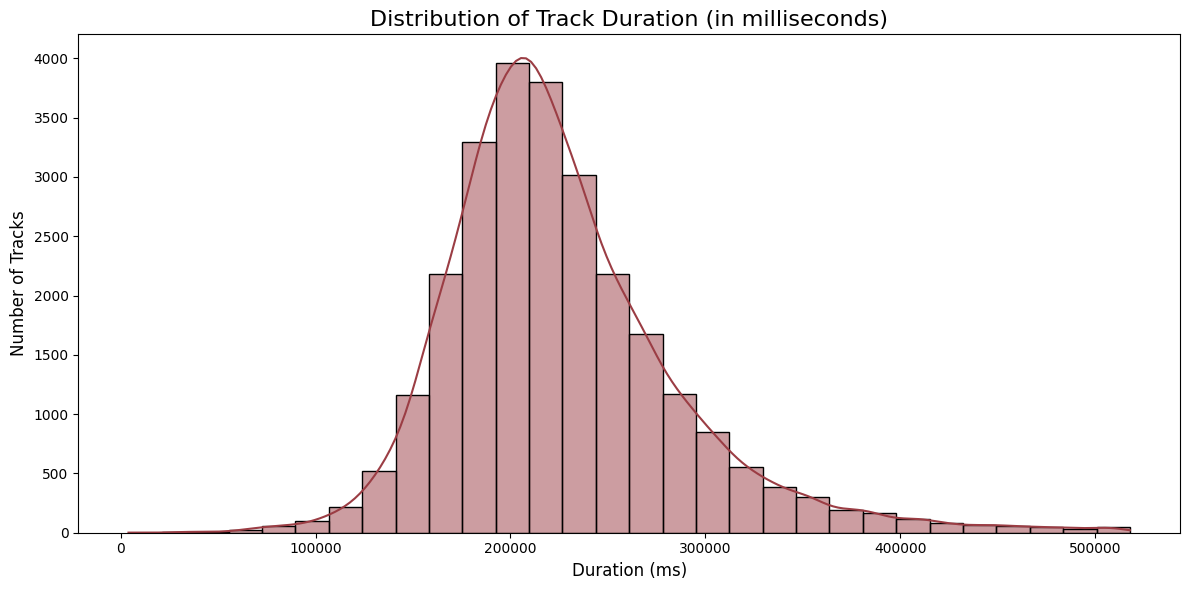

In [ ]:
# Duration distribution

# Plot the distribution of duration_ms
plt.figure(figsize=(12, 6))
sns.histplot(df1['duration_ms'], bins=30, kde=True, color='#9b3d44', edgecolor='black')
plt.title('Distribution of Track Duration (in milliseconds)', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

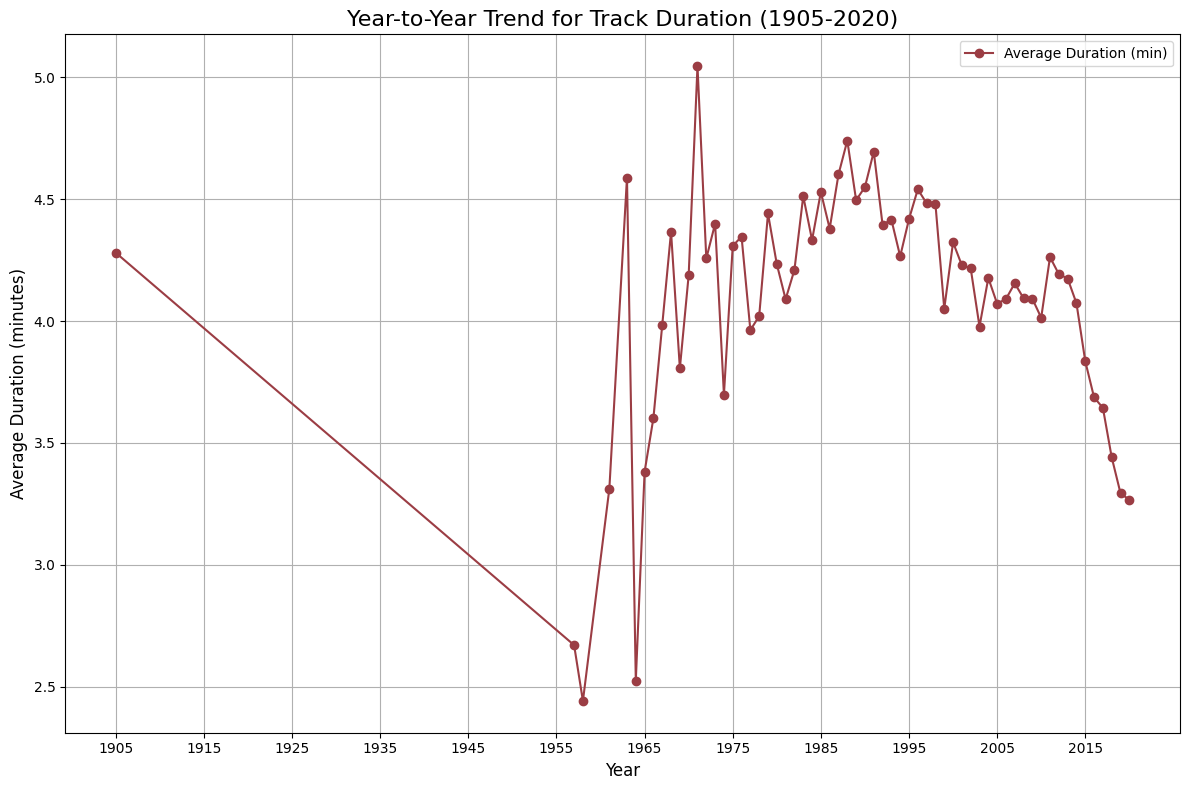

In [ ]:
# Duration time trend (1905-2020)

# Convert release_year to numeric in case it is not
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Convert duration from milliseconds to minutes for easier interpretation
df1['duration_min'] = df1['duration_ms'] / 60000

# Calculate the average duration for each year
duration_trend_full = df1.groupby('release_year')['duration_min'].mean()

# Plot the trend for duration
plt.figure(figsize=(12, 8))
plt.plot(duration_trend_full.index, duration_trend_full.values, marker='o', color='#9b3d44', label='Average Duration (min)')

# Add title, labels, and legend
plt.title('Year-to-Year Trend for Track Duration (1905-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
plt.xticks(ticks=range(int(duration_trend_full.index.min()), int(duration_trend_full.index.max()) + 1, 10), fontsize=10)  # Show ticks every 10 years
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular**: The popular songs account for 22% of the total tracks in the dataset. The steady increase in popularity from 2016 to 2020 reflects how the "popular" variable is evaluated, based on recent plays. As a result, songs released more recently tend to be the most played, driving up their popularity score during this time period.

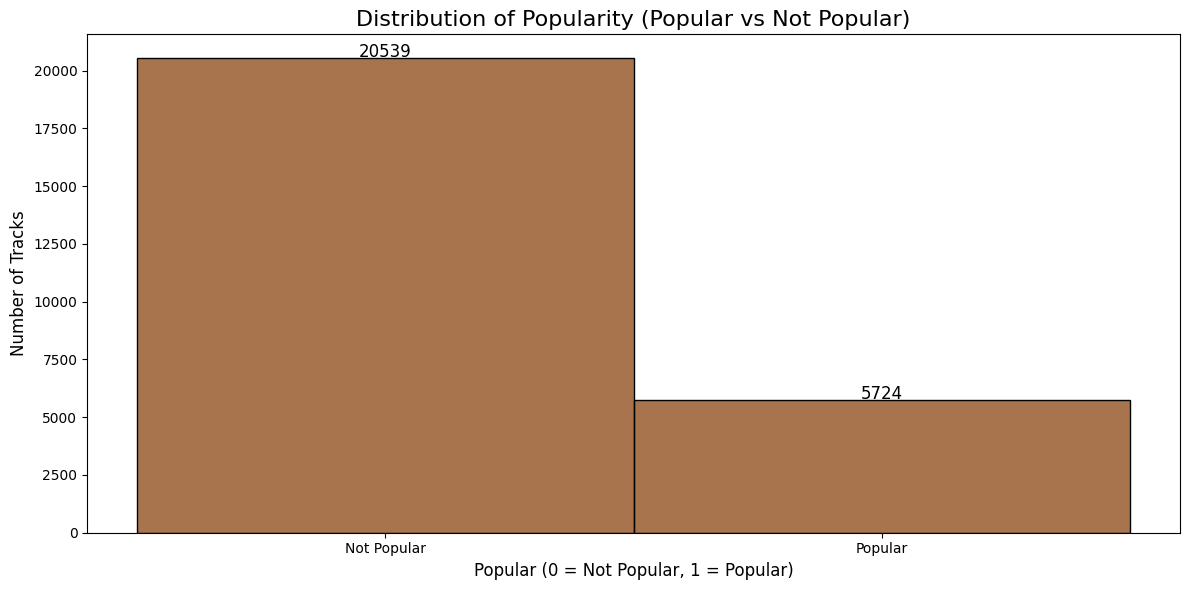

In [ ]:
# Popoular distribution

# Plot distribution of Popular (0 = Not Popular, 1 = Popular)
plt.figure(figsize=(12, 6))
ax = sns.histplot(df1['popular'], bins=2, kde=False, color= '#8B4513', edgecolor='black', discrete=True)
plt.title('Distribution of Popularity (Popular vs Not Popular)', fontsize=16)
plt.xlabel('Popular (0 = Not Popular, 1 = Popular)', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks([0, 1], ['Not Popular', 'Popular'], fontsize=10)  # Label the categories

# Annotate the bars with counts
for bar in ax.patches:
    count = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, count + 50, f'{int(count)}',
             ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

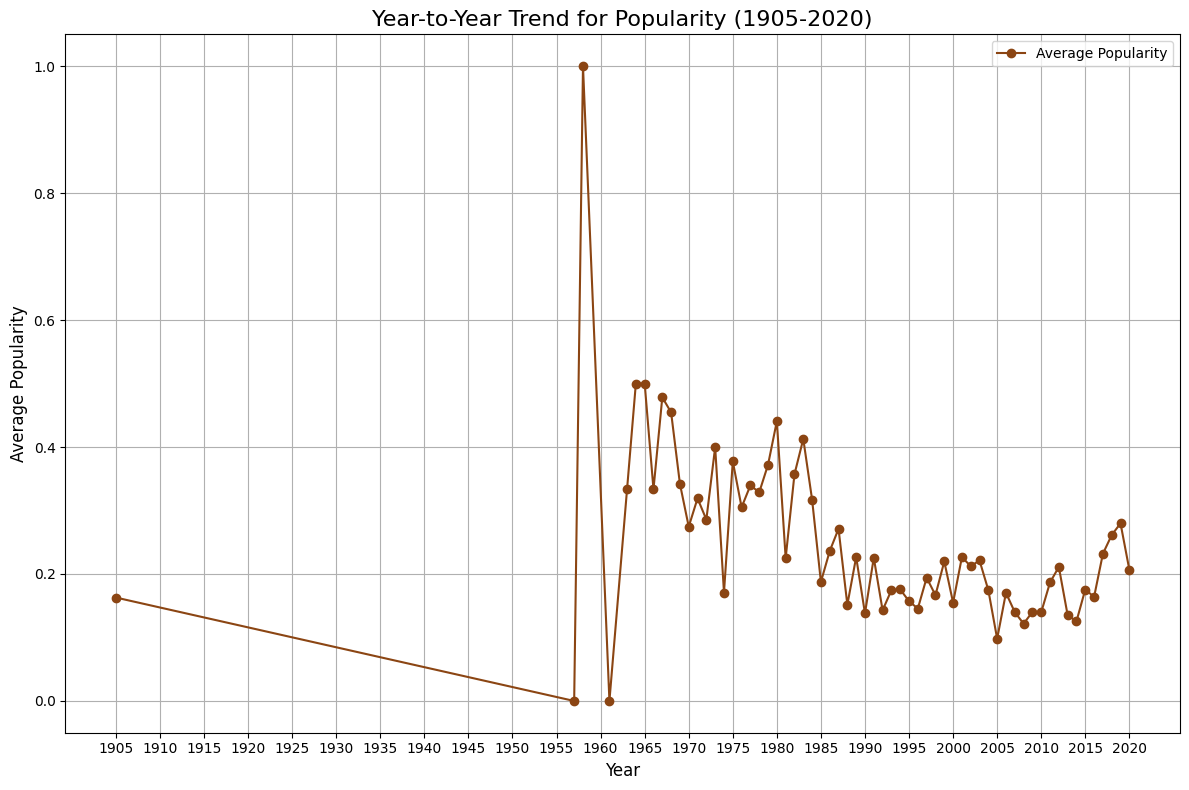

In [ ]:
# Popular trend (1905-2020)

# Ensure release_year is coerced to numeric in case it is not
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Group data by 'release_year' and calculate the average popularity for each year
popular_trend = df1.groupby('release_year')['popular'].mean()

# Plot the trend for popular
plt.figure(figsize=(12, 8))
plt.plot(popular_trend.index, popular_trend.values, marker='o', color='#8B4513', label='Average Popularity')

# Add title, labels, and legend
plt.title('Year-to-Year Trend for Popularity (1905-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(ticks=range(1905, 2021, 5), fontsize=10)  # Show ticks every 5 years
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

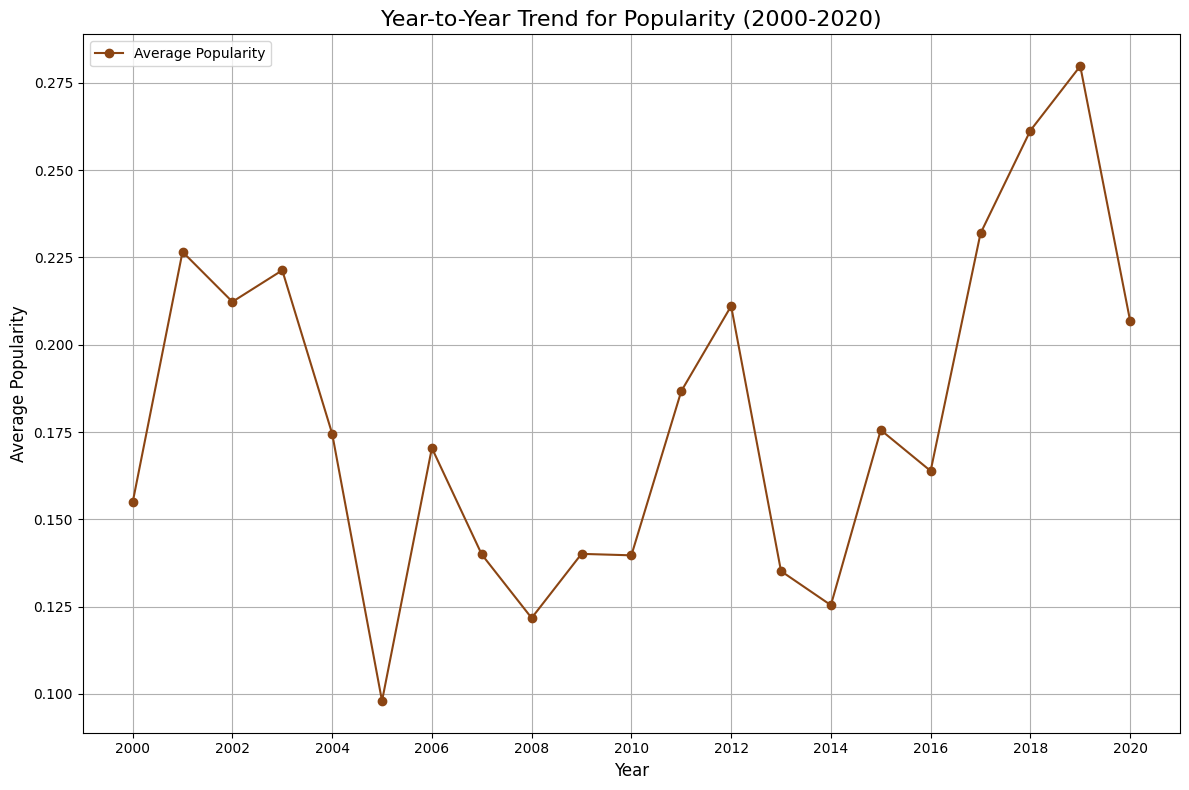

In [ ]:
# Popualr trend (2000-2020)

# Ensure release_year is coerced to numeric in case it is not
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Filter the data for the year range (2000-2020)
df_filtered = df1[(df1['release_year'] >= 2000) & (df1['release_year'] <= 2020)]

# Group data by 'release_year' and calculate the average popularity for each year
popular_trend = df_filtered.groupby('release_year')['popular'].mean()

# Plot the trend for popular
plt.figure(figsize=(12, 8))
plt.plot(popular_trend.index, popular_trend.values, marker='o', color='#8B4513', label='Average Popularity')  # Dark brown color

# Add title, labels, and legend
plt.title('Year-to-Year Trend for Popularity (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(ticks=range(2000, 2021, 2), fontsize=10)  # Show ticks every 2 years
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Are there specific genres, styles, or artist profiles gaining momentum?

- **Ppoular Track Artist**: It is clear that popular songs are often by well-known and established artists, which suggests that an artist's fame plays a significant role in determining a song's popularity. The top 10 artists in this category are a mix of EDM DJs, pop stars, and Latin music artists.

<ipython-input-40-a83f3d78bf84>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='track_artist', x='track_count', data=top_artists, palette='crest', edgecolor='black')


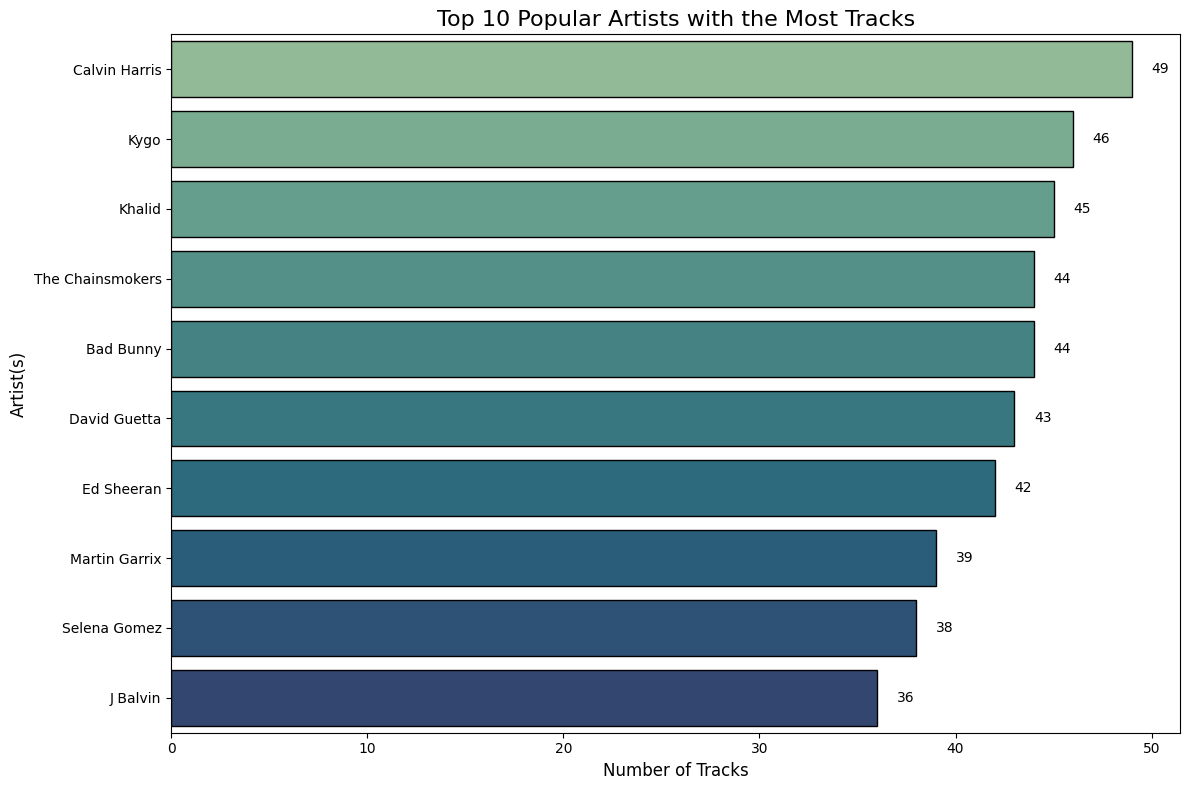

In [ ]:
# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Count the number of tracks per artist for popular songs
artist_counts = popular_songs['track_artist'].value_counts().reset_index()
artist_counts.columns = ['track_artist', 'track_count']

# Focus on the top 10 artists with the most tracks
top_artists = artist_counts.head(10)

# Plot the distribution of top artists
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='track_artist', x='track_count', data=top_artists, palette='crest', edgecolor='black')

# Add numbers to each bar
for bar in ax.patches:
    plt.text(
        bar.get_width() + 1,  # Position slightly beyond the bar's width
        bar.get_y() + bar.get_height() / 2,  # Center vertically in the bar
        f'{int(bar.get_width())}',  # Display the count as an integer
        va='center', fontsize=10, color='black'
    )

plt.title('Top 10 Popular Artists with the Most Tracks', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist(s)', fontsize=12)
plt.tight_layout()
plt.show()

- **Popular release year**: The trend for popular songs mirrors the overarching trend observed in section 3.1). From 2000 to 2020, there is a significant increase in the number of popular songs starting in 2014, with a dramatic peak in 2019. This aligns with the nature of the "popular" variable, which is based on recent play counts. As a result, songs released more recently are more likely to be classified as popular due to their higher number of plays.








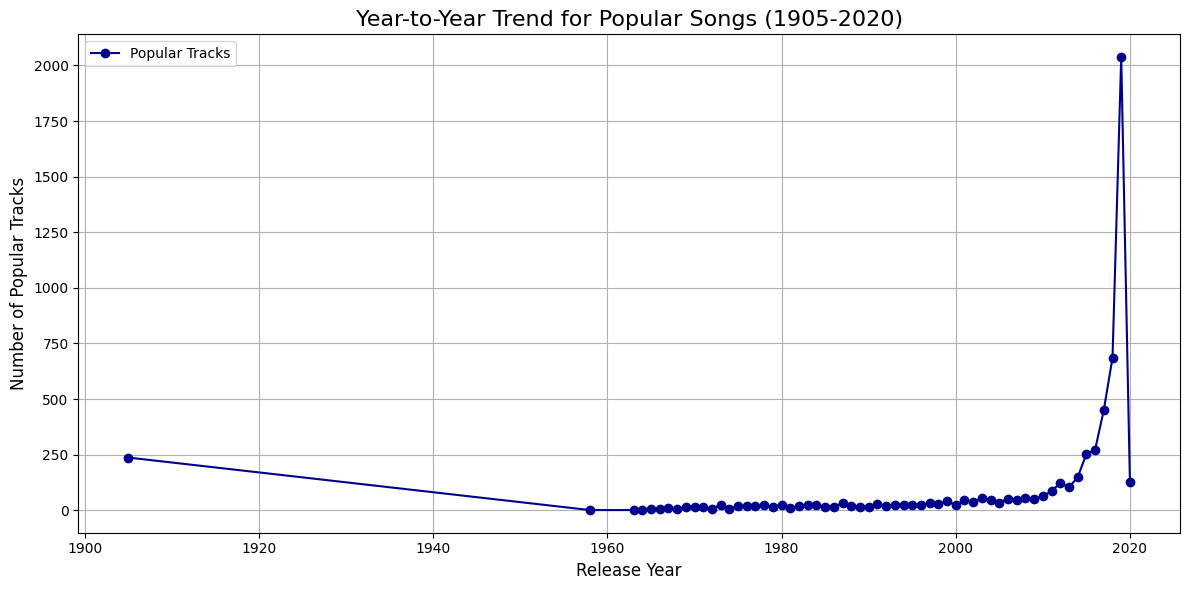

In [ ]:
# Popular release year trend (1905-2020)

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Group by 'release_year' and count the number of popular tracks per year
popular_by_year = popular_songs.groupby('release_year').size()

# Plot the trend for popular songs over the years
plt.figure(figsize=(12, 6))
plt.plot(popular_by_year.index, popular_by_year.values, marker='o', color='darkblue', label='Popular Tracks')

# Add title, labels, and legend
plt.title('Year-to-Year Trend for Popular Songs (1905-2020)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Popular Tracks', fontsize=12)

plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

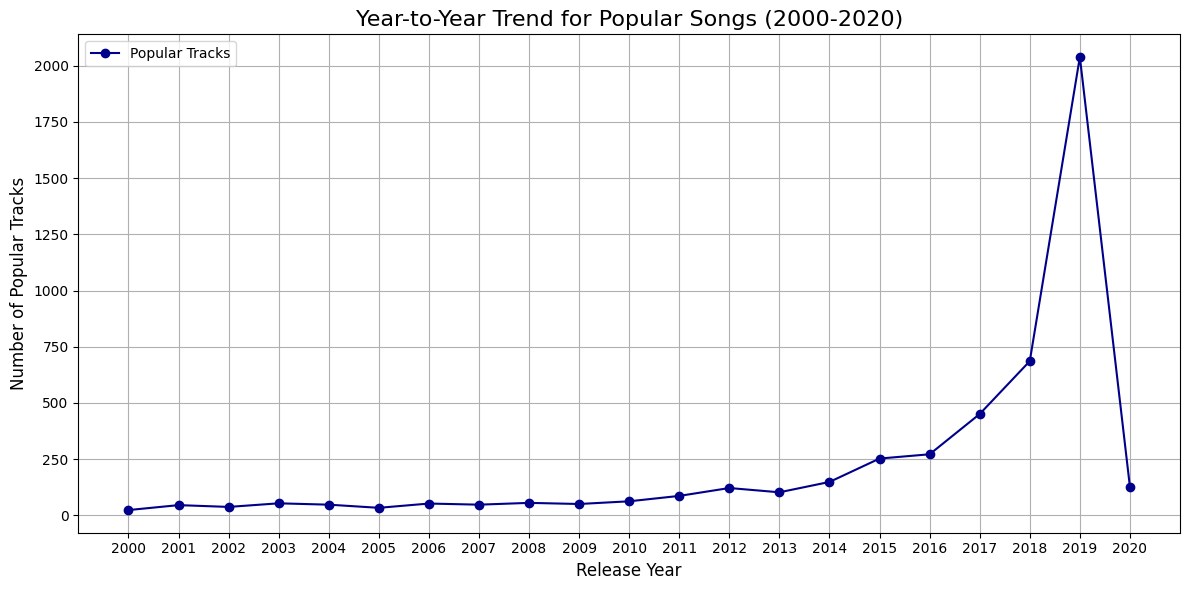

In [ ]:
# Popular release year trend (2000-2020)

# Ensure 'release_year' is numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Filter the dataset for release years between 2000 and 2020
popular_songs_filtered = popular_songs[(popular_songs['release_year'] >= 2000) & (popular_songs['release_year'] <= 2020)]

# Group by 'release_year' and count the number of popular tracks per year
popular_by_year = popular_songs_filtered.groupby('release_year').size()

# Plot the trend for popular songs over the years
plt.figure(figsize=(12, 6))
plt.plot(popular_by_year.index, popular_by_year.values, marker='o', color='darkblue', label='Popular Tracks')

# Add title, labels, and legend
plt.title('Year-to-Year Trend for Popular Songs (2000-2020)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Popular Tracks', fontsize=12)

# Set the x-axis ticks to be integers
plt.xticks(ticks=range(2000, 2021, 1), labels=range(2000, 2021, 1), fontsize=10)

plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular release month**: Based on the previous analysis in of release months in 3.1), the top three months for popular tracks are January, June, and November. These months show a higher concentration of releases due to a combination of industry strategies, seasonal appeal, and market conditions.

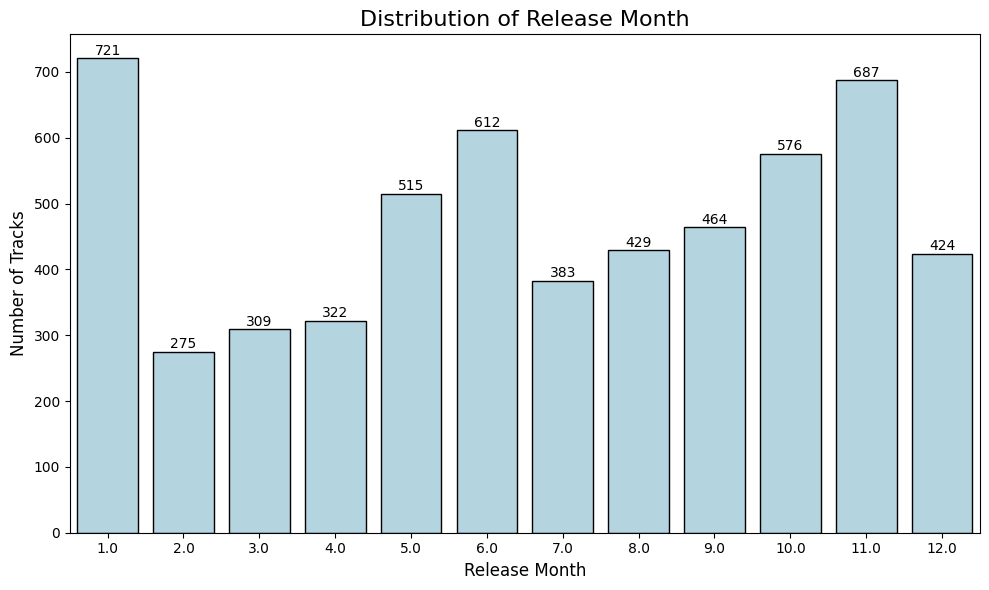

In [ ]:
# Popular release month distribution

# Ensure 'release_month' is numeric
df1['release_month'] = pd.to_numeric(df1['release_month'], errors='coerce')

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Bar graph for distribution of releasem month
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='release_month', data=popular_songs, color='lightblue', edgecolor='black')

# Add numbers to each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with data
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 5,  # Slightly above the bar
            f'{int(height)}',  # Display the count
            ha='center', fontsize=10, color='black'
        )

plt.title('Distribution of Release Month', fontsize=16)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

- **Popular playlist genre**: The genre distribution of popular songs is dominated by pop, Latin, and R&B, contrasting with the broader trend of EDM, rap, and pop. This reflects the universal appeal of pop and R&B to a wide audience, while the rise of Latin music highlights its growing influence and diverse fanbase, contributing to higher streaming numbers in recent years.

  The more recent trend from 2018 to 2020 shows a significant surge in the popularity of Latin music, making the largest difference compared to other genres. This is followed by rap, pop, and R&B, which all experienced similar growth.

<ipython-input-213-6da5f2586533>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm', edgecolor='black')


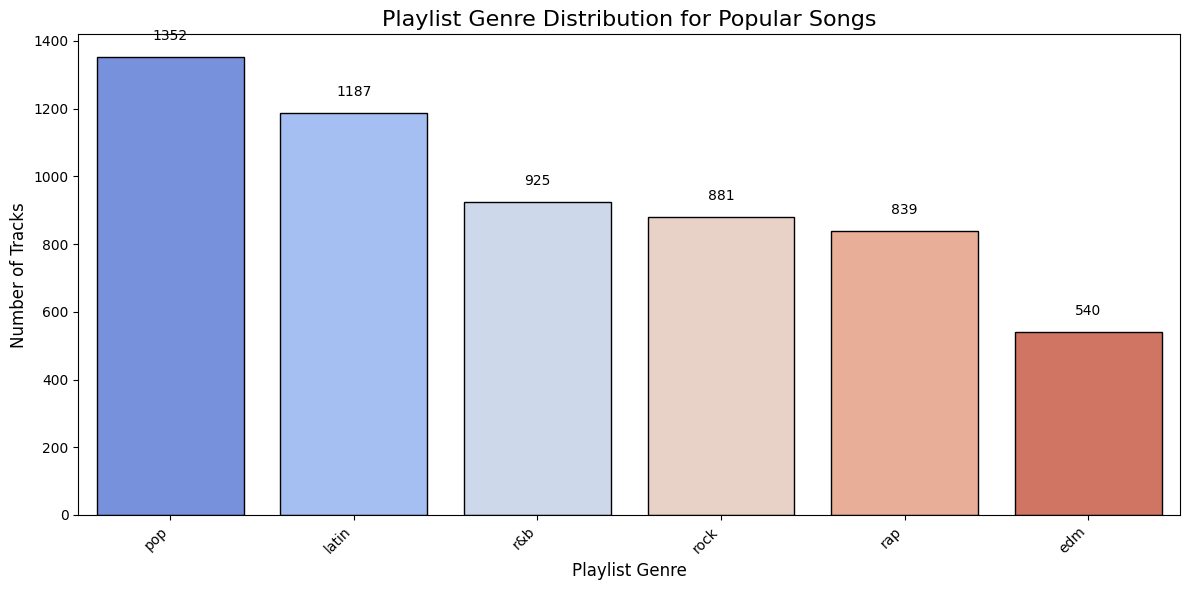

In [ ]:
# Popular playlist genre distribution

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Count the occurrences of each genre in the popular songs dataset
genre_counts = popular_songs['playlist_genre'].value_counts()

# Plot the distribution of playlist genres for popular songs
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm', edgecolor='black')

# Add numbers on each bar
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 50,  # Adjust the height to position the text correctly
        f'{int(bar.get_height())}',
        ha='center', fontsize=10
    )

# Add title, labels, and adjust layout
plt.title('Playlist Genre Distribution for Popular Songs', fontsize=16)
plt.xlabel('Playlist Genre', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

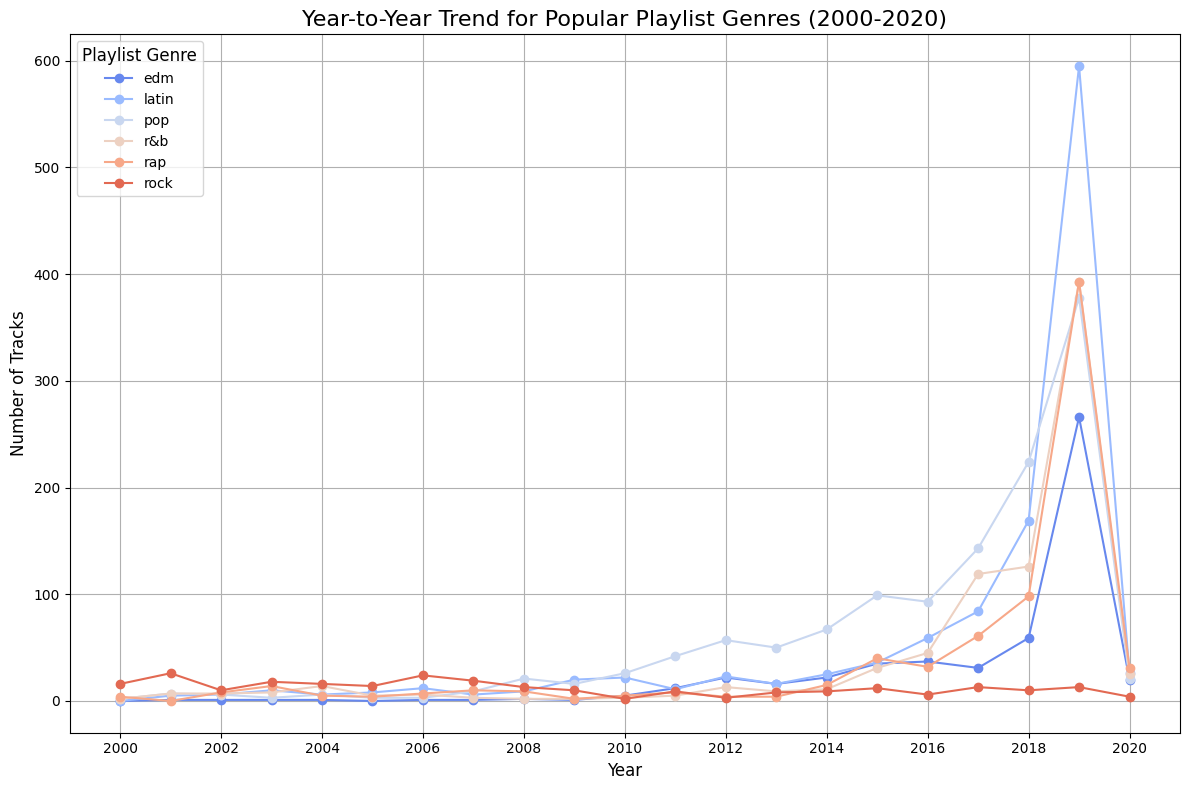

In [ ]:
# Popular playlist genre trend (2000-2020)

# Ensure release_year is coerced to numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Filter the data for popular songs (popular = 1) and years between 2000 and 2020
popular_songs_filtered = df1[(df1['release_year'] >= 2000) & (df1['release_year'] <= 2020) & (df1['popular'] == 1)]

# Group data by 'release_year' and 'playlist_genre' to count occurrences
genre_trend = popular_songs_filtered.groupby(['release_year', 'playlist_genre']).size().unstack(fill_value=0)

# Plot year-to-year trends for each genre
plt.figure(figsize=(12, 8))

# Use the coolwarm palette for the line colors
sns.set_palette('coolwarm')

for genre in genre_trend.columns:
    plt.plot(genre_trend.index, genre_trend[genre], label=genre, marker='o')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Popular Playlist Genres (2000-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.legend(title="Playlist Genre", fontsize=10, title_fontsize=12)

# Ensure x-axis shows only integer years
plt.xticks(ticks=np.arange(2000, 2021, 2), labels=np.arange(2000, 2021, 2), fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular danceability**: The danceability of popular songs aligns with the general music trend, mostly around 0.7, indicating a rhythmically engaging beat. The trend shows an increase in danceability over time, especially in the modern music landscape, highlighting a growing focus on creating danceable music.

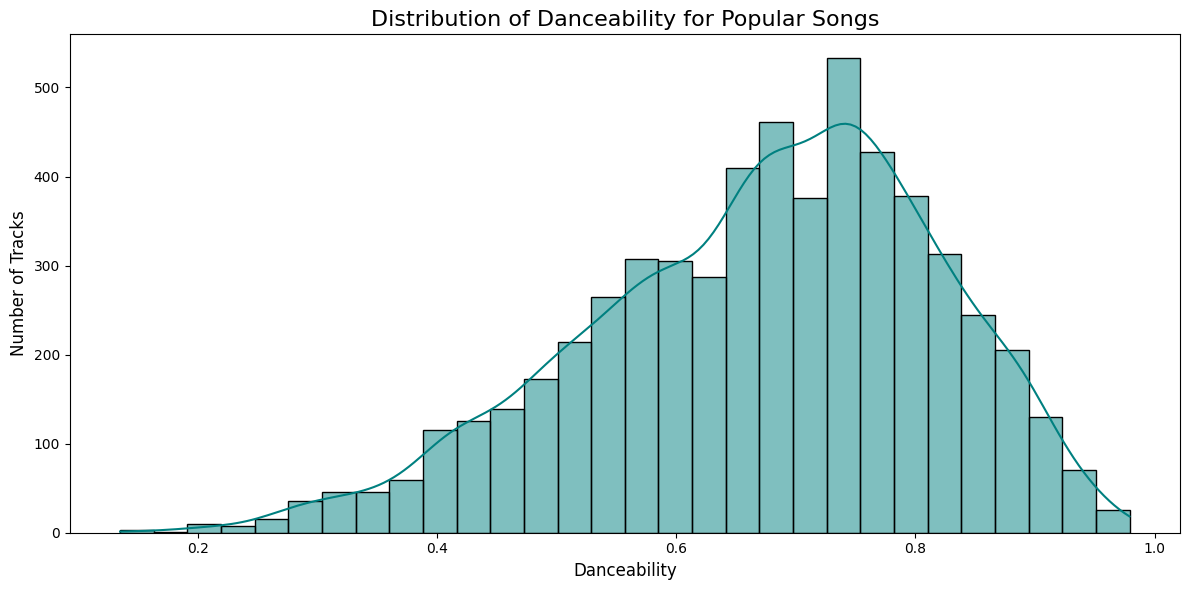

In [ ]:
# Popular danceability

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Plot the distribution of 'danceability' for popular songs
plt.figure(figsize=(12, 6))
sns.histplot(popular_songs['danceability'], bins=30, kde=True, color='teal', edgecolor='black')
plt.title('Distribution of Danceability for Popular Songs', fontsize=16)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

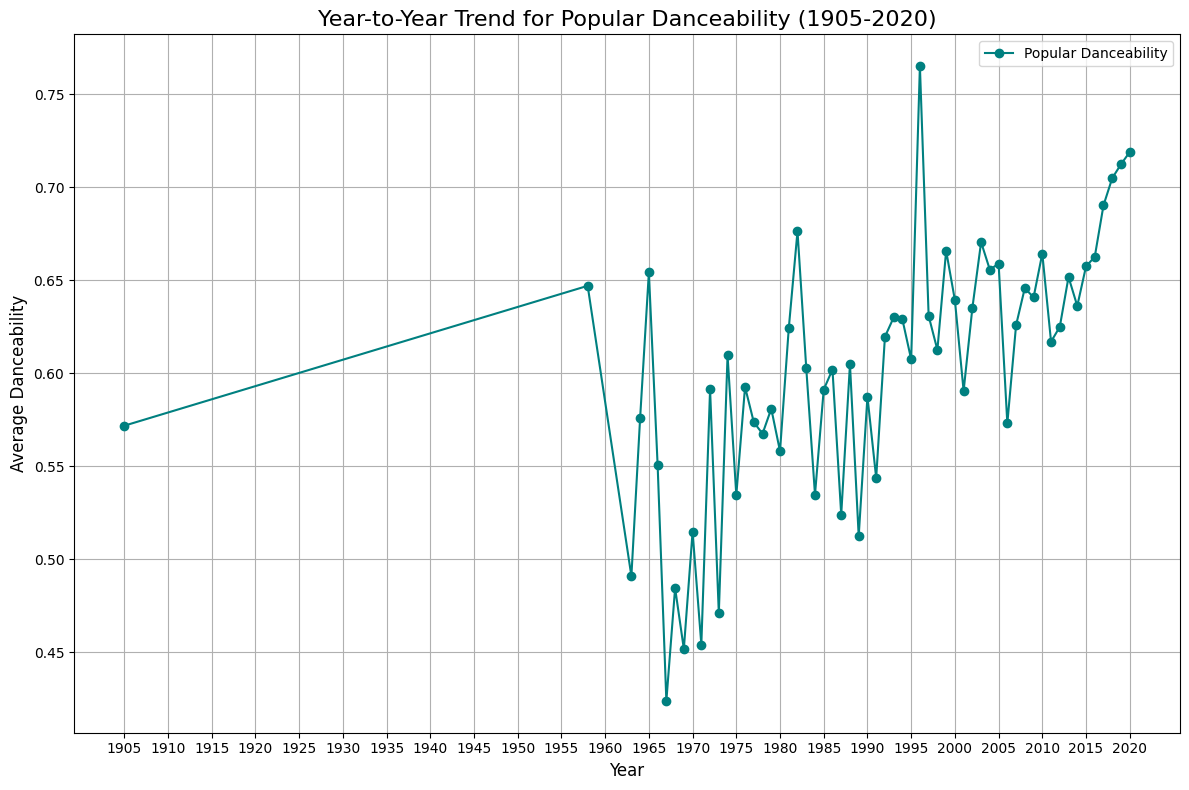

In [ ]:
# Popular danceability trend (1905-2020)

# Ensure release_year is coerced to numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Filter the dataset for popular songs (popular = 1)
popular_songs_filtered = df1[df1['popular'] == 1]

# Group data by 'release_year' and calculate the mean danceability for each year
danceability_trend_full = popular_songs_filtered.groupby('release_year')['danceability'].mean()

# Plot year-to-year trend for popular danceability
plt.figure(figsize=(12, 8))
plt.plot(danceability_trend_full.index, danceability_trend_full.values, marker='o', color='teal', label='Popular Danceability')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Popular Danceability (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Danceability", fontsize=12)

# Adjust x-axis to show only integers and set tick frequency
plt.xticks(ticks=range(int(danceability_trend_full.index.min()), int(danceability_trend_full.index.max()) + 1, 5),
           labels=range(int(danceability_trend_full.index.min()), int(danceability_trend_full.index.max()) + 1, 5),
           fontsize=10)

plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular Energy**: The graph shows that popular songs are more concentrated around 0.7 while the overarching tendency was widely spreaded out across largely 0.6 to 0.9. Throughout the years in Spotify history, the popualr songs have maintained the enrgy level of around 0.7.

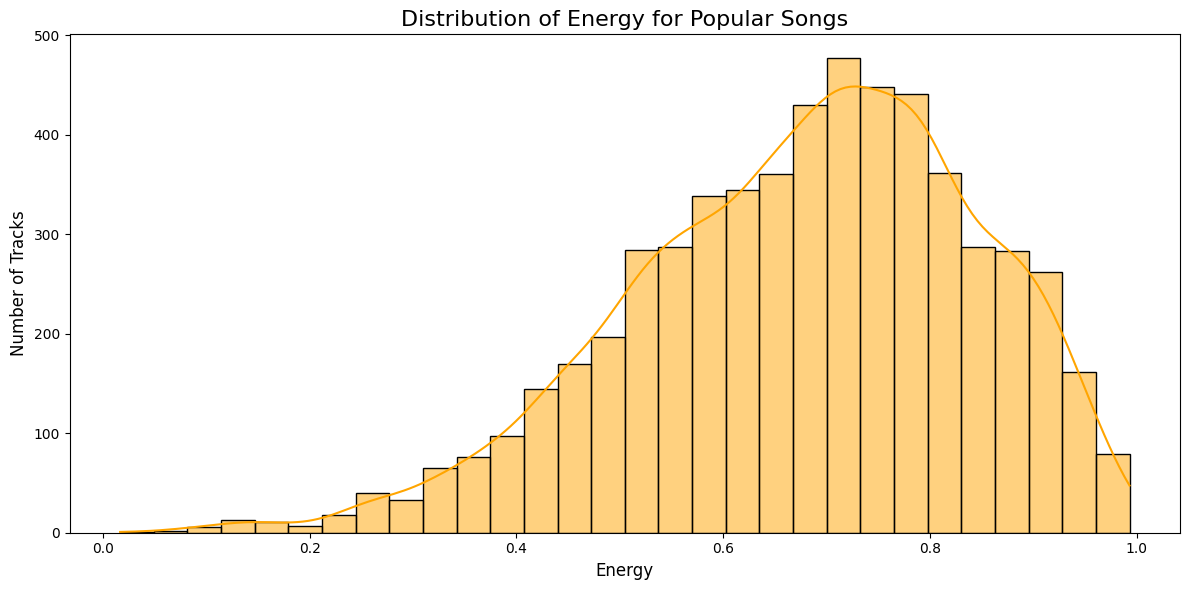

In [ ]:
# Popular energy distribution

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Plot the distribution of 'energy' for popular songs
plt.figure(figsize=(12, 6))
sns.histplot(popular_songs['energy'], bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Energy for Popular Songs', fontsize=16)
plt.xlabel('Energy', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-34-d59ea58fd5a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_songs['release_year'] = pd.to_numeric(popular_songs['release_year'], errors='coerce')


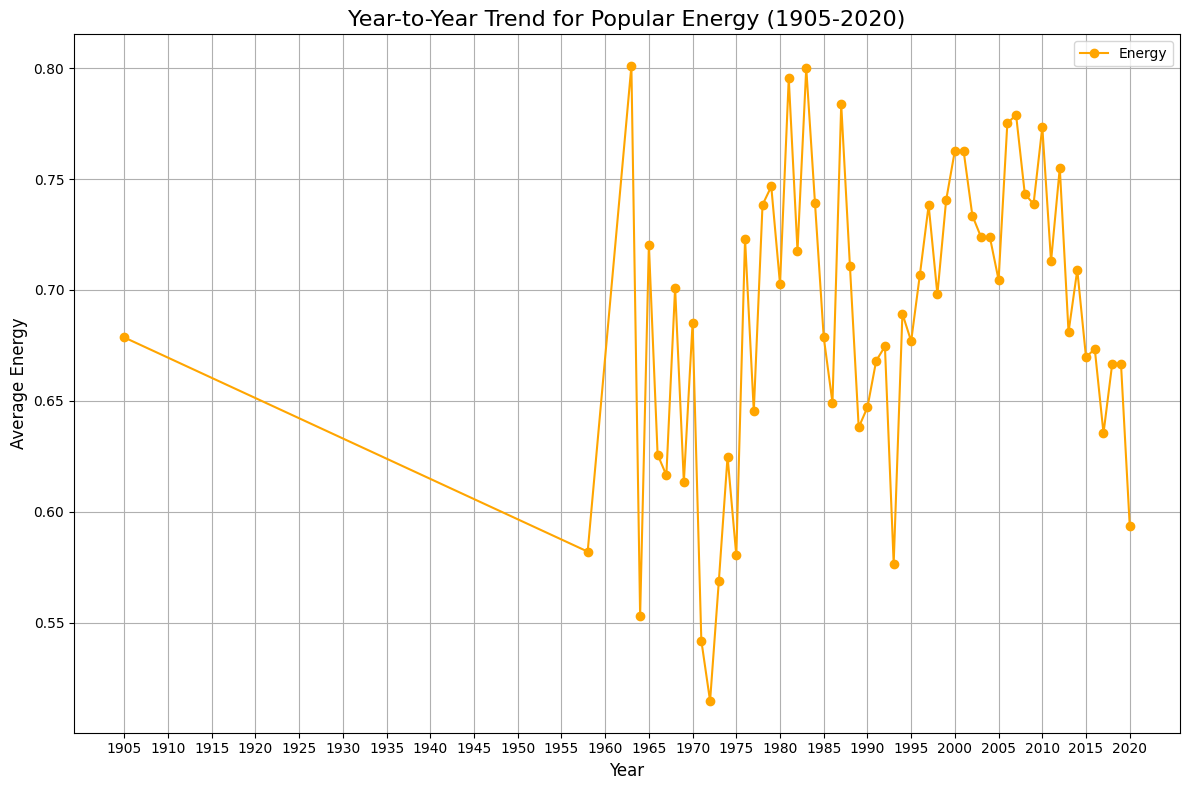

In [ ]:
# Popular Energy trend (1905-2020)

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Ensure release_year is coerced to numeric
popular_songs['release_year'] = pd.to_numeric(popular_songs['release_year'], errors='coerce')

# Group data by 'release_year' and calculate the mean energy for each year for popular songs
energy_trend_popular = popular_songs.groupby('release_year')['energy'].mean()

# Plot year-to-year trend for energy (popular songs)
plt.figure(figsize=(12, 8))
plt.plot(energy_trend_popular.index, energy_trend_popular.values, marker='o', color='orange', label='Energy')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Popular Energy (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Energy", fontsize=12)

# Adjust x-axis to show only integers with 5-year intervals
plt.xticks(ticks=range(int(energy_trend_popular.index.min()), int(energy_trend_popular.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular key**: The key distribution for popular songs shows that the top three keys are Db/C#, C, and G. This aligns with the observed trends in playlist genres, danceability, and energy. Db Major, known for its depth and sophistication, complements expressive and introspective tracks. C Major, with its clarity and versatility, is well-suited to mainstream genres like pop and EDM. G Major, with its uplifting and resonant qualities, corresponds to the high energy (0.6–0.8) and danceability (0.6–0.8) trends, supporting the vibrant nature of genres like EDM, Latin, and rap.

<ipython-input-228-12650b008e92>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=key_labels, y=key_counts.values, palette='dark:red', edgecolor='black')


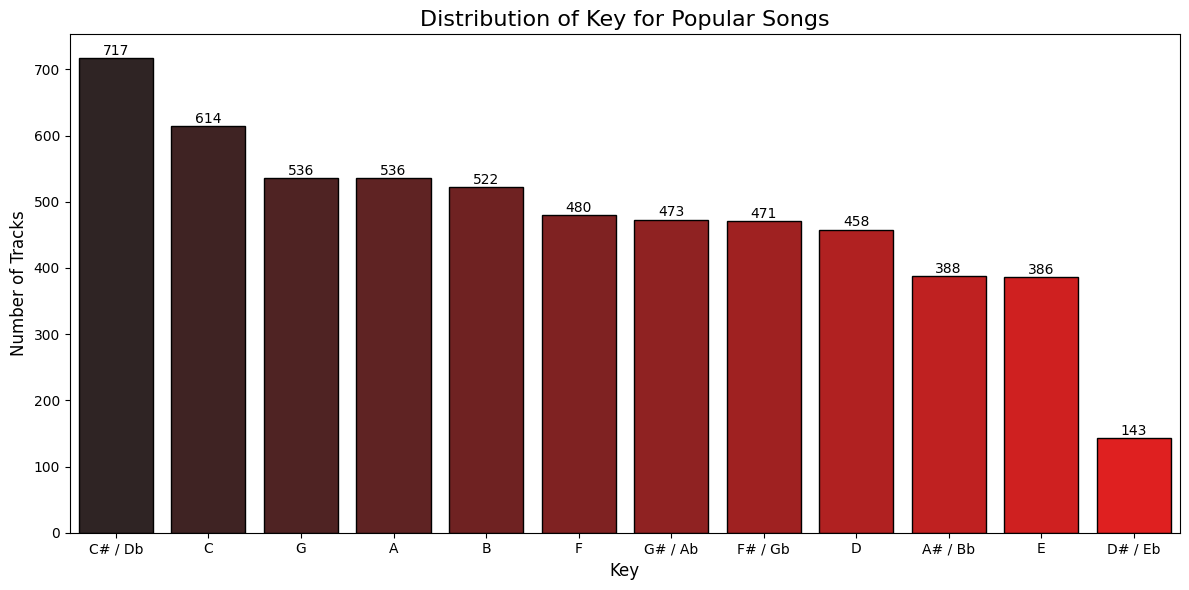

In [ ]:
# Popular key distribution

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Define the key reverse mapping
key_reverse_mapping = {
    0: 'C', 1: 'C# / Db', 2: 'D', 3: 'D# / Eb', 4: 'E',
    5: 'F', 6: 'F# / Gb', 7: 'G', 8: 'G# / Ab', 9: 'A',
    10: 'A# / Bb', 11: 'B'
}

# Count the occurrences of each key in the popular songs dataset and sort in descending order
key_counts = popular_songs['key'].value_counts().sort_values(ascending=False)

# Map the numerical keys to their respective names using the reverse mapping
key_labels = [key_reverse_mapping[i] for i in key_counts.index]

# Plot the distribution of 'key' for popular songs
plt.figure(figsize=(12, 6))
sns.barplot(x=key_labels, y=key_counts.values, palette='dark:red', edgecolor='black')

# Add numbers on each bar
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,  # Slightly above the bar
        f'{int(bar.get_height())}',  # Display the count
        ha='center', fontsize=10, color='black'
    )

plt.title('Distribution of Key for Popular Songs', fontsize=16)
plt.xlabel('Key', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

- **Popular loudness**: The loudness of popular songs closely aligns with the overall trend on Spotify. However, popular songs tend to exhibit a stronger concentration around -5 dB, reflecting the dominance of high-energy, danceable genres like EDM, pop, and rap. This consistency in volume levels may also be attributed to industry standards and the mastering process, where tracks are optimized to be loud enough without distortion or clipping. As a result, most tracks fall within this range to ensure consistent sound quality across various listening environments, whether on streaming platforms, radios, or headphones.

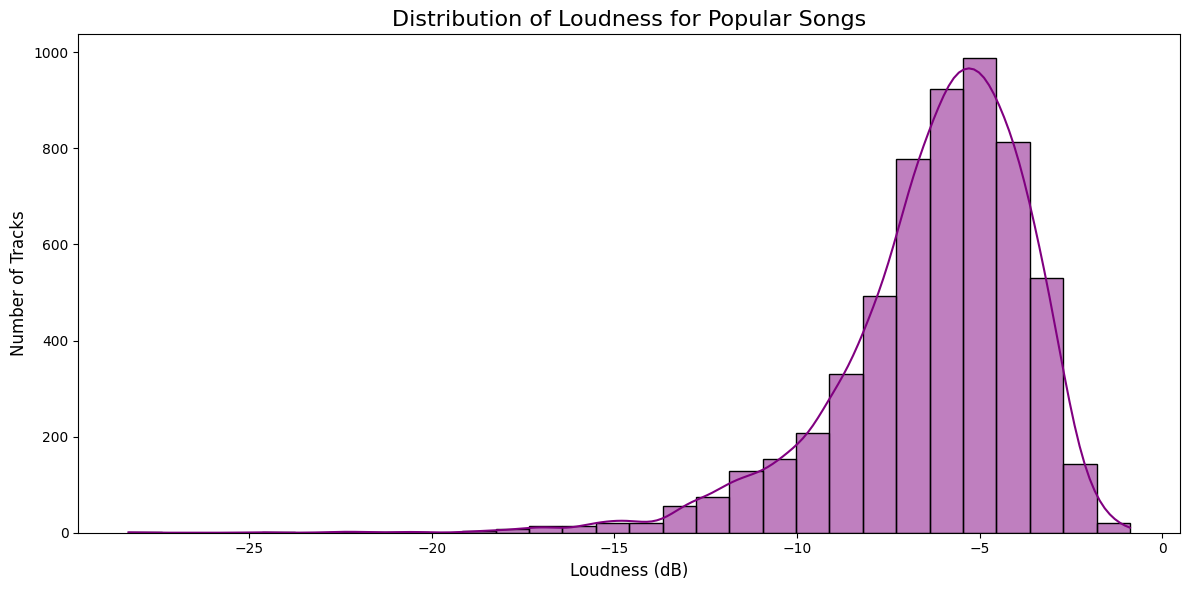

In [ ]:
# Popular loudness distribution

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Plot the distribution of 'loudness' for popular songs
plt.figure(figsize=(12, 6))
sns.histplot(popular_songs['loudness'], bins=30, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Loudness for Popular Songs', fontsize=16)
plt.xlabel('Loudness (dB)', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

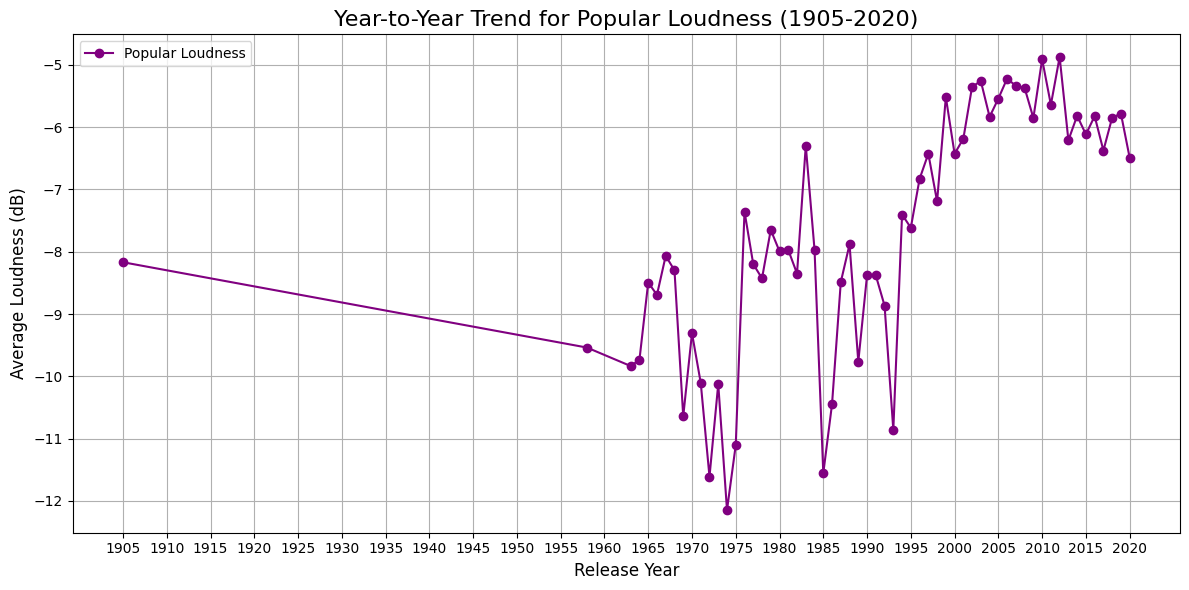

In [ ]:
# Popular loudness trend (1905-2020)

# Ensure 'release_year' is numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Filter the dataset for popular songs (popular = 1) and years between 1905 and 2020
popular_songs_filtered = df1[(df1['release_year'] >= 1905) & (df1['release_year'] <= 2020) & (df1['popular'] == 1)]

# Group data by 'release_year' and calculate the mean loudness for each year
loudness_trend = popular_songs_filtered.groupby('release_year')['loudness'].mean()

# Plot the trend for popular songs' loudness over the years
plt.figure(figsize=(12, 6))
plt.plot(loudness_trend.index, loudness_trend.values, marker='o', color='purple', label='Popular Loudness')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Popular Loudness (1905-2020)", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Loudness (dB)", fontsize=12)

# Set the x-axis ticks to be integers
plt.xticks(ticks=np.arange(int(loudness_trend.index.min()), int(loudness_trend.index.max()) + 1, 5),
           labels=np.arange(int(loudness_trend.index.min()), int(loudness_trend.index.max()) + 1, 5), fontsize=10)

plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular mode**: Most popular songs are in the major mode (58%), likely due to the dominance of energetic and uplifting genres like EDM and pop in the dataset. These genres, known for their positive and high-energy sound, often align with major mode characteristics. While danceability, energy, and loudness contribute to the overall feel of a track, they have less direct influence on the choice of mode.

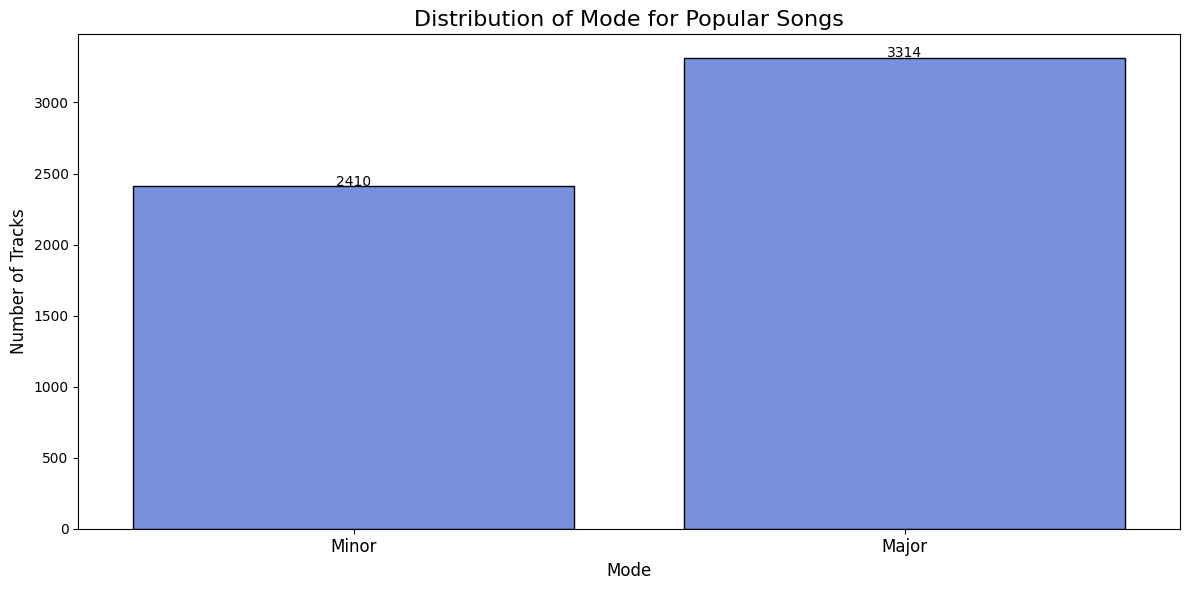

In [ ]:
# Popular mode distribution

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Plot the distribution of 'mode' for popular songs
plt.figure(figsize=(12, 6))
sns.countplot(x='mode', data=popular_songs, edgecolor='black')

# Add numbers on each bar
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,  # Slightly above the bar
        f'{int(bar.get_height())}',  # Display the count
        ha='center', fontsize=10, color='black'
    )

# Replace x-axis numbers with labels 'Minor' and 'Major'
plt.xticks([0, 1], ['Minor', 'Major'], fontsize=12)

plt.title('Distribution of Mode for Popular Songs', fontsize=16)
plt.xlabel('Mode', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

- **Popular speechiness**: The distribution is heavily skewed toward low speechiness values, reflecting the dominance of traditional music tracks in Spotify's catalog. Most tracks have speechiness values below 0.33, indicating they primarily consist of music with minimal speech-like elements. Very few tracks exceed 0.66, representing purely spoken-word recordings such as audiobooks, podcasts, or poetry readings.

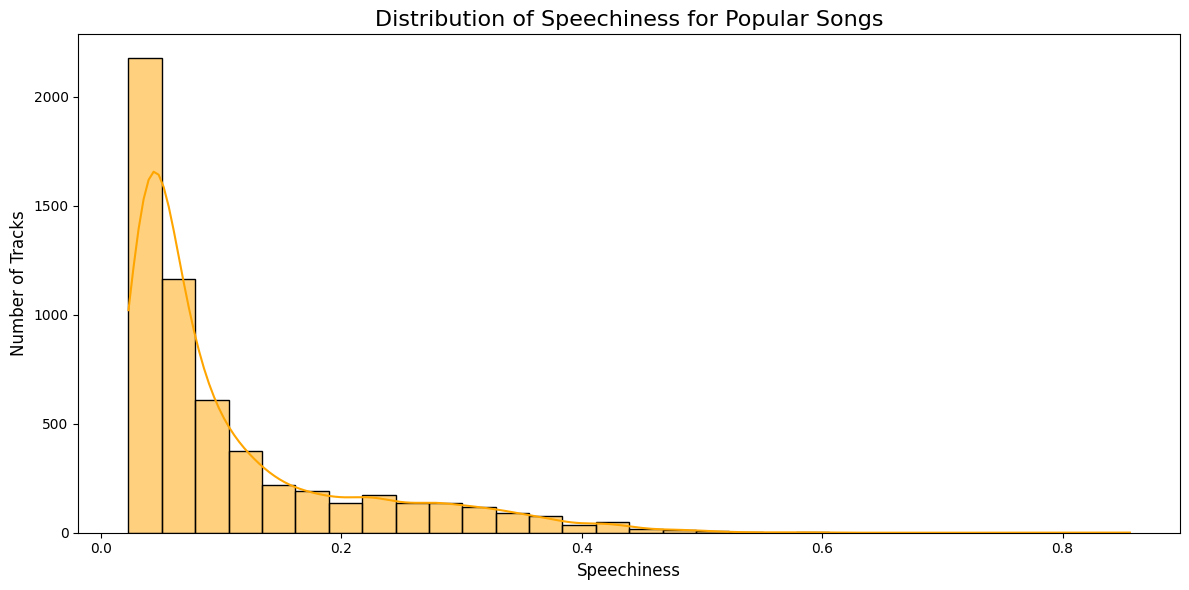

In [ ]:
# Popular speechiness distribution

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Plot the distribution of 'speechiness' for popular songs
plt.figure(figsize=(12, 6))
sns.histplot(popular_songs['speechiness'], kde=True, color='orange', bins=30, edgecolor='black')

# Add title and labels
plt.title('Distribution of Speechiness for Popular Songs', fontsize=16)
plt.xlabel('Speechiness', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

plt.tight_layout()
plt.show()

- **Popular acousticnes**: The acousticness of popular songs follows a similar trend to the overall dataset. The majority of tracks have acousticness values close to 0.0, indicating that most popular songs are primarily non-acoustic. From 2015 to 2020, there is a slight increase in acousticness, peaking at around 0.25, though the change remains modest. This trend is consistent with other factors such as playlist genres, danceability, and energy, which tend to prioritize high-energy, rhythmic, and electronically produced tracks over acoustic elements.

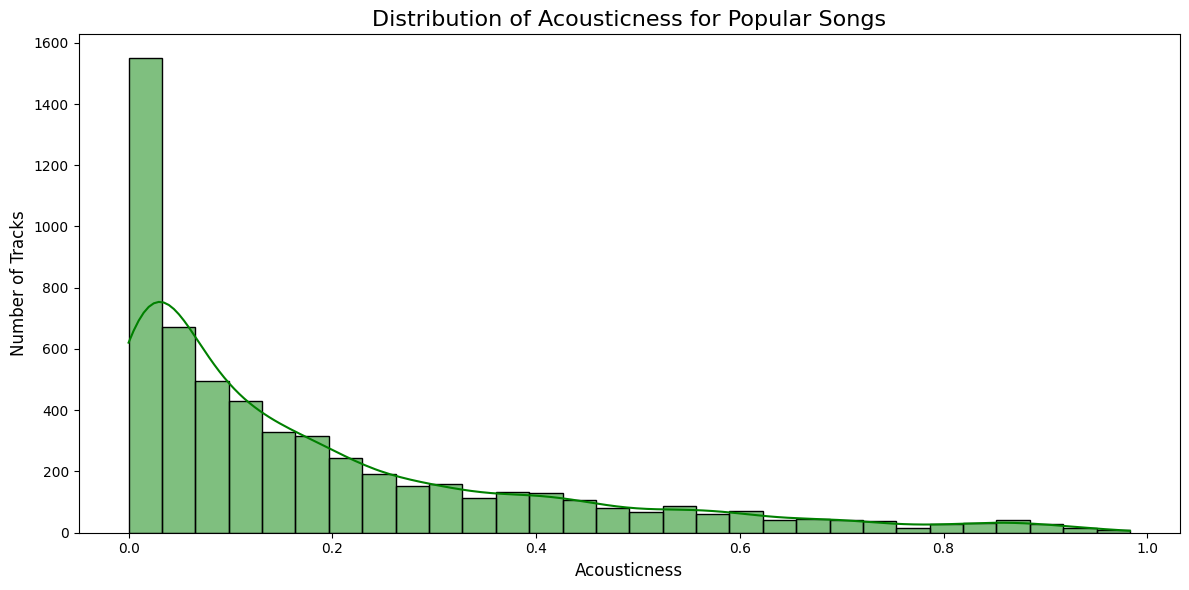

In [ ]:
# Poular acousticness distribution

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Plot the distribution of 'acousticness' for popular songs
plt.figure(figsize=(12, 6))
sns.histplot(popular_songs['acousticness'], kde=True, color='green', bins=30, edgecolor='black')

# Add title and labels
plt.title('Distribution of Acousticness for Popular Songs', fontsize=16)
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

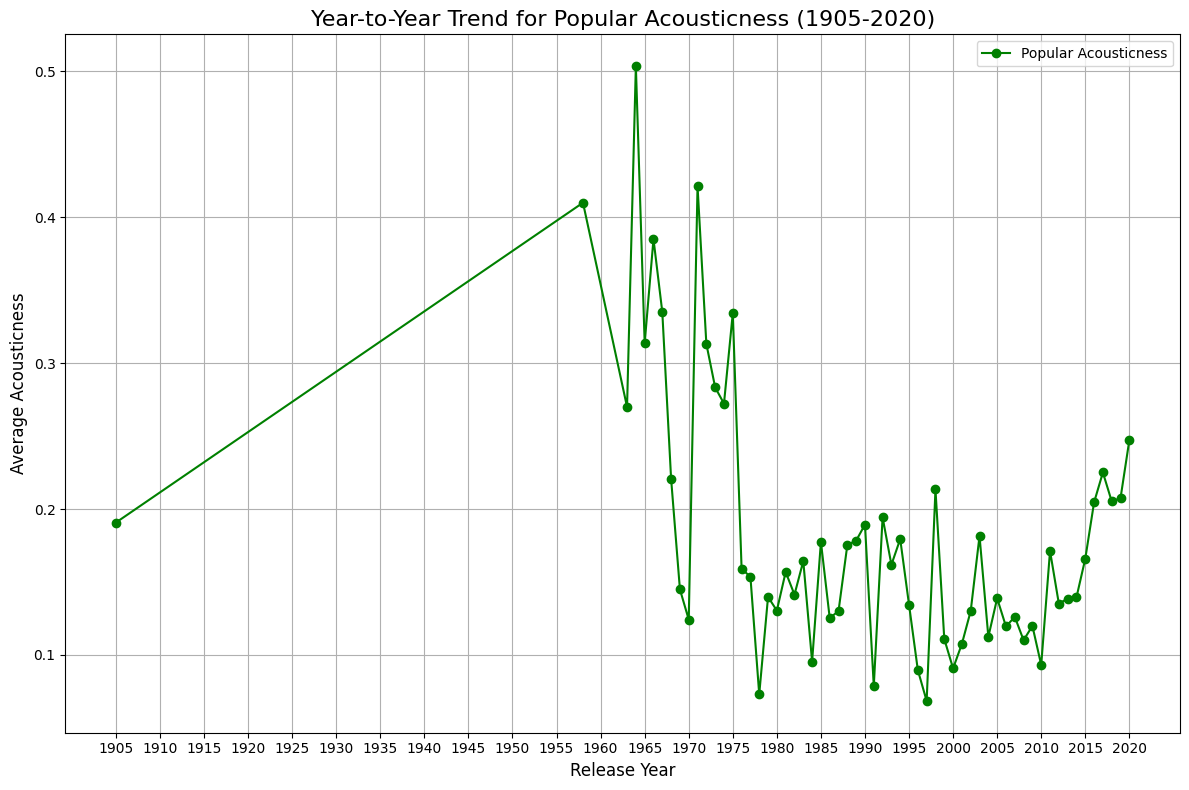

In [ ]:
# Popular acousticness trend (1905-2020)

# Ensure release_year is coerced to numeric
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Group data by 'release_year' and calculate the mean acousticness for each year
acousticness_trend = popular_songs.groupby('release_year')['acousticness'].mean()

# Plot the year-to-year trend for popular acousticness
plt.figure(figsize=(12, 8))
plt.plot(acousticness_trend.index, acousticness_trend.values, marker='o', color='green', label='Popular Acousticness')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Popular Acousticness (1905-2020)", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Acousticness", fontsize=12)

# Set the x-axis ticks to be integers
plt.xticks(ticks=range(int(acousticness_trend.index.min()), int(acousticness_trend.index.max()) + 1, 5), fontsize=10)

plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular instrumentalness**: The high concentration near 0.0 suggests that most tracks in the dataset include prominent vocal content, such as singing, rap, or spoken word.

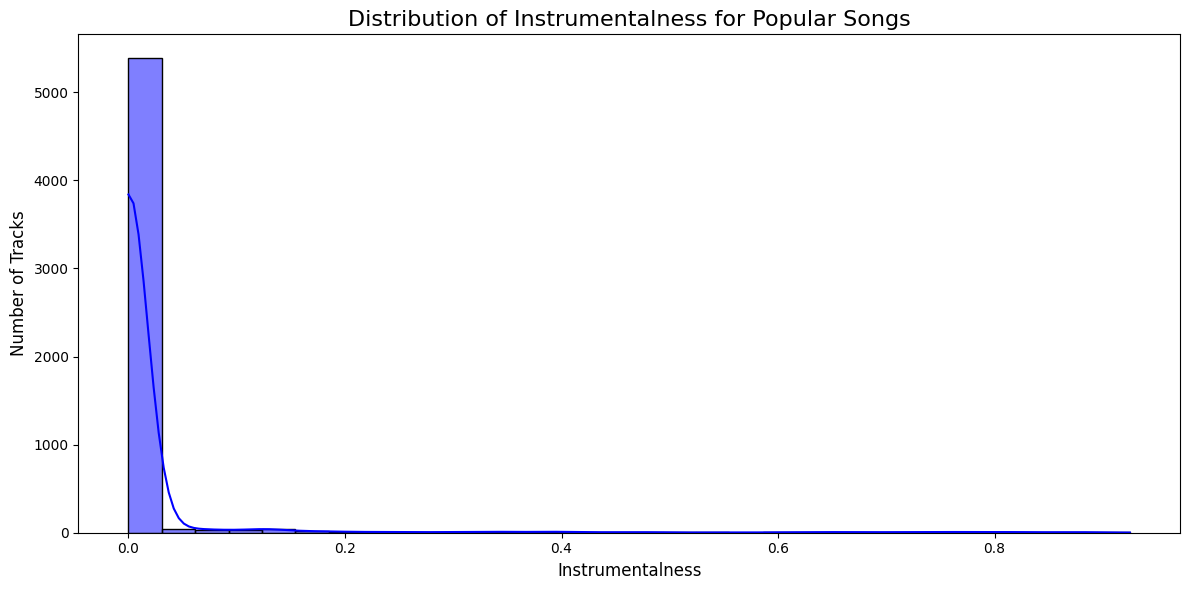

In [ ]:
# Popular instrumentalness distribution

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Plot the distribution of 'instrumentalness' for popular songs
plt.figure(figsize=(12, 6))
sns.histplot(popular_songs['instrumentalness'], kde=True, color='blue', bins=30, edgecolor='black')

# Add title and labels
plt.title('Distribution of Instrumentalness for Popular Songs', fontsize=16)
plt.xlabel('Instrumentalness', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

- **Popular liveness**: The distribution of liveness for popular songs is heavily concentrated at lower values, especially around 0.1, indicating that most tracks are studio recordings with little to no audience or live elements. In recent years, however, the trend has shown increased fluctuation in liveness. Over the last five years, the liveness of popular songs has consistently decreased, reinforcing the dominance of studio-produced tracks.



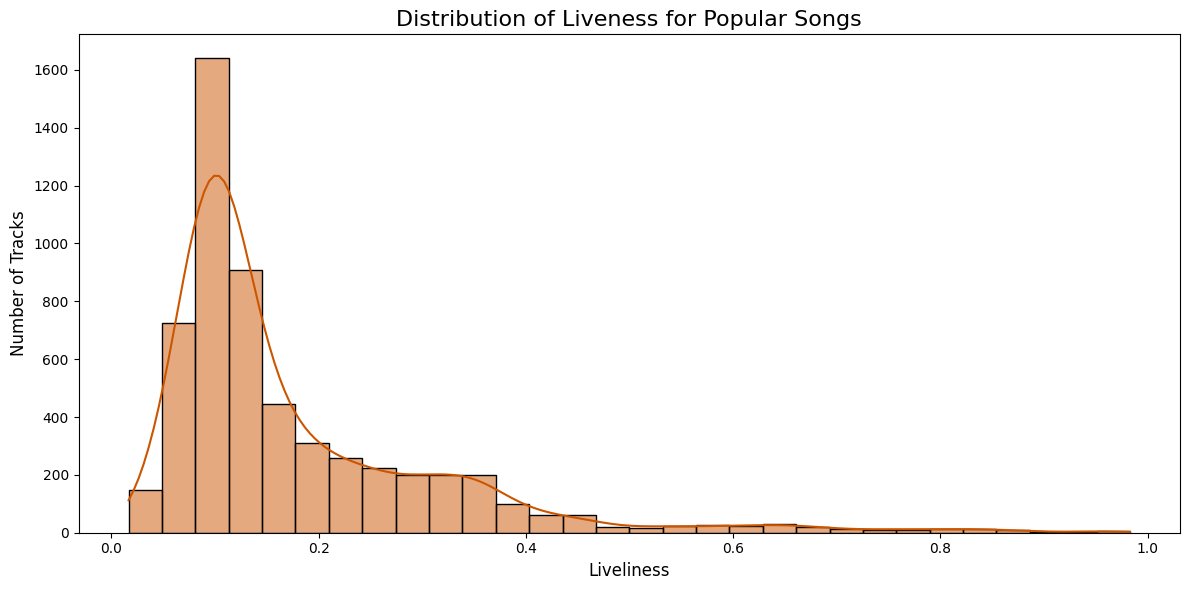

In [ ]:
# Popular liveness distribution

# Filter the dataset for successful songs (assuming 'successful' is defined as popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Plot the distribution of 'liveliness' for popular songs
plt.figure(figsize=(12, 6))
sns.histplot(popular_songs['liveness'], kde=True, color='#CC5500', bins=30, edgecolor='black')

# Add title and labels
plt.title('Distribution of Liveness for Popular Songs', fontsize=16)
plt.xlabel('Liveliness', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

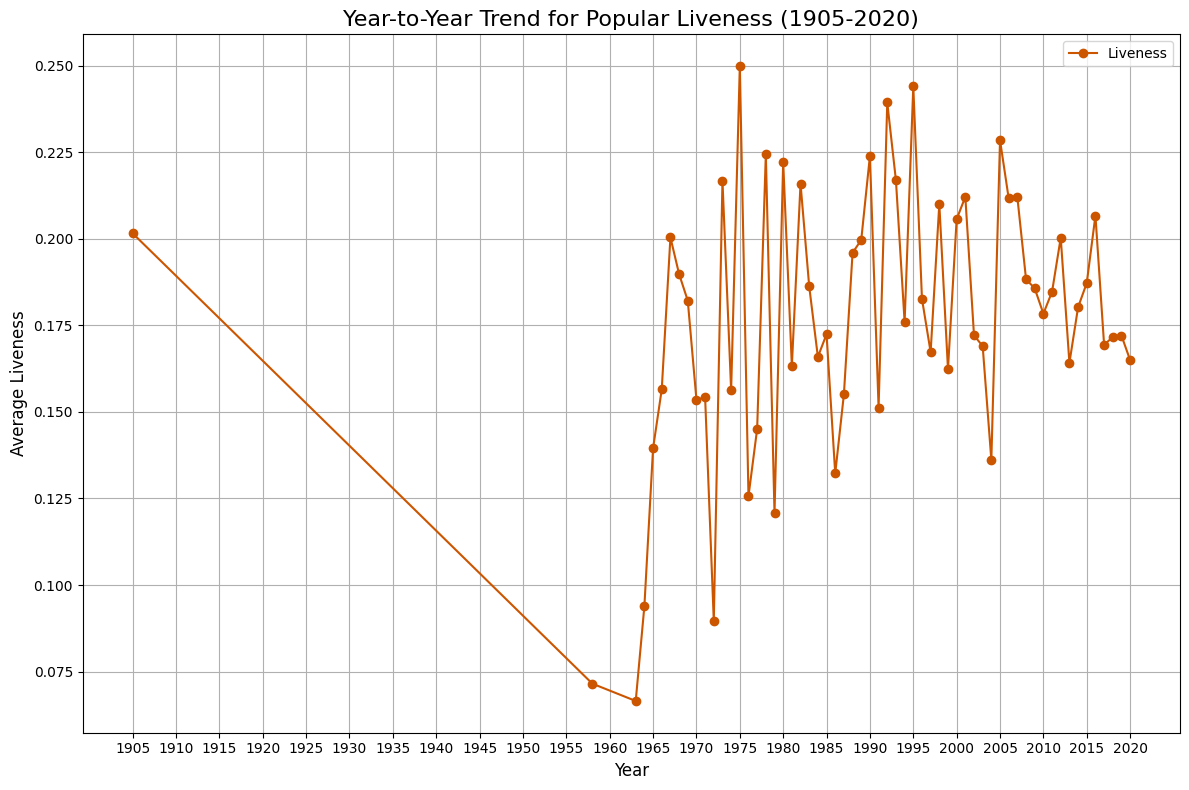

In [ ]:
# Popular liveness trend (1905-2020)

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Group data by 'release_year' and calculate the mean liveliness for each year
liveness_trend_full = popular_songs.groupby('release_year')['liveness'].mean()

# Plot year-to-year trend for liveness
plt.figure(figsize=(12, 8))
plt.plot(liveness_trend_full.index, liveness_trend_full.values, marker='o', color='#CC5500', label='Liveness')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Popular Liveness (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Liveness", fontsize=12)

# Adjust x-axis to show only integers with 5-year intervals
plt.xticks(ticks=range(int(liveness_trend_full.index.min()), int(liveness_trend_full.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular valence**:  Unlike the overall trend, popular songs tend to be slightly more concentrated in the range of neutral to more positive songs. Similarly, the year-to-year trend for the last five years has remained relatively stable with a generally neutral or slightly positive emotional tone and valence values consistently range between 0.45 and 0.53.

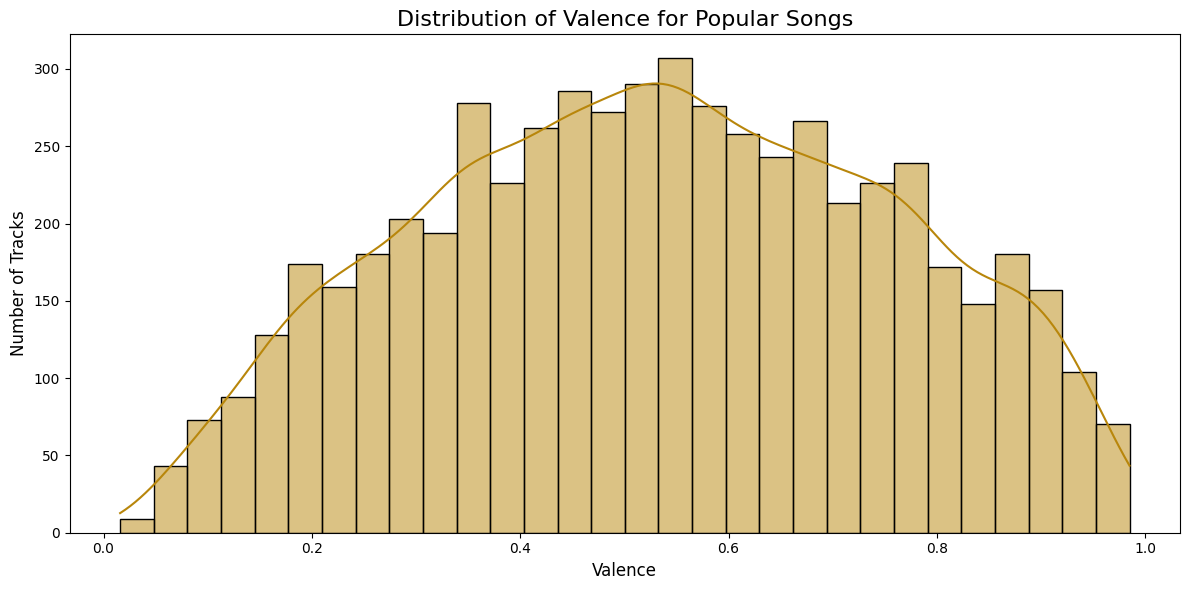

In [ ]:
# Popular valence distribution

# Filter the dataset for successful songs (assuming 'successful' is defined as popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Plot the distribution of 'valence' for popular songs
plt.figure(figsize=(12, 6))
sns.histplot(popular_songs['valence'], kde=True, color='#B8860B', bins=30, edgecolor='black')

# Add title and labels
plt.title('Distribution of Valence for Popular Songs', fontsize=16)
plt.xlabel('Valence', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

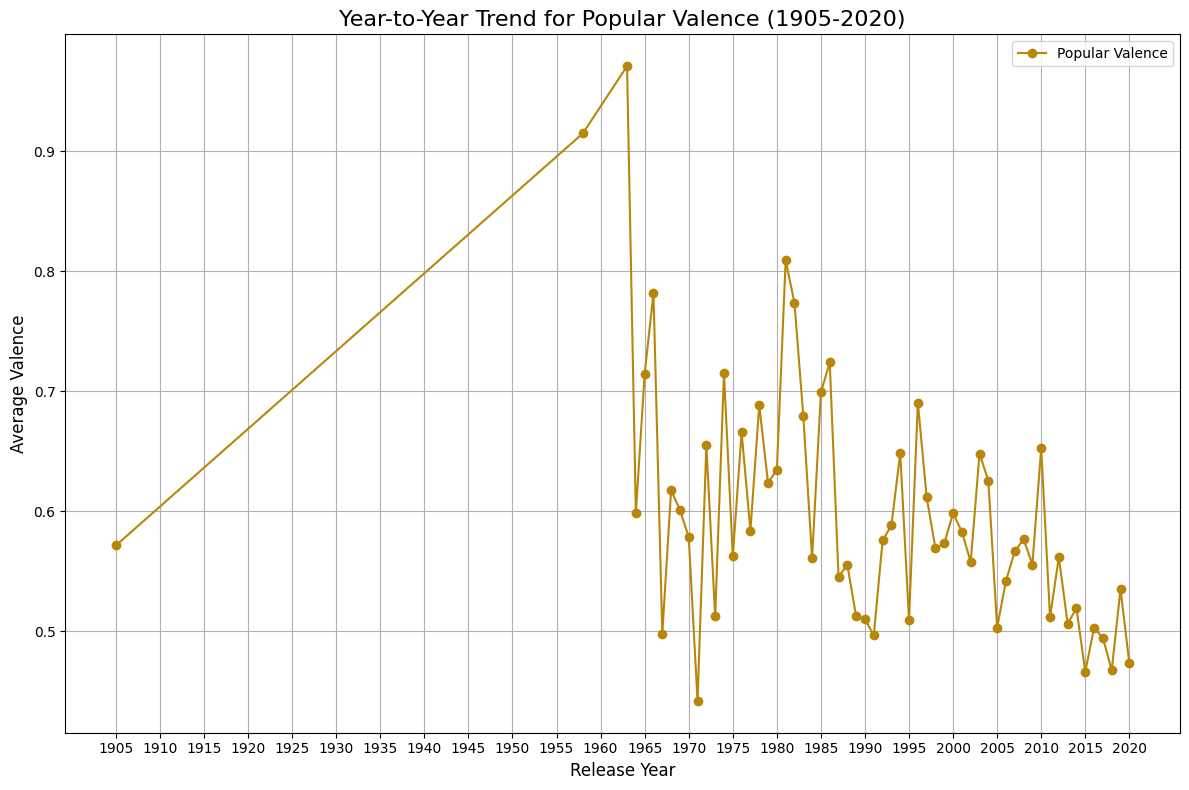

In [ ]:
# Popular valence trend (1905-2020)

# Filter the dataset for successful songs (assuming 'successful' is defined as popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Group data by 'release_year' and calculate the mean valence for each year
valence_trend_full = popular_songs.groupby('release_year')['valence'].mean()

# Plot the trend for popular songs' valence over the years
plt.figure(figsize=(12, 8))
plt.plot(valence_trend_full.index, valence_trend_full.values, marker='o', color='#B8860B', label='Popular Valence')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Popular Valence (1905-2020)", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Valence", fontsize=12)

# Adjust x-axis to show only integers with 5-year intervals
plt.xticks(ticks=range(int(valence_trend_full.index.min()), int(valence_trend_full.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular tempo**: The tempo of popular songs is mostly concentrated around 95 to 130 BPM, which represents the most common tempo for successful tracks. In the past five years, there has been a slight shift towards a higher tempo, with tracks aiming for a range closer to 120 BPM. This trend reflects the increasing emphasis on more upbeat and energetic rhythms in modern popular music.

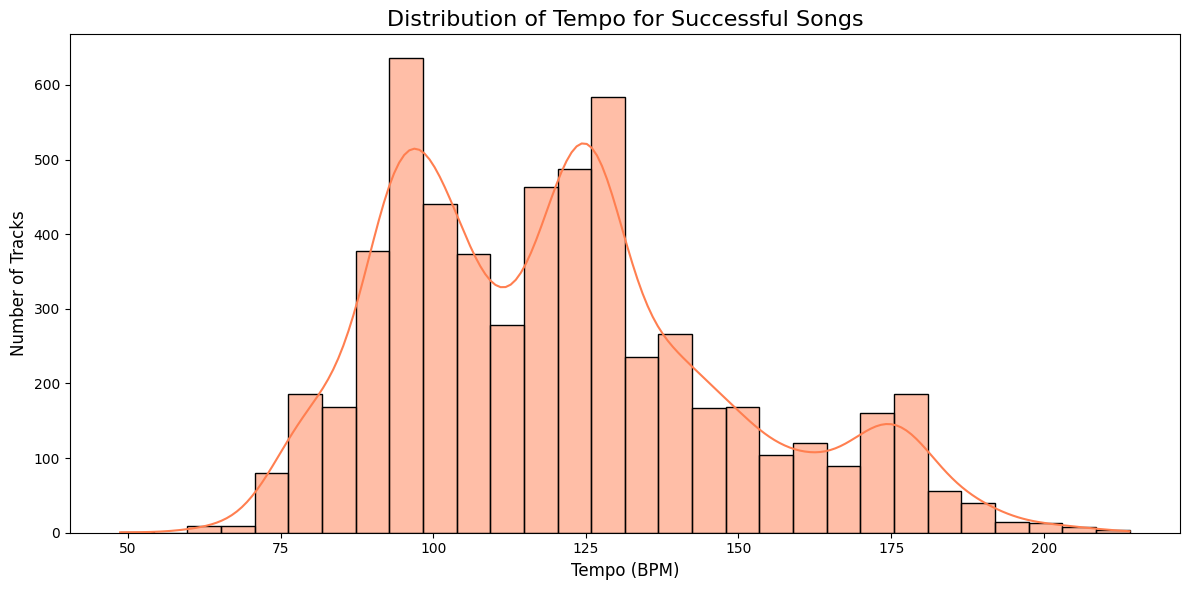

In [ ]:
# Popular tempo distribution

# Filter the dataset for successful songs (assuming 'successful' is defined as popular = 1)
successful_songs = df1[df1['popular'] == 1]

# Distribution for successful tempo (color='coral')
plt.figure(figsize=(12, 6))
sns.histplot(successful_songs['tempo'], kde=True, color='coral', bins=30, edgecolor='black')

# Add title and labels
plt.title('Distribution of Tempo for Successful Songs', fontsize=16)
plt.xlabel('Tempo (BPM)', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

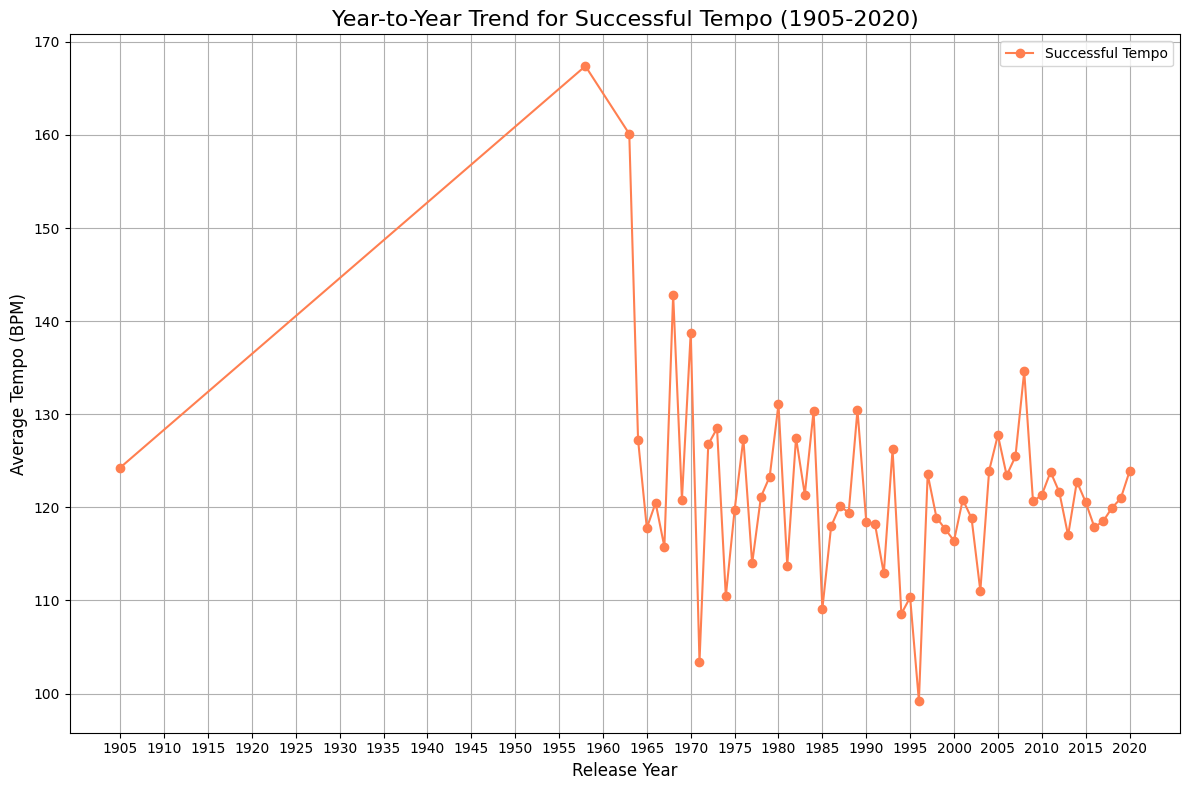

In [ ]:
# Popular tempo trend (1905-2020)

# Filter the dataset for successful songs (assuming 'successful' is defined as popular = 1)
successful_songs = df1[df1['popular'] == 1]

# Group data by 'release_year' and calculate the mean tempo for each year
tempo_trend_full = successful_songs.groupby('release_year')['tempo'].mean()

# Plot the trend for successful songs' tempo over the years
plt.figure(figsize=(12, 8))
plt.plot(tempo_trend_full.index, tempo_trend_full.values, marker='o', color='coral', label='Successful Tempo')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Successful Tempo (1905-2020)", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Tempo (BPM)", fontsize=12)

# Adjust x-axis to show only integers with 5-year intervals
plt.xticks(ticks=range(int(tempo_trend_full.index.min()), int(tempo_trend_full.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Popular duration time**: The trend for popular songs' duration is almost identical to the overall music trend, with most tracks revolving around 200,000 milliseconds (3 minutes and 20 seconds). The trend throughout musical history shows a steady decline in track durations since 2016, reflecting a broader shift in modern media consumption, where shorter content is prioritized to capture attention quickly in a highly competitive digital environment, contrasting with traditional radio and streaming norms.

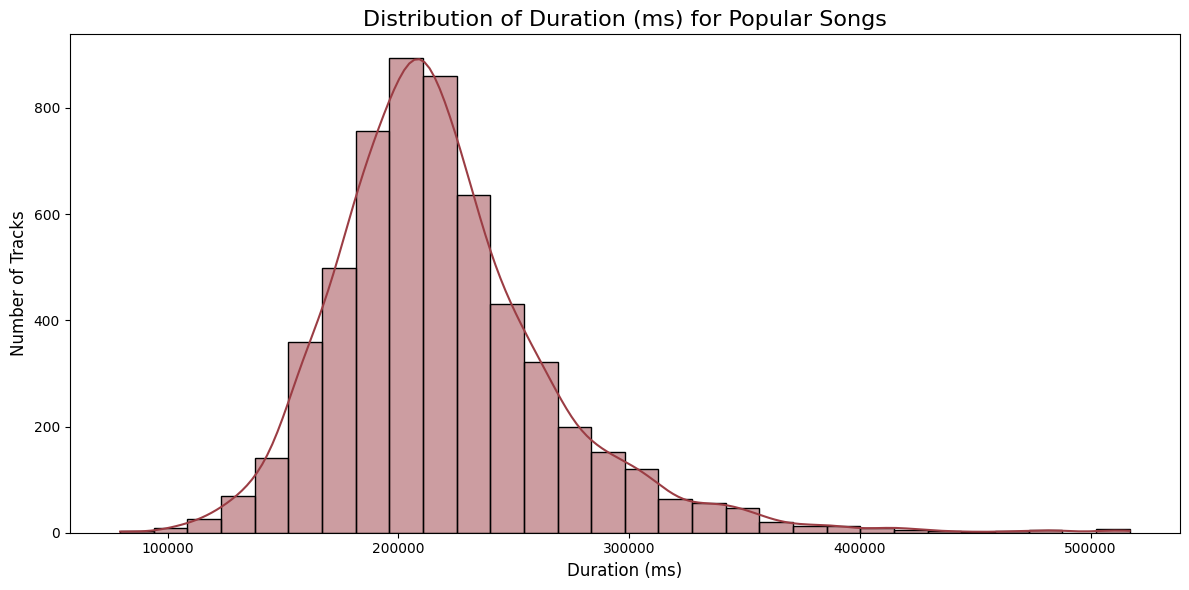

In [ ]:
# Popular duration time distribution

# Ensure that the 'popular' column is present and filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Popular duration_ms distribution (color='#9b3d44')
plt.figure(figsize=(12, 6))
sns.histplot(popular_songs['duration_ms'], kde=True, color='#9b3d44', bins=30, edgecolor='black')

# Add title and labels
plt.title('Distribution of Duration (ms) for Popular Songs', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.tight_layout()
plt.show()

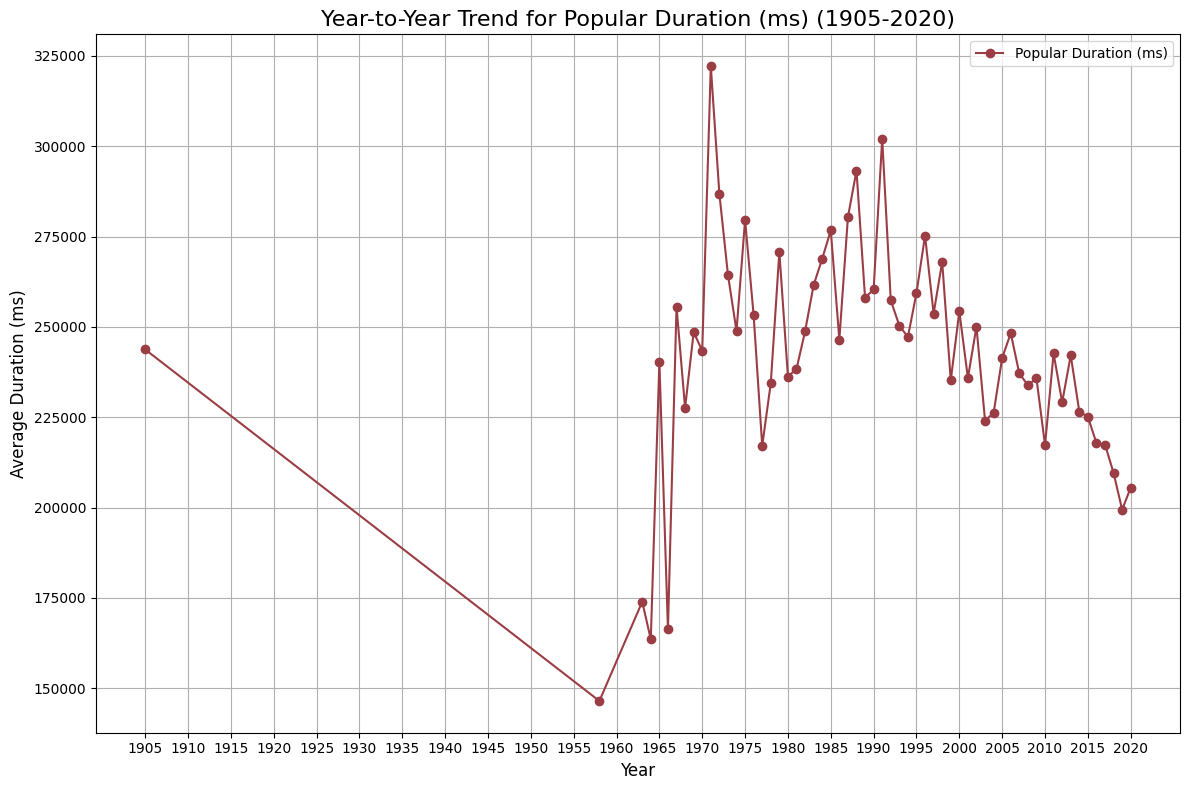

In [ ]:
# Popular duration time trend (1905-2020)

# Filter the dataset for popular songs (popular = 1)
popular_songs = df1[df1['popular'] == 1]

# Group data by 'release_year' and calculate the mean duration_ms for each year for popular songs
duration_trend_popular = popular_songs.groupby('release_year')['duration_ms'].mean()

# Plot the trend for popular songs' duration_ms over the years
plt.figure(figsize=(12, 8))
plt.plot(duration_trend_popular.index, duration_trend_popular.values, marker='o', color='#9b3d44', label='Popular Duration (ms)')

# Add title, labels, and legend
plt.title("Year-to-Year Trend for Popular Duration (ms) (1905-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Duration (ms)", fontsize=12)

# Adjust x-axis to show only integers with 5-year intervals
plt.xticks(ticks=range(int(duration_trend_popular.index.min()), int(duration_trend_popular.index.max()) + 1, 5), fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. What high-level insights should Universal Music consider when deciding the type of new music to contract and promote?

1) Genre Trends: Pop, Latin, and R&B are the leading genres driving popularity, with a noticeable shift in recent years toward Latin music, surpassing rap, R&B, and pop. This trend highlights the increasing global influence of Latin music and its diverse fanbase, which should be considered when scouting new artists and tracks.

2) Musical Features: Popular songs tend to be danceable and energetic, with a preference for tracks that are in major keys, particularly Db/C#, C, and G. These keys are often associated with positive, uplifting sounds that resonate with a broad audience.

3) Production Style: Most successful tracks are studio-produced, with a clear focus on prominent vocal content and neutral to positive valence (emotionally uplifting). Songs with upbeat tempos ranging from 95-130 BPM also dominate the charts, indicating a strong demand for rhythmic and energizing music suitable for dancing.

4) Song Duration: Tracks typically fall within the 3:20 minutes range, which aligns with the industry standard for mainstream radio and streaming consumption. Shorter song lengths are increasingly popular, capturing listeners' attention in a fast-paced digital environment.

# [4] Factors for Success

## 1. Are there identifiable factors that contribute to a song’s popularity?

1) Genre Trends: Genres like pop, Latin, and R&B are at the forefront of popularity, with Latin music seeing a notable rise in recent years, overtaking rap, R&B, and even pop in some instances. This shift reflects growing global interest in Latin music and artists.

2) Audio Features: Popular songs typically share certain musical characteristics, such as being danceable and energetic. They often feature major keys (particularly Db/C#, C, and G) that create uplifting and positive vibes. The majority of successful tracks are studio-produced, with prominent vocal content and a neutral to positive valence, meaning they generally evoke happy or upbeat emotions. Upbeat tempos ranging from 95-130 BPM align with the preferences for rhythmic and danceable music. Additionally, the typical track length for popular songs is around 3:20 minutes, which suits modern consumption habits.

3) Release Timing: Certain months, such as January, June, and November, are key for popular releases. January benefits from the beginning of the year’s promotional cycles, June coincides with the summer peak of music activity, and November ties into holiday music consumption and gift-giving seasons.

4) External Factors: Beyond the music itself, factors like artist fame, viral social media trends, and collaborations with influential artists play a crucial role in boosting a song’s popularity. Social media platforms like TikTok and Instagram, as well as collaborations with established stars, have become essential tools for gaining widespread attention and virality.

## 2. How do popular songs differ based on Spotify’s measurable variables or the KPIs you’ve identified?

For numerical variables, these boxplot comparisons show that while there are some general trends, there are also a lot of overlapping features. The key takeaway is that popular songs tend to have higher energy, danceability, and a focus on vocals, while non-popular songs are more likely to be instrumental or acoustic, with a greater diversity in terms of tempo and loudness.

Regarding categorical variables, the release month shows that both popular and non-popular songs share similar release trends, particularly in January, June, and November, which aligns with the overall distribution. This suggests that release month may not be a critical factor in determining whether a song will become popular.

The playlist genre, however, shows a clear distinction between popular and non-popular songs. Non-popular songs are predominantly from genres like EDM, Rap, and R&B, whereas popular songs are more likely to be from genres such as Pop, Latin, and R&B. This indicates that playlist genre may be a more relevant factor in distinguishing songs with the potential for higher popularity.

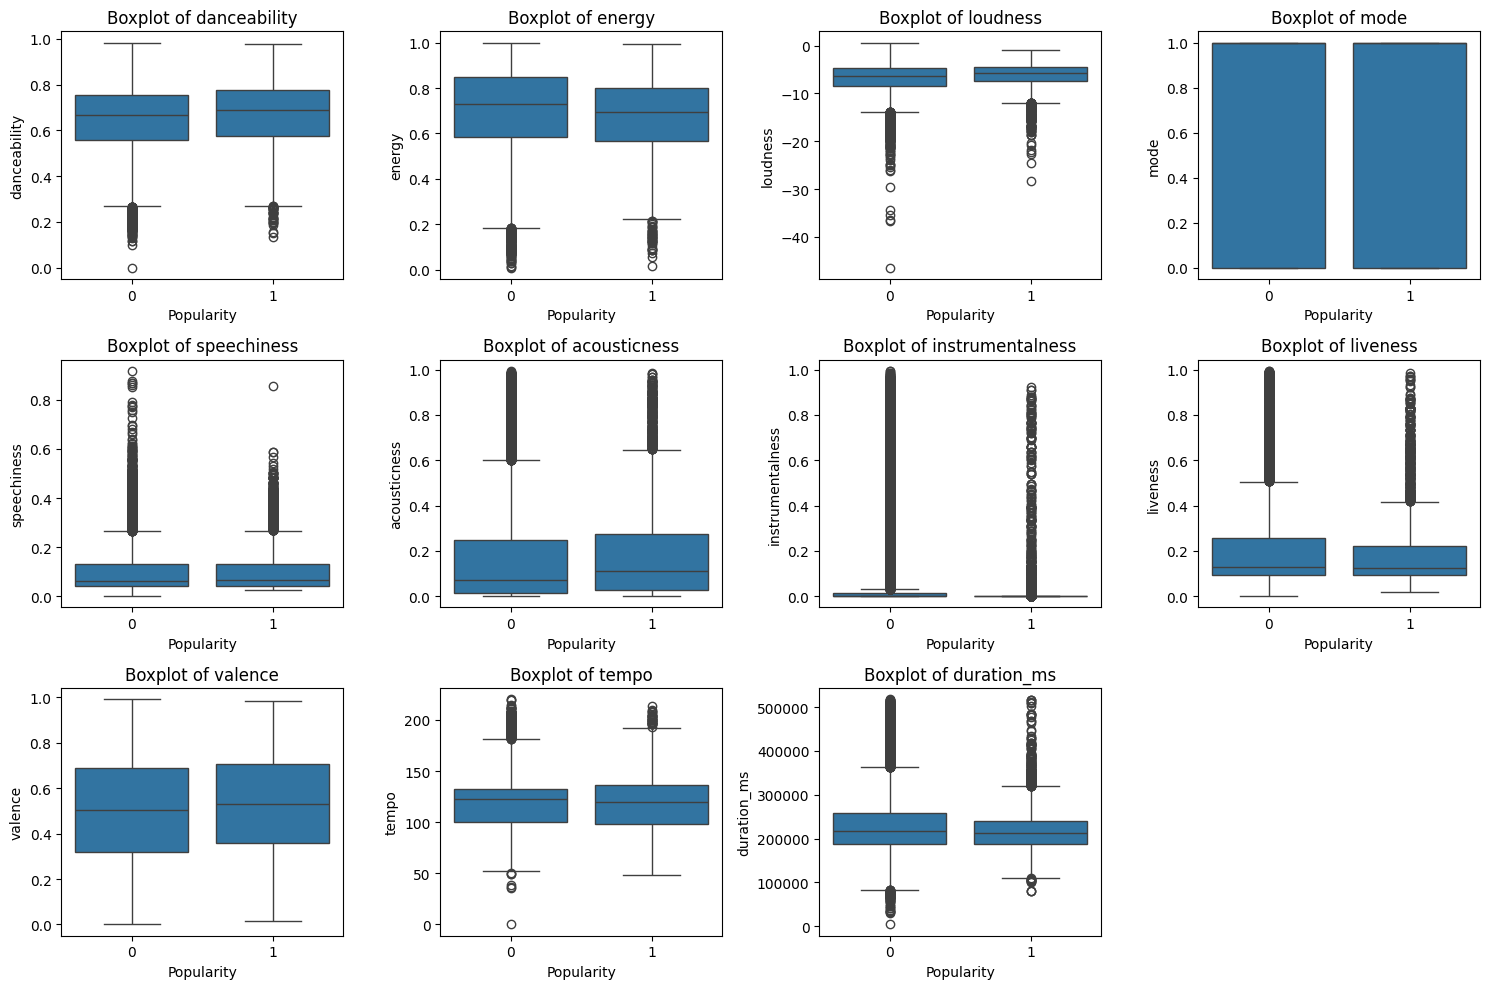

In [ ]:
# Plot boxplots for each numerical variable comparing popular (1) vs non-popular (0)

numerical_variables_comparison_df1 = [
    'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_variables_comparison_df1, 1):
    plt.subplot(3, 4, i)  # Adjust the number of rows/columns if necessary
    sns.boxplot(x='popular', y=col, data=df1)
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Popularity')
    plt.ylabel(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

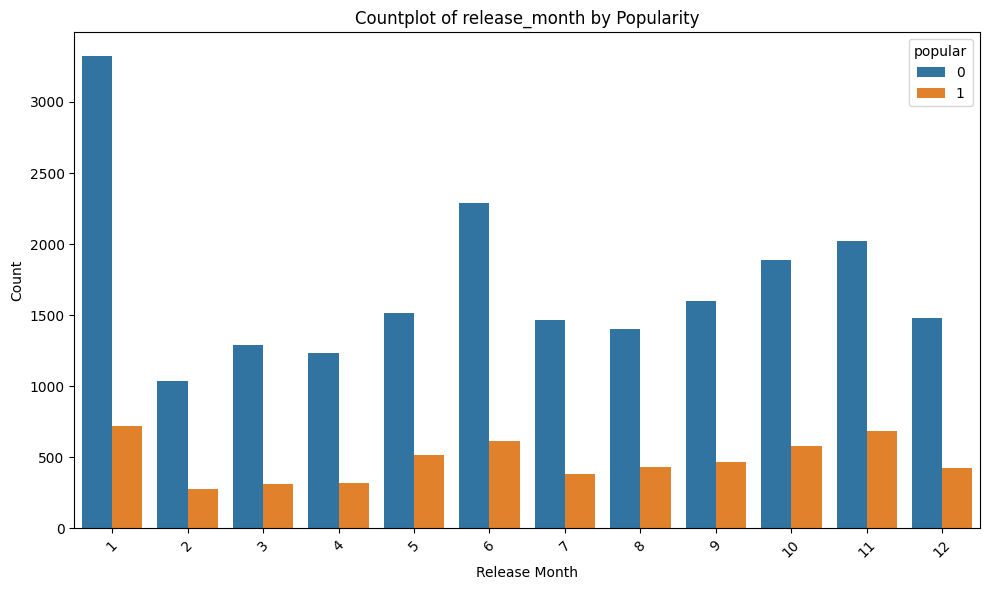

In [ ]:
# Plot boxplots for some categorical variables, 'release month', comparing popular (1) vs non-popular (0)

# Plot the comparison for release_month
plt.figure(figsize=(10, 6))
sns.countplot(x='release_month', hue='popular', data=df1, order=[str(i) for i in range(1, 13)])  # Order months from 1 to 12
plt.title('Countplot of release_month by Popularity')
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

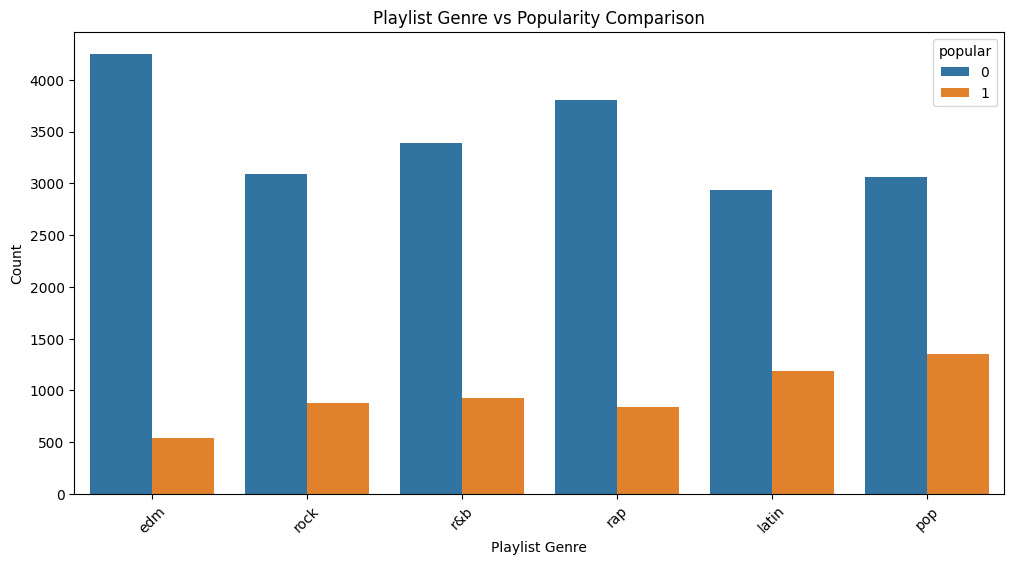

In [ ]:
# Plot boxplots for some categorical variables, 'playlist genre', comparing popular (1) vs non-popular (0)

# Create a figure large enough for the plot
plt.figure(figsize=(12, 6))

# Plotting the boxplot for 'playlist_genre' with 'popularity' as hue
sns.countplot(data=df1, x='playlist_genre', hue='popular')

plt.title('Playlist Genre vs Popularity Comparison')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.legend(title='popular', labels=['0', '1'])
plt.xticks(rotation=45)
plt.show()

## 3. Can statistical models or data analyses help explain the key factors driving a song’s success?

### 1) Exclude non-correlating variables

- Track ID, track name, track artist, and release year should be excluded from the analysis as they do not provide meaningful predictive value for the target variable (popularity). Track ID is a unique identifier with no relationship to a song's characteristics or success. While artist fame may correlate with popularity, track name and artist are too numerous and lack a clear trend or pattern; encoding them would unnecessarily increase dimensionality. Release year, although useful in time-based analyses, does not directly influence popularity and could introduce bias into the model.

### 2) Check missing values (Null and #VALUE! entries)

Before proceeding to the next stage, it is essential to check whether the columns of interest contain any missing values. Based on the output, no missing values were found. Therefore, the relevant columns should be saved into a new DataFrame (df3) for further analysis.

In [ ]:
# Checking for null and '#VALUE!' entries in the specified columns of df1
columns_to_check = [
    "release_month", "playlist_genre", "danceability", "energy", "key", "loudness",
    "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence",
    "tempo", "duration_ms", "popular"
]

# Assuming df1 is a DataFrame
null_and_value_check = df1[columns_to_check].applymap(lambda x: x in [None, "#VALUE!"]).sum()

null_and_value_check

<ipython-input-25-961499a204fb>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  null_and_value_check = df1[columns_to_check].applymap(lambda x: x in [None, "#VALUE!"]).sum()


release_month       0
playlist_genre      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
popular             0
dtype: int64

### 3) Feature Scaling: Handling Categorical Variables

- Playlist genre: This is a categorical variable with string values (e.g., edm, latin, pop, etc.). The best approach here would be one-hot encodin by creating a new binary column for each category. For example, columns like playlist_genre_edm, playlist_genre_latin, and so on.

- Release month: The variable is inherently numerical, with values ranging from 1 to 12. Therefore, one-hot encoding or label encoding is not necessary. However, the variable is currently stored as an object datatype, which prevents it from being used directly in mathematical operations so it needs to be coerced into numeric values.



In [ ]:
# Create a dictionary for mapping playlist genres to numbers (1 to 6)
genre_mapping = {
    'edm': 1,
    'latin': 2,
    'pop': 3,
    'r&b': 4,
    'rock': 5,
    'rap': 6
}

# Replace the genre names with their corresponding integers
df1['playlist_genre'] = df1['playlist_genre'].map(genre_mapping)

# Verify the changes
df1.head()

track_id    track_name    track_artist  popular release_year  \
0  697MjF1454XKvZmTuqkWmD    I Miss You          Jeriqo        0         2019   
1  3x2bXiU0o4WbsPkawXlfDA   Who Are You         The Who        0         1978   
2  0jEaPBjFAWjQTMVouRwaHi         Happy  The Beef Seeds        0         2015   
3  5EKUb1FKsyYVaSXb41YBIj           ONE      Rev Theory        0         2020   
4  300DUx4tdtCdGEUXR032jA  Palace/Curse    The Internet        0         2015   

  release_month  playlist_genre  danceability  energy  key  loudness  mode  \
0             2               1         0.520   0.789    0    -7.717     1   
1             8               5         0.651   0.661    9   -11.405     1   
2             1               4         0.640   0.758   10    -5.204     1   
3             1               5         0.398   0.966    4    -2.352     0   
4             6               4         0.447   0.625   10    -8.212     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0432      0.004910          0.000013    0.0816    0.415  174.026   
1       0.0511      0.265000          0.003130    0.1060    0.489  156.371   
2       0.1600      0.665000          0.000000    0.1270    0.932   86.529   
3       0.0453      0.000006          0.000000    0.3030    0.520   90.016   
4       0.3230      0.035100          0.000727    0.2430    0.261   67.104   

   duration_ms  
0       216347  
1       378707  
2       218044  
3       208196  
4       440013

### 4) Random Forest Approach

- The goal here is to identify the key drivers for the target variable, Popular. Through experimentation with simpler approahces, it became evident that the most variables have low correlation values from 0 to 0.15. This suggests that individual features have a weak relevance to popularity. Consequently, a more advanced model is necessary to capture complex patterns and interactions between features.

- From the Random Forest feature importance analysis:

  - **The most important features contributing to the prediction of song popularity are Instrumentalness (30.1%), Loudness (13.9%), Playlist Genre (12.9%), and Energy (9.8%)** which aligns with the idea that musical intensity, genre, and energy levels play a crucial role in whether a song becomes popular.

  - **Acousticness (5.9%), Danceability (6.5%), and Duration (5.4%) also have moderate importance, reflecting musical characteristics that appeal to different types of listeners.**

  - **Release Month (1.97%), Key (0.5%), and Mode (0.13%) have lower impact, suggesting that other factors like musical elements, genre, and energy are much stronger predictors.**

  - This analysis shows that **the musical characteristics (energy, danceability, loudness, etc.) and genre are the key drivers of popularity, while more technical features like key and mode have less influence.**

- Reference (Correlation analysis):
  - -Instrumentalness (0.15)
  - +Loudness (0.09)
  - +Danceability, -energy, -duration ms (0.06)
  - +Valence (0.05)
  - -Liveness, +release month (0.04)
  - +Acoustiness (0.03)
  - +Mode, +genre latin, +genre pop (0.02)
  - -Genre r&b, -genre rap (0.01)
  - +Speechiness, -tempo, +genre rock (0.00)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
# Specify the columns to keep
columns_to_include = ["release_month", "playlist_genre", "danceability", "energy", "key", "loudness",
                      "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence",
                      "tempo", "duration_ms"]

# Select only the relevant columns
X = df1[columns_to_include]  # features
y = df1['popular']  # Target variable

# Split data into training and testing sets with 30% for testing, seed=528
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=528)

# Train Random Forest model
# Random Forest model with tuned parameters
rf_model = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=5,             # Depth of trees
    random_state=528
)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Feature Importance
feature_importances = pd.DataFrame({
    'columns_to_include': columns_to_include,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importances)

Accuracy: 0.7807106598984772

Feature Importance:
   columns_to_include  Importance
9    instrumentalness    0.301001
5            loudness    0.139467
1      playlist_genre    0.129933
3              energy    0.098396
2        danceability    0.065320
8        acousticness    0.059825
13        duration_ms    0.054055
12              tempo    0.038570
11            valence    0.035699
7         speechiness    0.027741
10           liveness    0.023532
0       release_month    0.019671
4                 key    0.005495
6                mode    0.001294


# [5] Predictive Modeling

## 1. Feature Evaluation

Based on the feature importance derived from the Random Forest model, the least important 3 variables have been excluded from the modeling process. These variables are Release Month (1.97%), Key (0.5%), and Mode (0.13%).

As for the release month, while the timing of a song's release might influence initial success or seasonal trends, it is not as crucial as intrinsic musical characteristics.

Also, popular songs can span different musical keys, making Key less directly related to the predictability of a song’s success.

For mode, while it can influence the emotional tone of a song, its direct impact on popularity is minimal. Songs in either major or minor keys can achieve high popularity depending on other factors like genre, energy, and loudness.

## 2. Modeling

### 2a. Given this information above, what model would you recommend and how would you apply the model to help select music? Please include quantitative outcome such as annual expected payoff on testing data.

RF is a tree-based ensemble method that can model complex, **non-linear relationships between the features.** Songs' popularity can **depend on a combination of factors (e.g., energy and loudness interacting with danceability)**, which Random Forest handles well through its decision tree-based approach.

The model also excels in **handling mixed data types** without needing extensive preprocessing for categorical variables like one-hot encoding. This is particularly important for this dataset, which includes both numerical features (e.g., loudness, energy, danceability) and categorical variables (e.g., playlist genre).

Furthermore, Random Forest works by aggregating predictions from multiple decision trees, which helps **mitigate overfitting.** This characteristic ensures that the model generalizes better to unseen data.

To maximize the model's performance, three main considerations were prioritized:

- **Simple Parameter Adjustments:** After experimenting with various parameters, it was evident that simpler settings resulted in higher metrics and expected payoff. In this model, the number of estimators was set to 200 and max depth to 15, with default values used for the minimum samples split and minimum samples leaf.

- **Class Weighting:** Class weighting addressed the class imbalance by assigning a higher weight of 15 to popular songs (class 1). This adjustment penalized the model more for misclassifying popular songs, making it more sensitive to detecting them and improving recall.

- **Adjusted Decision Threshold:** The decision threshold was lowered from the default of 0.5 to 0.2 after training the model. This adjustment prioritized recall, increasing the likelihood of classifying more songs as popular and thereby capturing more true positives. While this improvement in recall was achieved, it also resulted in a higher false positive rate (FPR), as more non-popular songs were incorrectly predicted as popular. The focus on recall aimed to maximize the identification of popular songs, even at the cost of higher false positives.

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define the feature columns (X) and the target variable (y)
columns_to_include = ["playlist_genre", "danceability", "energy", "loudness",
                      "speechiness", "acousticness", "instrumentalness", "liveness", "valence",
                      "tempo", "duration_ms"]

# Select the relevant columns for the features (X)
X = df1[columns_to_include]  # Features (independent variables)

# Select the target variable (y)
y = df1['popular']  # Target (dependent variable)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=528)

# Apply higher class weights to increase sensitivity to the minority class (popular songs)
class_weights = {0: 1, 1: 15}  # Increase the weight of class 1 (popular songs)

# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=15,             # Depth of trees
    random_state=528,         # Reproducibility
    class_weight=class_weights  # Pass the class weights to the model
)

# Train the model
rf_model.fit(X_train, y_train)

# Get predicted probabilities on the test set
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Get probability for the positive class (popular)

# Lower the decision threshold further (e.g., use 0.2 instead of 0.3 to increase FPR)
threshold = 0.2
y_pred_rf = (y_pred_prob_rf > threshold)  # Apply the threshold to get the predicted labels

# Calculate AUC
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Calculate Recall
recall_rf = recall_score(y_test, y_pred_rf)

# Calculate Precision
precision_rf = precision_score(y_test, y_pred_rf)

# Calculate False Positive Rate (FPR)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
TN, FP, FN, TP = conf_matrix.ravel()
fpr_rf = FP / (FP + TN)

# Print the evaluation results
print(f"Random Forest AUC: {auc_rf}")
print(f"Random Forest Recall (with Class Weighting and Adjusted Threshold): {recall_rf}")
print(f"Random Forest Precision (with Class Weighting and Adjusted Threshold): {precision_rf}")
print(f"Random Forest False Positive Rate (FPR) (with Class Weighting and Adjusted Threshold): {fpr_rf}")

# Print the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame with the original test data, true labels, and predicted probabilities
test_data_with_predictions_rf = X_test.copy()
test_data_with_predictions_rf['popular'] = y_test.values  # Adding true labels
test_data_with_predictions_rf['predicted_probability'] = y_pred_prob_rf  # Adding predicted probabilities

# Save the DataFrame to a CSV file
output_file_path_rf = '/content/drive/MyDrive/DSO 528_Blended Data Business Analytics for Efficient Decisions/DSO 528_Final Project/3. EDA & Modeling/YB EDA & Modeling/output.csv'
test_data_with_predictions_rf.to_csv(output_file_path_rf, index=False)

Random Forest AUC: 0.7772117731963107
Random Forest Recall (with Class Weighting and Adjusted Threshold): 0.9785879629629629
Random Forest Precision (with Class Weighting and Adjusted Threshold): 0.2595548733691481
Random Forest False Positive Rate (FPR) (with Class Weighting and Adjusted Threshold): 0.7841352405721717

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.22      0.35      6152
           1       0.26      0.98      0.41      1728

    accuracy                           0.38      7880
   macro avg       0.62      0.60      0.38      7880
weighted avg       0.82      0.38      0.37      7880


Confusion Matrix:
[[1328 4824]
 [  37 1691]]


**Model Performance:**
Based on the classification report and confusion matrix, here are the key metrics for the Random Forest model:

- **AUC (Area Under the Curve): 0.78**
This means that the model does a decent job of distinguishing between popular and non-popular songs. A value of 0.78 suggests that the model is better than random guessing but could still be improved.

- **Recall: 0.98**
The model has an exceptionally high recall of 98% for class 1 (popular songs). This means that 98% of all actual popular songs were correctly identified. This is very important because it shows that the model is excellent at detecting popular songs, which is crucial for selecting tracks for promotion.

- **Precision: 0.26**
While recall is high, precision is relatively low at 26%. This means that when the model predicts a song as popular, there's only a 26% chance that it is actually popular. This trade-off occurs because the model is highly focused on identifying all possible popular songs (high recall), at the cost of misclassifying many non-popular songs as popular (leading to low precision).

- **False Positive Rate (FPR): 0.78**
The FPR is 78%, meaning that 78% of the non-popular songs (class 0) were incorrectly predicted as popular. This is expected because we have prioritized recall, leading to more false positives. This aligns with the model’s focus on ensuring that no popular song is missed, even if it means mistakenly classifying many non-popular songs as popular.

**Key takeaways:** The model utilized class weighting to address the class imbalance between popular (class 1) and non-popular (class 0) songs by assigning a higher weight of 15 to popular songs. This approach penalized the model more for misclassifying popular songs, making it more sensitive to detecting them and improving recall. Additionally, the decision threshold was lowered from the default of 0.5 to 0.2 after training the model to further prioritize recall. This adjustment made the model more inclined to classify songs as popular, increasing the number of true positives (popular songs identified). While this improved recall, it also led to a higher false positive rate (FPR) because more non-popular songs were incorrectly predicted as popular. The focus on recall was driven by the goal of maximizing the identification of popular songs, even if it resulted in an increase in false positives.

After model's best predicted probability, using **a cutoff of 0.22, the annual expected payoff on testing data is $155,480,000.**


### 2b. With further consideration and experience, the company would like to add an adjustment to the model proposed in part 2a. Specifically, even if newly promoted music does not become popular immediately, there is a 20% chance that, due to promotion, the song will gain popularity a few months later. Please suggest how to revise the model to incorporate this condition and calculate the expected payoff.

By incorporating this adjustment, the total expected payoff increases, as it now reflects the possibility of future popularity for some songs initially predicted as unpopular.

The adjustment implies that out of the songs predicted to be popular, 20% of them will eventually become popular later, while 80% will remain unpopular. This is a significant improvement over the model in part 2a, where 100% of those songs were labeled as unpopular, leading to a less optimistic forecast.

The payoff per unit for this False Negatives (FN) is adjusted to 16,000 which is derived from (150K-30K)x 0.2 + (20K-30K) x 0.8. This is an improvement from the earlier calculation in 2a., where it was -10,000 (20K-30K).

**Given the new cutoff at 0.1, the total expected payoff for the company is now $290,304,000.** This adjustment helps alleviate some of the pressure from mispredicting songs as unpopular, as it provides a chance that some of these songs will gain popularity later. As a result, this adjustment contributes positively to the overall expected revenue, increasing it by $$134,824,000 compared to the previous 2a expected payoff.